In [1]:
#select geno

import h5py
from Bio import AlignIO
import pickle
from matplotlib import pyplot as plt
import numpy as np
#run annot
from scipy.sparse import lil_matrix
import random


In [2]:
#save each cl
import colour
import numpy as np

red = colour.Color('red')
blue = colour.Color('blue')
crange = [ c.get_hex_l() for c in red.range_to(blue, 100) ]
print(crange)

with open( 'crange.pkl' , 'wb') as crangeout:
    crangeout.write(pickle.dumps(crange))

['#ff0000', '#ff0a00', '#ff1500', '#ff1f00', '#ff2900', '#ff3400', '#ff3e00', '#ff4800', '#ff5200', '#ff5d00', '#ff6700', '#ff7100', '#ff7c00', '#ff8600', '#ff9000', '#ff9b00', '#ffa500', '#ffaf00', '#ffb900', '#ffc400', '#ffce00', '#ffd800', '#ffe300', '#ffed00', '#fff700', '#fcff00', '#f2ff00', '#e8ff00', '#deff00', '#d3ff00', '#c9ff00', '#bfff00', '#b4ff00', '#aaff00', '#a0ff00', '#95ff00', '#8bff00', '#81ff00', '#76ff00', '#6cff00', '#62ff00', '#58ff00', '#4dff00', '#43ff00', '#39ff00', '#2eff00', '#24ff00', '#1aff00', '#0fff00', '#05ff00', '#00ff05', '#00ff0f', '#00ff1a', '#00ff24', '#00ff2e', '#00ff39', '#00ff43', '#00ff4d', '#00ff58', '#00ff62', '#00ff6c', '#00ff76', '#00ff81', '#00ff8b', '#00ff95', '#00ffa0', '#00ffaa', '#00ffb4', '#00ffbf', '#00ffc9', '#00ffd3', '#00ffde', '#00ffe8', '#00fff2', '#00fffc', '#00f7ff', '#00edff', '#00e3ff', '#00d8ff', '#00ceff', '#00c4ff', '#00b9ff', '#00afff', '#00a5ff', '#009bff', '#0090ff', '#0086ff', '#007cff', '#0071ff', '#0067ff', '#005dff'

In [3]:
treefile = '/home/cactuskid13/covid/coevDataCOVID/02_07_2020_GISAID_IQTree_NS_mask/gisaid_hcov-2020_07_02.QC.NSoutlier.filter.NSmask.aln.treefile'
alnfile = '/home/cactuskid13/covid/coevDataCOVID/02_07_2020_GISAID_IQTree_NS_mask/gisaid_hcov-2020_07_02.QC.NSoutlier.filter.NSmask.aln'
alnh5 = alnfile+'.h5'

In [53]:
treefile = '/home/cactuskid13/covid/lucy_mk2/30_07_2020/gisaid_hcov-2020_07_30.QC.NSoutlier.filter.deMaiomask.aln.EPIID.HF.treefile'
alnfile = '/home/cactuskid13/covid/lucy_mk2/30_07_2020/gisaid_hcov-2020_07_30.QC.NSoutlier.filter.deMaiomask.EPIID.HF.noambig.aln'
outsankof = './lucy_mk2/30_07_2020/gisaid_hcov-2020_07_30.QC.NSoutlier.filter.deMaiomask.EPIID.HF.noambig.HomoplasyFinder_input.alnCOEV_cleantree_mk4coevmatrev3.pkl'
alnh5 = './lucy_mk2/30_07_2020/gisaid_hcov-2020_07_30.QC.NSoutlier.filter.deMaiomask.EPIID.HF.noambig.HomoplasyFinder_input.aln.h5'

In [54]:
#load sankoff coev mat
with open( outsankof , 'rb') as matin:
    coevmat = pickle.loads(matin.read())
coevmat = coevmat.todense()
print(coevmat)
print(coevmat.shape)
print(np.amax(coevmat))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(93445, 29903)
1.0


In [55]:
#choose sequence
with h5py.File(alnh5, 'r') as hf:
    align_array = hf['MSA2array'][:]
print(align_array.shape)
msa = AlignIO.read(alnfile , format = 'fasta')

def clipID(ID):
    return ''.join( [ s +'|' for s in str(ID).split('|')[:-1] ])[:-1].replace('_',' ') 
IDs = {i:rec.id for i,rec in enumerate(msa)}
IDindex = dict(zip( IDs.values() , IDs.keys() ) )
print( [(t,IDindex[t]) for t in list(IDindex.keys())[0:10]] )

(46723, 29903)
[('EPI_ISL_475681', 0), ('EPI_ISL_458210', 1), ('EPI_ISL_416583', 2), ('EPI_ISL_425849', 3), ('EPI_ISL_425869', 4), ('EPI_ISL_419227', 5), ('EPI_ISL_419242', 6), ('EPI_ISL_417432', 7), ('EPI_ISL_419228', 8), ('EPI_ISL_421230', 9)]


In [56]:
seq = 'EPI_ISL_424471'
print('seq chosen: ' , seq)
#index all non gap cols
aln_row = align_array[IDindex[seq],:]
nongap_cols = [ i for i,c in enumerate(list(aln_row)) if c != b'-' ]


seq chosen:  EPI_ISL_424471


In [57]:
with open( alnfile+ 'blurmatr3.pkl' , 'rb') as matin:
    coevmat = pickle.loads(matin.read())


In [58]:
submat_coev = coevmat[: , nongap_cols ]
submat_aln = align_array[:,nongap_cols ]

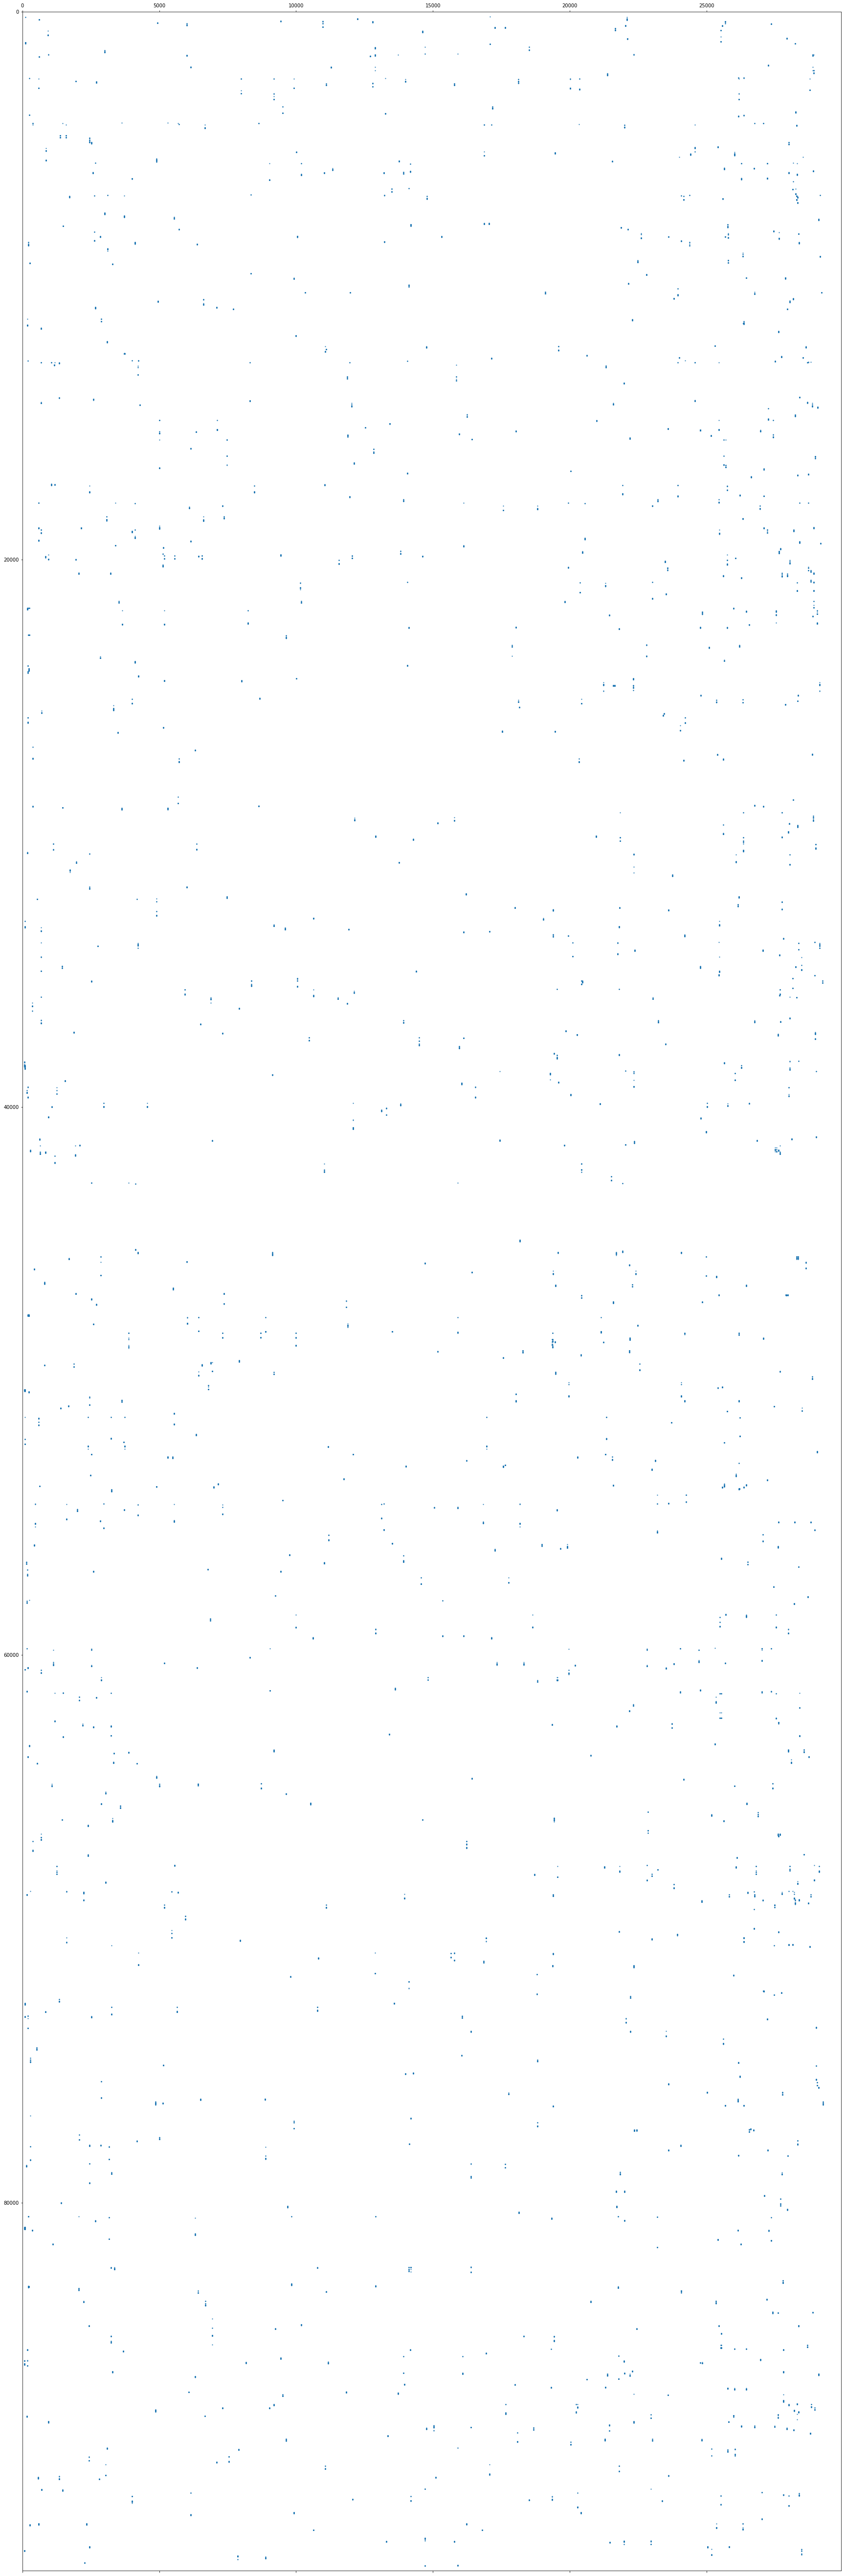

In [59]:
plt.figure( figsize=(30,100))
plt.spy(submat_coev ,  markersize = 1)

In [60]:
qseq = b''.join(aln_row[nongap_cols])
qfile = 'covid_geno.fasta'
with open(qfile , 'w') as geno_out:
    geno_out.write((b'>testgeno\n'+qseq).decode())
    #print( (b'>testgeno\n'+qseq).decode())


In [61]:
import subprocess
import shlex
import pandas as pd 
#collapse codons
#use tblastn to map to prot

def runblastx( qseq , outannot = 'outannot.txt' , outfmt = None ):
    if outfmt is None:
        outfmt = [ 'qseqid' , 'sseqid' , 'qlen' ,  'slen' , 'qstart' , 'qend' ,  'qframe' , 'evalue' ]
        outfmt =  ' "10 ' + ''.join([fmt+ ' ' for fmt in outfmt]) + ' " '
        print(outfmt)
    args = 'blastx -query '+ qfile + ' -db covid_prots -outfmt' + outfmt + ' -out ' + outannot  
    p = subprocess.run( shlex.split(args) )
    return p , outannot
out = 'outannot.txt'
p,annot = runblastx(qfile  )

annotation = pd.read_csv( out , header = None )
annotation.columns = [ 'qseqid' , 'sseqid' , 'qlen' ,  'slen' , 'qstart' , 'qend' ,  'qframe' , 'evalue' ] 
annotation = annotation[ annotation['evalue'] < 10**-3 ]
print(annotation)
print(len(annotation), ' orfs detected')

#recluster codons
#load blast results into df

 "10 qseqid sseqid qlen slen qstart qend qframe evalue  " 
      qseqid          sseqid   qlen  slen  qstart   qend  qframe  \
0   testgeno  YP_009724389.1  29903  7096     266  13468       2   
1   testgeno  YP_009724389.1  29903  7096   13462  19275       1   
2   testgeno  YP_009724389.1  29903  7096   19573  21549       1   
4   testgeno  YP_009725299.1  29903  1945    2720   8554       2   
8   testgeno  YP_009742610.1  29903  1945    2720   8554       2   
12  testgeno  YP_009724390.1  29903  1273   21563  25381       2   
13  testgeno  YP_009725307.1  29903   932   13462  16236       1   
14  testgeno  YP_009725298.1  29903   638     806   2719       2   
15  testgeno  YP_009742609.1  29903   638     806   2719       2   
16  testgeno  YP_009725308.1  29903   601   16237  18039       1   
17  testgeno  YP_009725300.1  29903   500    8555  10054       2   
18  testgeno  YP_009742611.1  29903   500    8555  10054       2   
19  testgeno  YP_009725309.1  29903   527   18040  19275 

In [26]:
#select longest nice hit
from Bio import Seq
rows = []
for ID in annotation.sseqid.unique():
    #print(annotation[annotation.sseqid == ID ].iloc[0])
    sub = annotation[annotation.sseqid == ID ]
    rows.append(sub.index[0] ) 
annotation = annotation.loc[rows]
print(len(annotation))
rows = []

for ID in annotation.qstart.unique():
    #print(annotation[annotation.sseqid == ID ].iloc[0])
    sub = annotation[annotation.qstart == ID ]
    rows.append(sub.index[0] )
annotation = annotation.loc[rows]
print(len(annotation))

genes =  {}
prots = {}

for i,r in annotation.iterrows():
    genes[i] = qseq[r.qstart-1:r.qend-1].decode()
    #print(genes[i])
    prots[i] = str(Seq.Seq( genes[i]).translate( ) )
annotation = annotation.sort_values( ['qstart'] )
annotation['prots'] = annotation.index.map(prots)
annotation['genes'] = annotation.index.map(genes)
annotation = annotation[annotation.slen < 2000]
aln_regions = np.array(list(zip(list(annotation.qstart),list(annotation.qend))))
aln_regions= aln_regions[1:,:]
aln_len = np.array(list( annotation.qend - annotation.qstart))

annotation = pd.DataFrame.sort_values(annotation, by='qstart')
print(annotation)

35
24


/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/Bio/Seq.py:2715: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning)


      qseqid          sseqid   qlen  slen  qstart   qend  qframe  \
14  testgeno  YP_009725298.1  29903   638     806   2719       2   
4   testgeno  YP_009725299.1  29903  1945    2720   8554       2   
17  testgeno  YP_009725300.1  29903   500    8555  10054       2   
23  testgeno  YP_009725301.1  29903   306   10055  10972       2   
27  testgeno  YP_009725302.1  29903   290   10973  11842       2   
43  testgeno  YP_009725303.1  29903    83   11843  12091       2   
34  testgeno  YP_009725304.1  29903   198   12092  12685       2   
39  testgeno  YP_009725305.1  29903   113   12686  13024       2   
36  testgeno  YP_009725306.1  29903   139   13025  13441       2   
13  testgeno  YP_009725307.1  29903   932   13462  16236       1   
16  testgeno  YP_009725308.1  29903   601   16237  18039       1   
19  testgeno  YP_009725309.1  29903   527   18040  19275       1   
21  testgeno  YP_009725310.1  29903   346   19621  20658       1   
25  testgeno  YP_009725311.1  29903   298   2065

In [27]:
annotation.to_csv('./gisaid/'+seq.replace('/', '_').replace('|','_')+'.csv')

In [28]:
print('summing up events on codons')
codonmat = np.zeros( (submat_coev.shape[0] , int(submat_coev.shape[1]/3) +1  ))
count = 0
print(codonmat.shape)
print(submat_coev.shape)
try:
    submat_coev = submat_coev.todense()
except AttributeError:
    print( 'already dense')
codon_dict = {}
for i,r in annotation.iterrows():
    for j,codon in enumerate(range(r.qstart-1, r.qend-1 , 3 )):
        
        
        codon_dict[codon] = count
        cols = np.sum( submat_coev[:, codon:codon+2] , axis = 1 )
        codonmat[:,count] = cols.ravel()
        count+=1
        if count%500 == 0:
            print(count/codonmat.shape[1])

codonthresh = codonmat[codonmat>0] = 1

summing up events on codons
(93445, 9968)
(93445, 29903)
0.05016051364365971
0.10032102728731943
0.15048154093097912
0.20064205457463885
0.25080256821829855
0.30096308186195825
0.351123595505618
0.4012841091492777
0.4514446227929374
0.5016051364365971
0.5517656500802568
0.6019261637239165
0.6520866773675762
0.702247191011236
0.7524077046548957
0.8025682182985554
0.8527287319422151
0.9028892455858748


In [29]:
codon_dict_rev = dict(zip ( codon_dict.values() , codon_dict.keys( ) ) )

(9968,)
88.0
0.0
0.9993980738362761
23.384976525821596
5.402573516461091


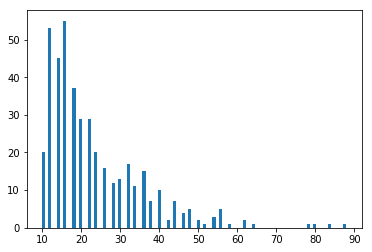

In [52]:
sumv = np.sum(codonmat , axis = 0)
print(sumv.ravel().shape)
print(np.amax(sumv))
print(np.amin(sumv))
print(np.mean(sumv))
print(np.mean(sumv[sumv>0]))
print(np.std(sumv))


counts,bins = np.histogram(sumv[sumv>0].ravel() , bins = 100)
centroids = (bins[1:] + bins[:-1]) / 2
counts_, bins_, _ = plt.hist(centroids, bins=len(counts),
                             weights=counts, range=(min(bins), max(bins)))

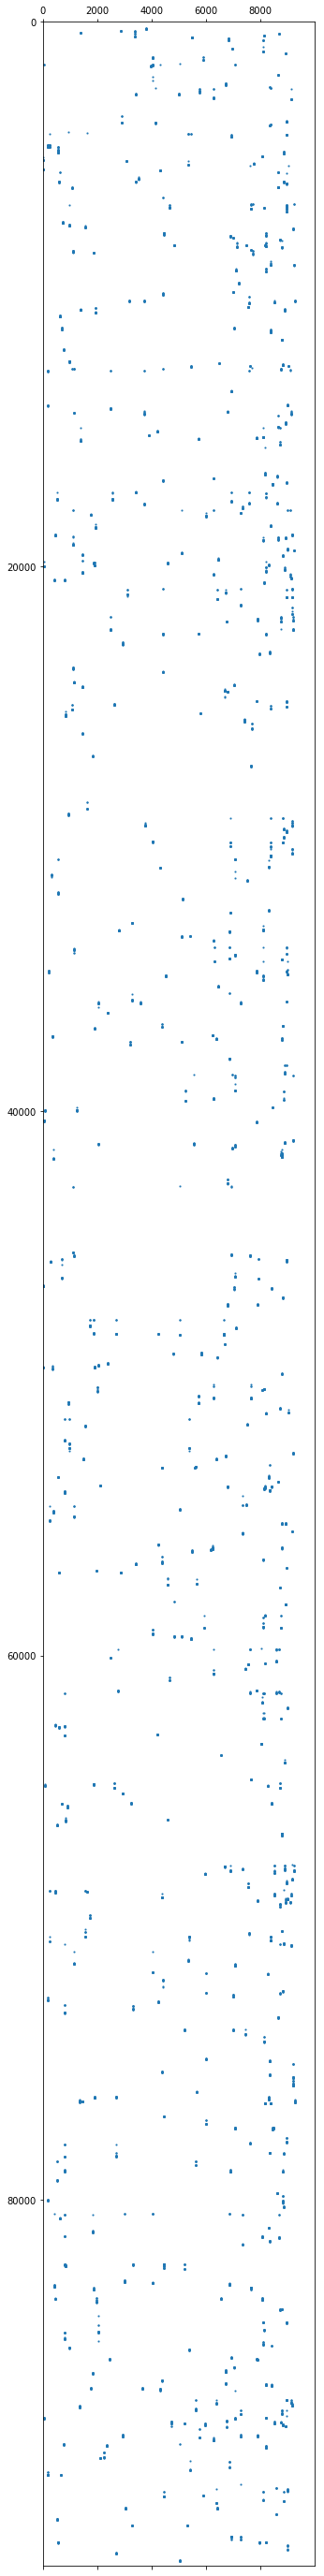

In [30]:
plt.figure( figsize=(30,50) )
plt.spy(codonmat , markersize = 1)

In [31]:
import pickle
with open( alnfile+'blurmat_codonsr3.pkl' , 'wb') as blurout:
    blurout.write(pickle.dumps(lil_matrix(codonmat) ))

In [32]:
import pickle
with open( alnfile+'blurmat_codons.pklr3' , 'rb') as blurout:
    codonmat = pickle.loads(blurout.read())
sparsedf = pd.DataFrame.sparse.from_spmatrix(codonmat)
nzx,nzy = codonmat.nonzero()
print(nzx.shape)
print(nzy.shape)



FileNotFoundError: [Errno 2] No such file or directory: '/home/cactuskid13/covid/lucy_mk2/30_07_2020/gisaid_hcov-2020_07_30.QC.NSoutlier.filter.deMaiomask.EPIID.HF.noambig.alnblurmat_codons.pklr3'

In [16]:
datablock = np.vstack([nzx,nzy]).T
print(datablock.shape)

NameError: name 'nzx' is not defined

In [17]:
#save each cl
import colour
import numpy as np

red = colour.Color('red')
blue = colour.Color('blue')
crange = [ c.get_hex_l() for c in red.range_to(blue, np.amax(cluster_labelsb)) ]
print(crange)

with open( 'crange.pkl' , 'wb') as crangeout:
    crangeout.write(pickle.dumps(crange))

NameError: name 'cluster_labelsb' is not defined

In [37]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=700 , algorithm='randomized', n_iter=20, random_state=0 , tol=0.0)
codon_reduce = svd.fit_transform( codonmat.T )

In [38]:
from sklearn.cluster import MiniBatchKMeans , DBSCAN

apb = MiniBatchKMeans(n_clusters=100, init='k-means++', max_iter=100, batch_size=200, verbose=1, compute_labels=True , random_state= 0   )
#apb = DBSCAN( eps = .2 , metric='jaccard', metric_params=None, algorithm='auto', leaf_size=25, p=None, n_jobs=-1)
cluster_labels_codon = apb.fit_predict(codonmat.T )
cluster_labels_raw = apb.fit_predict(submat_coev.T )
cluster_labels_reduced = apb.fit_predict(codon_reduce )


Init 1/3 with method: k-means++
Inertia for init 1/3: 627.796885
Init 2/3 with method: k-means++
Inertia for init 2/3: 663.690725
Init 3/3 with method: k-means++
Inertia for init 3/3: 665.678460
Minibatch iteration 1/5000: mean batch inertia: 1.419148, ewa inertia: 1.419148 
Minibatch iteration 2/5000: mean batch inertia: 0.948999, ewa inertia: 1.400283 
Minibatch iteration 3/5000: mean batch inertia: 0.838626, ewa inertia: 1.377747 
Minibatch iteration 4/5000: mean batch inertia: 0.750000, ewa inertia: 1.352559 
Minibatch iteration 5/5000: mean batch inertia: 1.406243, ewa inertia: 1.354713 
Minibatch iteration 6/5000: mean batch inertia: 1.035599, ewa inertia: 1.341909 
Minibatch iteration 7/5000: mean batch inertia: 0.769354, ewa inertia: 1.318936 
Minibatch iteration 8/5000: mean batch inertia: 1.108214, ewa inertia: 1.310481 
Minibatch iteration 9/5000: mean batch inertia: 1.126342, ewa inertia: 1.303092 
[MiniBatchKMeans] Reassigning 90 cluster centers.
Minibatch iteration 10/500

In [35]:
from sklearn.decomposition import TruncatedSVD , MiniBatchSparsePCA

svd = TruncatedSVD(n_components=3, algorithm='randomized', n_iter=100, random_state=0 , tol=0.10)
#svd = MiniBatchSparsePCA(n_components=None, alpha=1, ridge_alpha=0.01, n_iter=100, callback=None, batch_size=3, verbose=False, shuffle=True, n_jobs=-1)

codon_reduce2 = svd.fit_transform( codonmat.T )

cluster_labels = apb.fit_predict( codon_reduce2 )

KeyboardInterrupt: 

NameError: name 'cluster_labels' is not defined

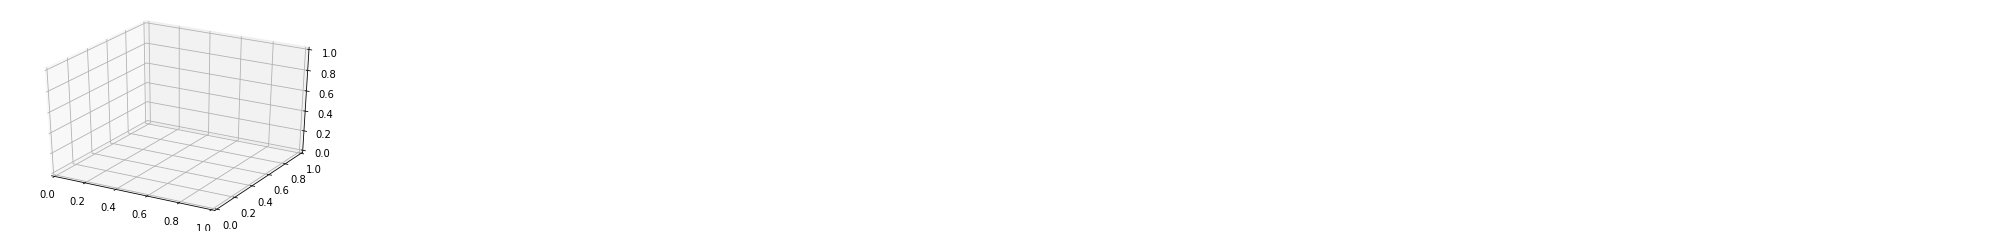

In [39]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


l,c = np.unique(cluster_labels, return_counts= True)
for i,label in enumerate(l):
    if c[i]>1 and c[i]< 1000:
        select = np.where(cluster_labels == label)
        #clusteravg = np.sum( codonmat[:,select] ) / len(select)
        ax.scatter( codon_reduce2[select,0] , codon_reduce2[select,1] , codon_reduce2[select,2] , label = label )
#plt.legend()
plt.show()

In [50]:
#blurmat = blurmat.todense()
import copy
for cluster_labels in [ cluster_labels_codon , cluster_labels_reduced ]:
    l,c = np.unique(cluster_labels, return_counts= True)
    
    print(len(l))
    print(c)
    print(np.sum(c))
    plt.figure( figsize=(30,100))

    for i,label in enumerate(np.unique(cluster_labels)):
        if len(cluster_labels[ cluster_labels==label ] ) < 200 and len(cluster_labels[ cluster_labels==label ] ) > 6:
            print('cluster:',label)
            print( 'cluster size:' ,len(cluster_labels[ cluster_labels==label ] ) )
            mask =  copy.deepcopy(codonmat)
            mask[:,  cluster_labels!=label ] = 0
            plt.spy( mask, markersize = 1 , mfc = crange[i]  , mec = crange[i] )
    plt.show()
    
    

####################################
0
(40,)
62.0
10.0
25.25
12.503499510137152


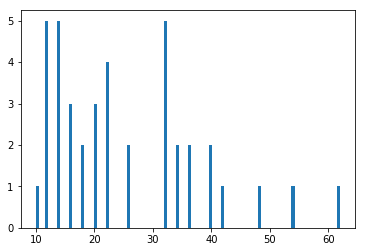

1
(13,)
44.0
12.0
24.615384615384617
8.748964435761803


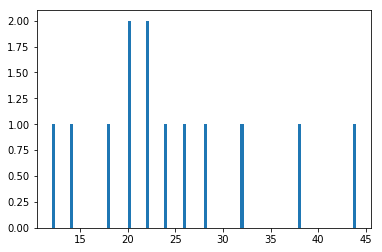

2
(3,)
38.0
14.0
29.333333333333332
10.873004286866728


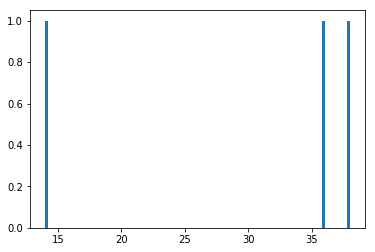

3
(8,)
44.0
14.0
24.5
10.665364503850771


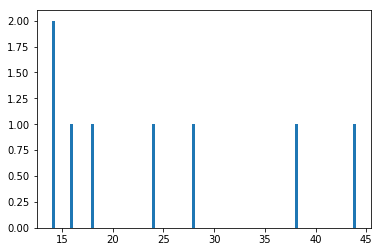

4
(11,)
88.0
10.0
24.181818181818183
22.489667048823602


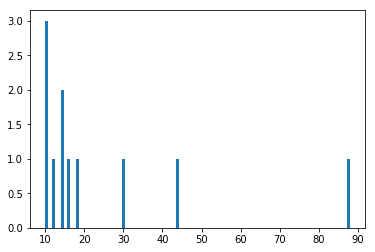

5
(16,)
56.0
12.0
22.625
10.902264672993406


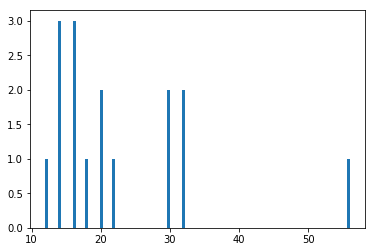

6
(6,)
50.0
18.0
28.666666666666668
13.743685418725535


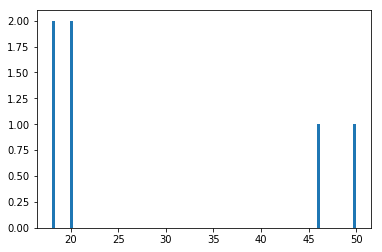

7
(6,)
46.0
12.0
24.666666666666668
12.840906856172149


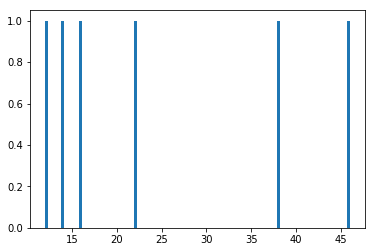

8
(1,)
32.0
32.0
32.0
0.0


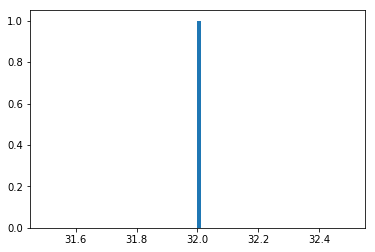

9
(8,)
34.0
10.0
19.75
9.56229574945264


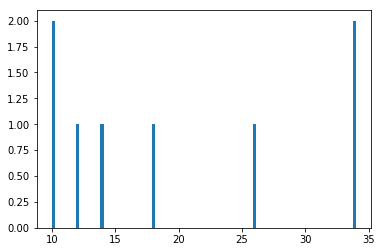

10
(4,)
20.0
12.0
15.5
2.958039891549808


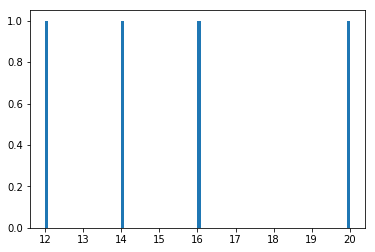

11
(8,)
54.0
10.0
23.0
14.177446878757825


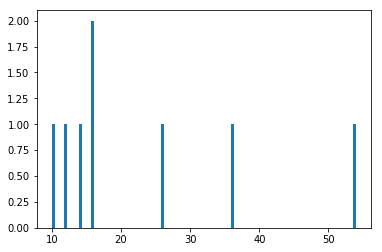

12
(2,)
16.0
12.0
14.0
2.0


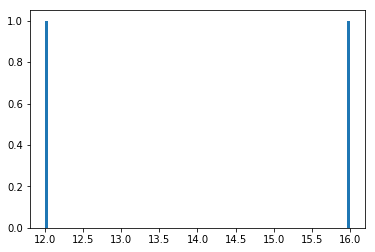

13
(1,)
28.0
28.0
28.0
0.0


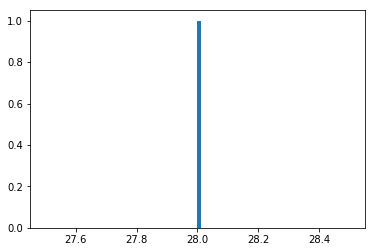

14
(2,)
16.0
16.0
16.0
0.0


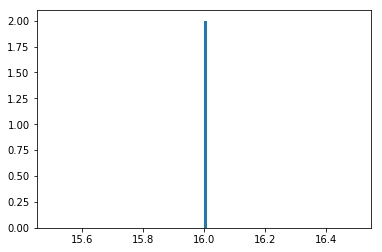

15
(11,)
46.0
12.0
26.0
10.126472956832233


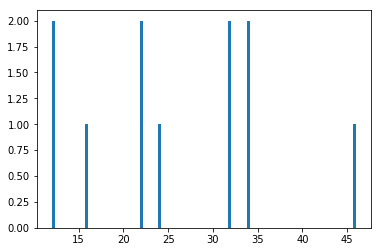

16
(4,)
44.0
16.0
28.0
10.198039027185569


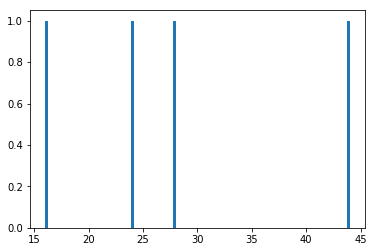

17
(5,)
54.0
12.0
24.0
15.543487382180357


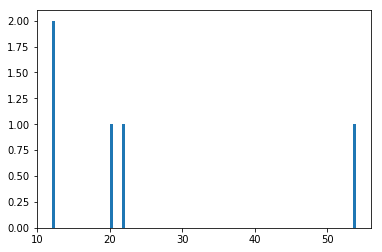

18
(1,)
26.0
26.0
26.0
0.0


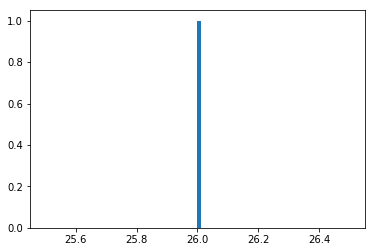

19
(4,)
24.0
16.0
20.5
2.958039891549808


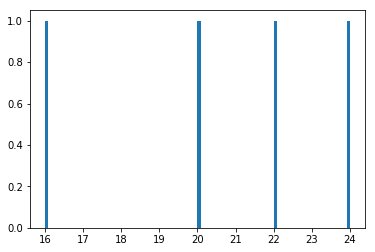

20
(5,)
26.0
12.0
19.2
5.455272678794342


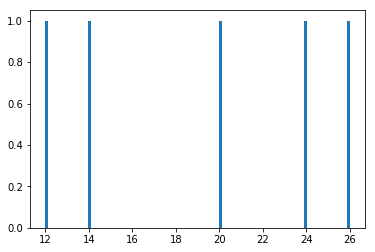

21
(10,)
80.0
10.0
24.8
19.661129163911212


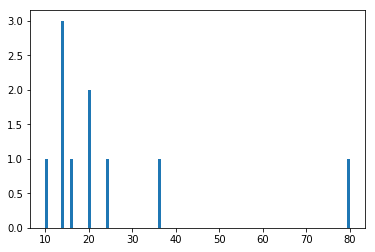

22
(6,)
40.0
12.0
26.333333333333332
9.89388138643722


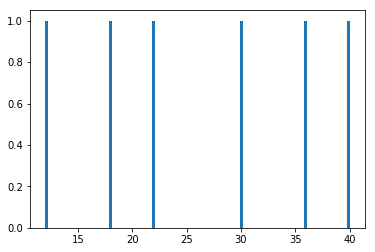

23
(9,)
36.0
12.0
22.22222222222222
8.243216440440627


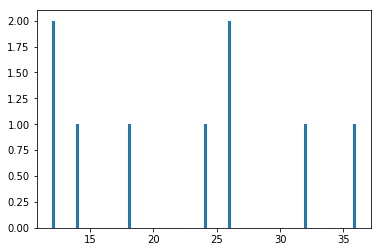

24
(1,)
16.0
16.0
16.0
0.0


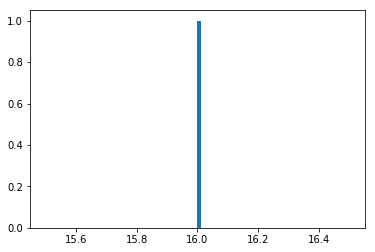

25
(9,)
50.0
12.0
26.22222222222222
13.214283330949783


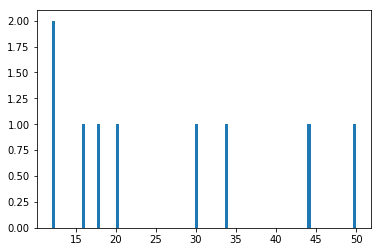

26
(2,)
14.0
12.0
13.0
1.0


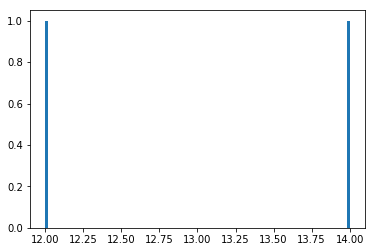

27
(14,)
64.0
10.0
23.285714285714285
15.280372898537761


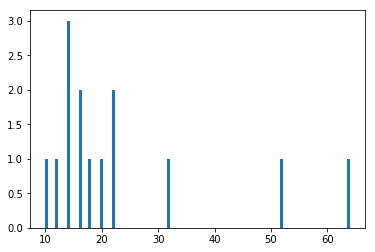

28
(11,)
62.0
12.0
23.818181818181817
16.100921384240333


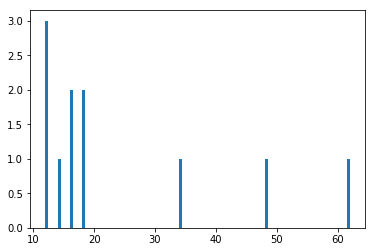

29
(7,)
36.0
12.0
22.571428571428573
7.835033829029765


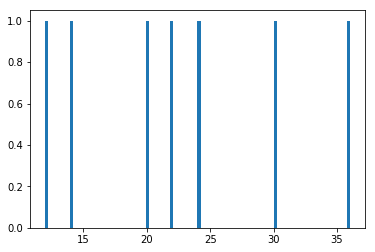

30
(8,)
58.0
16.0
26.25
12.587195875174105


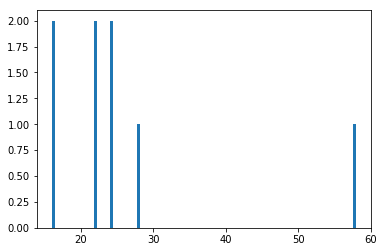

31
(11,)
36.0
12.0
21.09090909090909
8.543520090524167


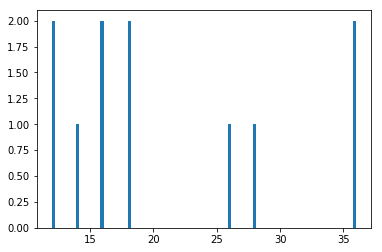

32
(6,)
40.0
16.0
26.666666666666668
10.561986345169906


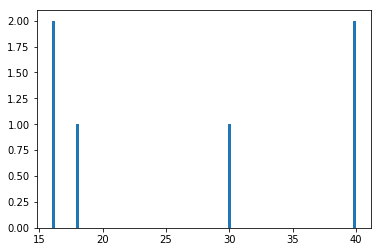

33
(10,)
56.0
12.0
28.6
15.467385040788246


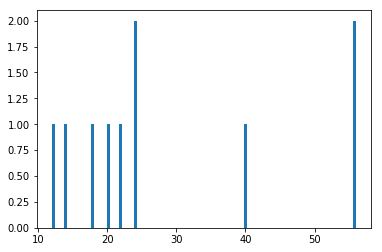

34
(11,)
48.0
10.0
24.545454545454547
12.301985326572563


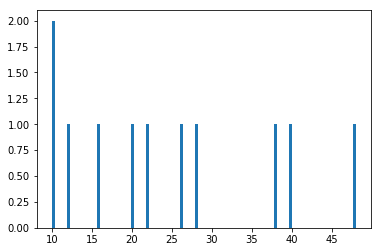

35
(9,)
40.0
10.0
22.0
10.327955589886445


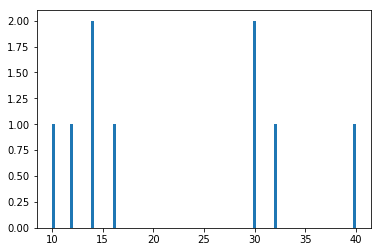

36
(1,)
36.0
36.0
36.0
0.0


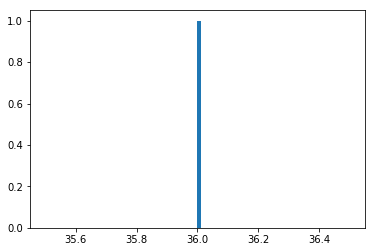

37
(2,)
26.0
14.0
20.0
6.0


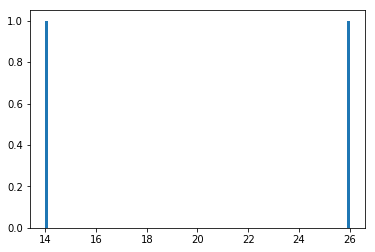

38
(2,)
18.0
18.0
18.0
0.0


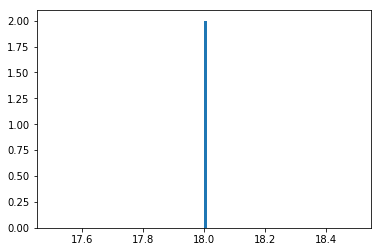

39
(1,)
22.0
22.0
22.0
0.0


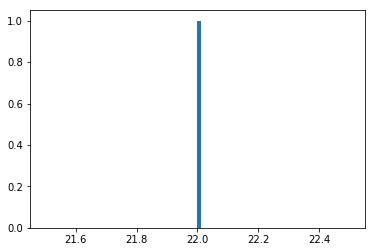

40
(4,)
44.0
18.0
27.5
9.836157786453


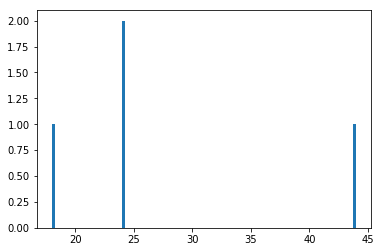

41
(3,)
22.0
16.0
19.333333333333332
2.494438257849294


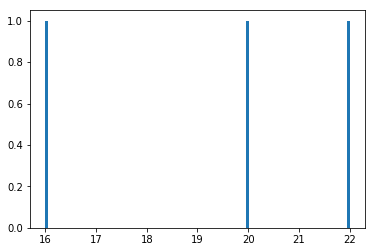

42
(2,)
22.0
16.0
19.0
3.0


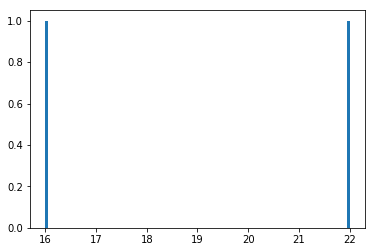

43
(5,)
84.0
12.0
34.8
25.285569006846572


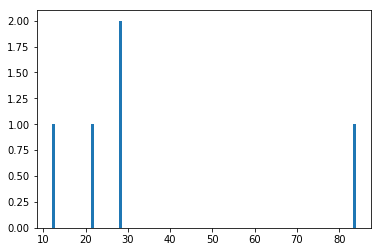

44
(3,)
22.0
14.0
17.333333333333332
3.39934634239519


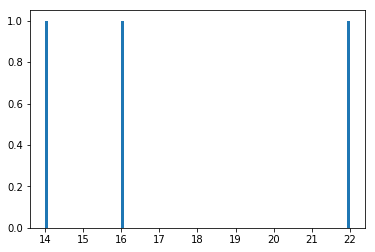

45
(2,)
34.0
12.0
23.0
11.0


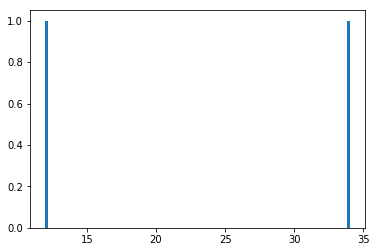

46
(2,)
44.0
12.0
28.0
16.0


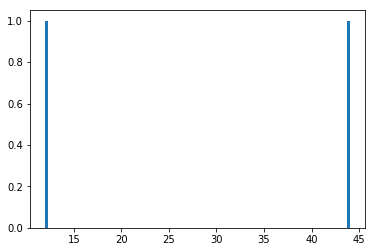

47
(2,)
18.0
12.0
15.0
3.0


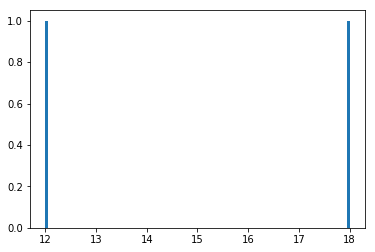

48
(5,)
22.0
12.0
16.4
3.4409301068170506


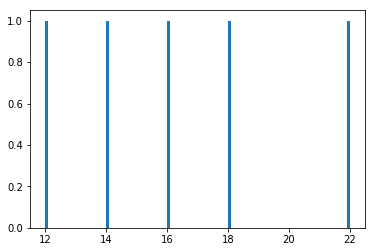

49
(7,)
48.0
10.0
21.428571428571427
12.26909174490508


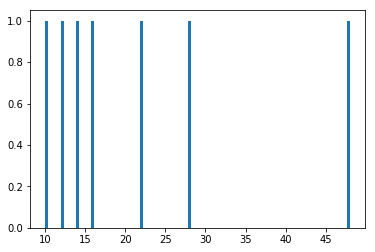

50
(2,)
26.0
18.0
22.0
4.0


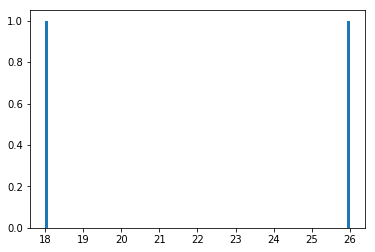

51
(3,)
32.0
12.0
21.333333333333332
8.219218670625303


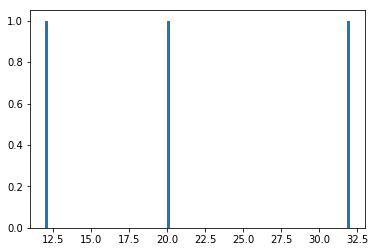

52
(7,)
78.0
10.0
26.0
22.500793636796775


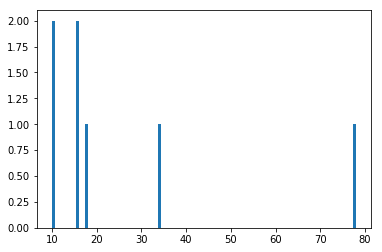

53
(9630,)
56.0
0.0
21.295454545454547
2.2527546126551385


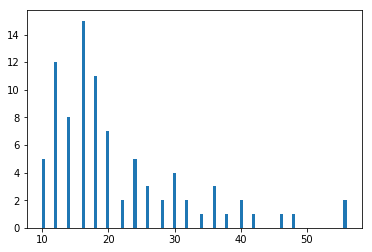

66
(1,)
38.0
38.0
38.0
0.0


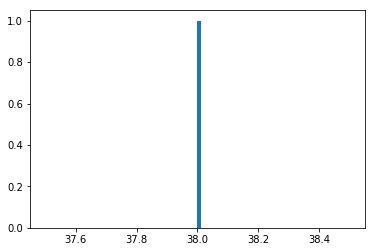

86
(1,)
36.0
36.0
36.0
0.0


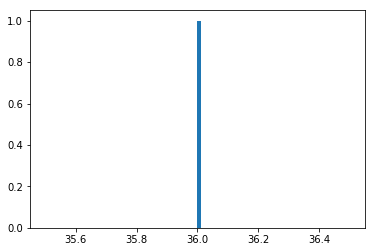

####################################
0
(127,)
64.0
10.0
24.661417322834644
12.78053420965295


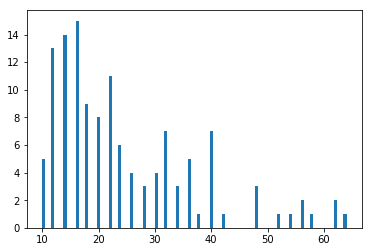

1
(12,)
44.0
12.0
24.333333333333332
9.049247973665484


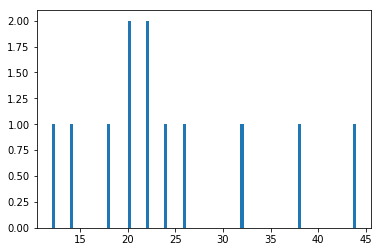

2
(3,)
38.0
14.0
29.333333333333332
10.873004286866728


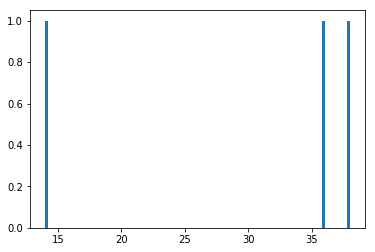

3
(8,)
44.0
14.0
24.5
10.665364503850771


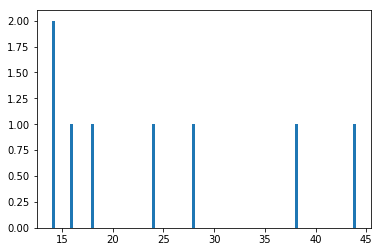

4
(11,)
88.0
10.0
24.181818181818183
22.489667048823602


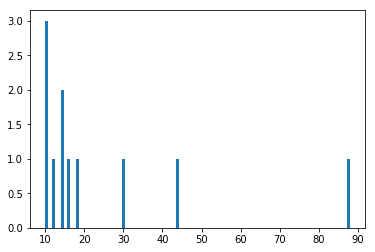

5
(1,)
28.0
28.0
28.0
0.0


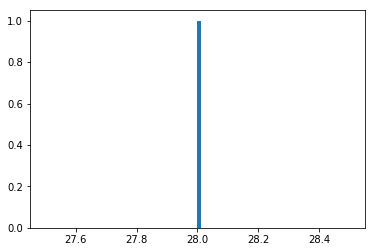

6
(17,)
56.0
12.0
22.235294117647058
10.691004529728312


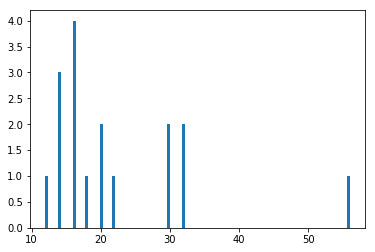

7
(6,)
50.0
18.0
28.666666666666668
13.743685418725535


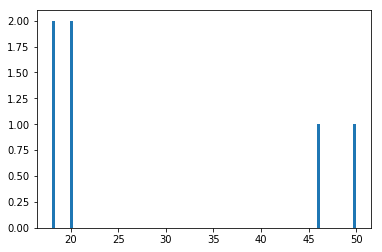

8
(6,)
46.0
12.0
24.666666666666668
12.840906856172149


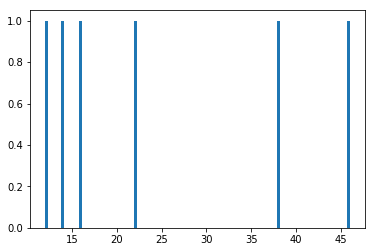

9
(1,)
32.0
32.0
32.0
0.0


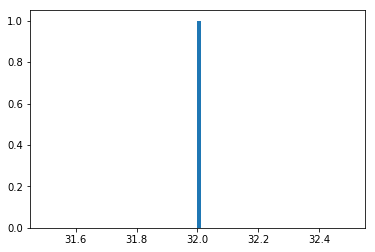

10
(8,)
34.0
10.0
19.75
9.56229574945264


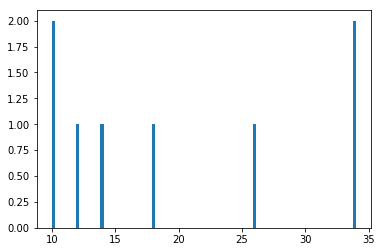

11
(3,)
20.0
14.0
16.666666666666668
2.494438257849294


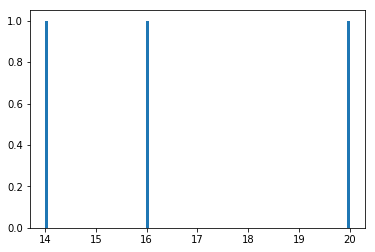

12
(8,)
54.0
10.0
23.0
14.177446878757825


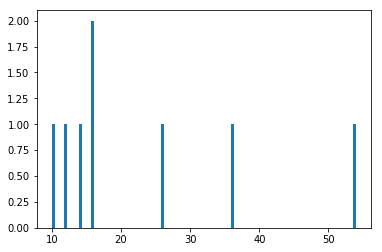

13
(1,)
28.0
28.0
28.0
0.0


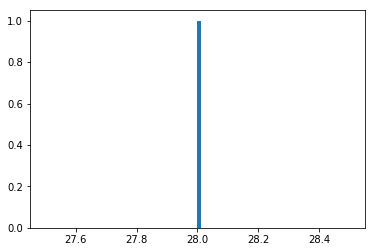

14
(2,)
16.0
12.0
14.0
2.0


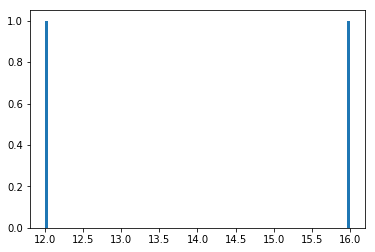

15
(2,)
16.0
16.0
16.0
0.0


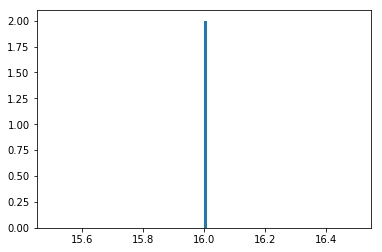

16
(11,)
46.0
12.0
26.0
10.126472956832233


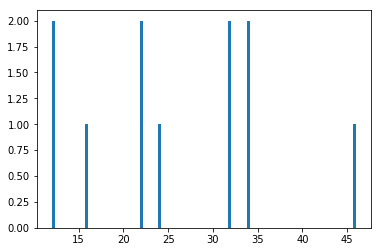

17
(4,)
44.0
16.0
28.0
10.198039027185569


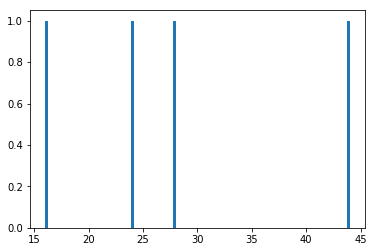

18
(5,)
54.0
12.0
24.0
15.543487382180357


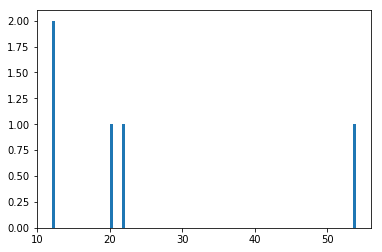

19
(1,)
26.0
26.0
26.0
0.0


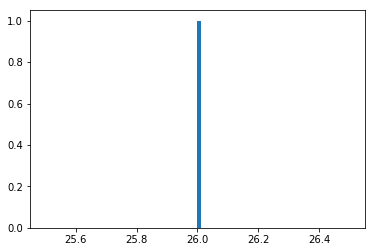

20
(4,)
24.0
16.0
20.5
2.958039891549808


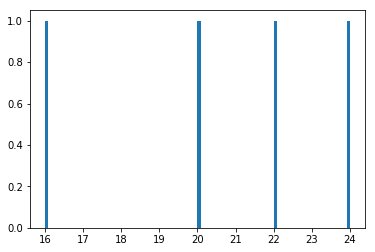

21
(3,)
26.0
12.0
17.333333333333332
6.182412330330469


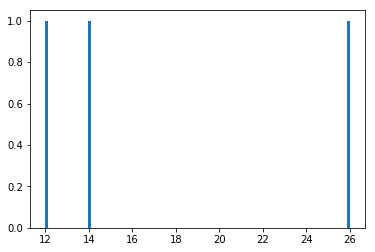

22
(9,)
80.0
10.0
26.0
20.374275719914834


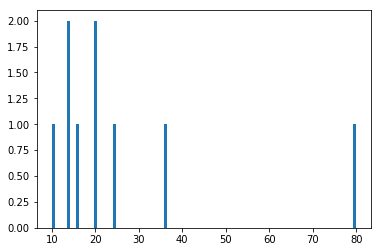

23
(6,)
40.0
12.0
26.333333333333332
9.89388138643722


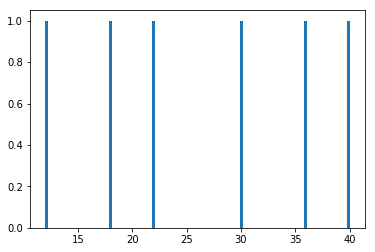

24
(9,)
36.0
12.0
22.22222222222222
8.243216440440627


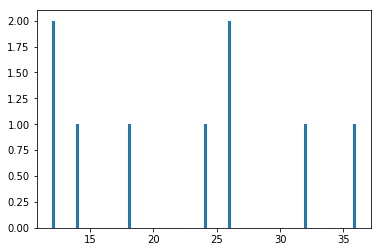

25
(1,)
16.0
16.0
16.0
0.0


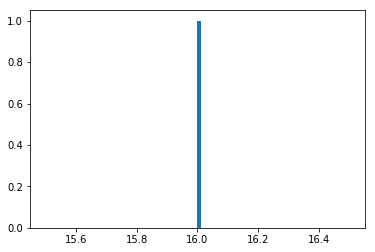

26
(9,)
50.0
12.0
26.22222222222222
13.214283330949783


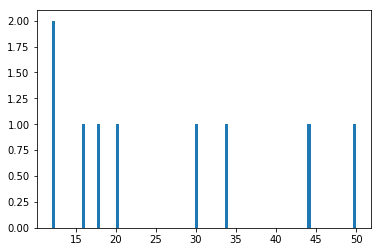

27
(1,)
36.0
36.0
36.0
0.0


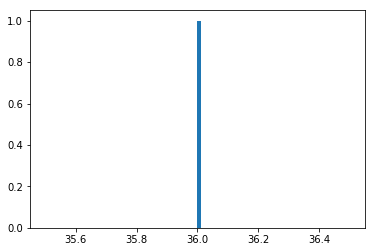

28
(2,)
14.0
12.0
13.0
1.0


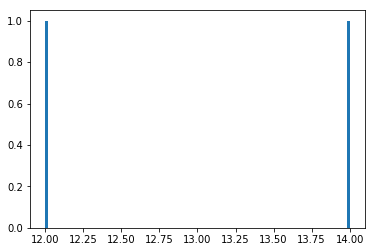

29
(2,)
26.0
14.0
20.0
6.0


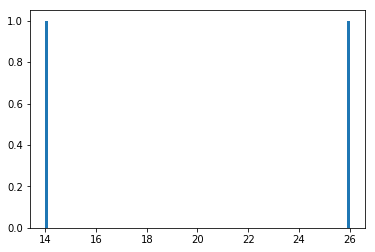

30
(2,)
18.0
18.0
18.0
0.0


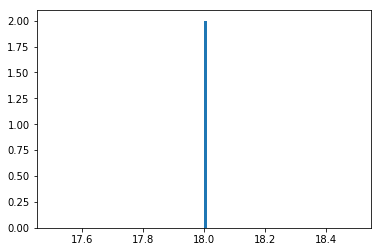

31
(1,)
22.0
22.0
22.0
0.0


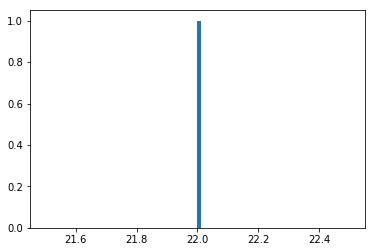

32
(4,)
44.0
18.0
27.5
9.836157786453


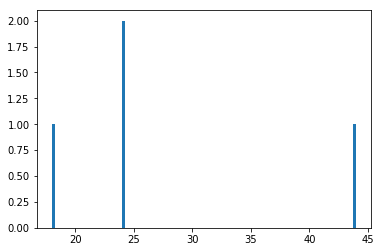

33
(3,)
22.0
16.0
19.333333333333332
2.494438257849294


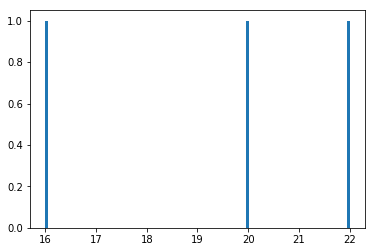

34
(2,)
22.0
16.0
19.0
3.0


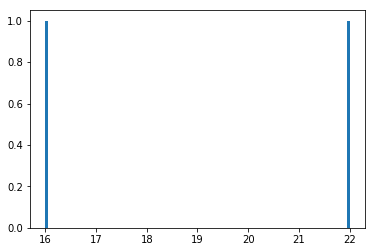

35
(5,)
84.0
12.0
34.8
25.285569006846572


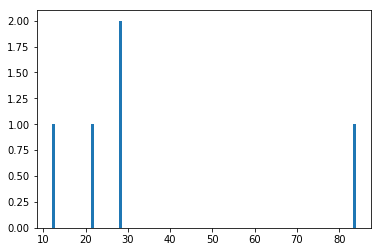

36
(3,)
22.0
14.0
17.333333333333332
3.39934634239519


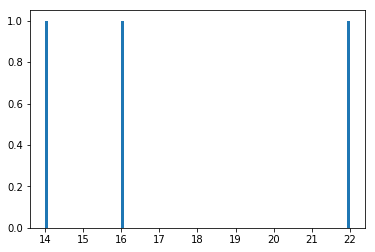

37
(2,)
34.0
12.0
23.0
11.0


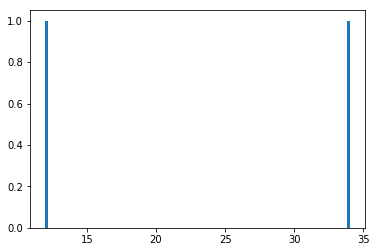

38
(2,)
44.0
12.0
28.0
16.0


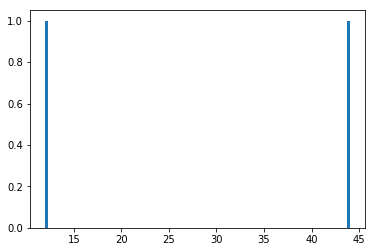

39
(2,)
18.0
12.0
15.0
3.0


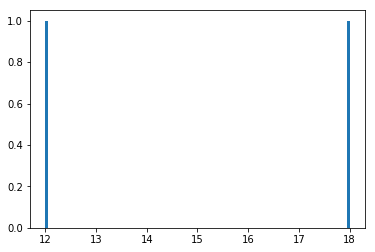

40
(5,)
22.0
12.0
16.4
3.4409301068170506


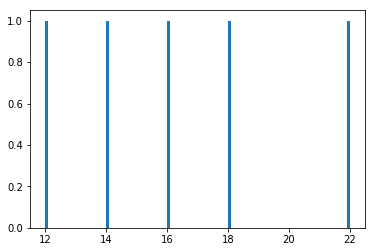

41
(8,)
48.0
10.0
20.25
11.892749892266297


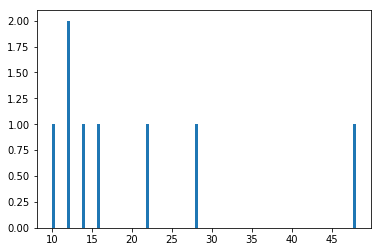

42
(2,)
26.0
18.0
22.0
4.0


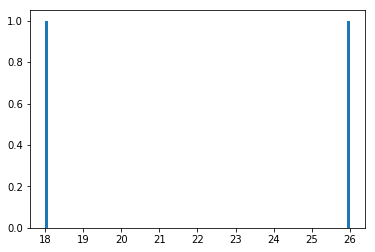

43
(3,)
32.0
12.0
21.333333333333332
8.219218670625303


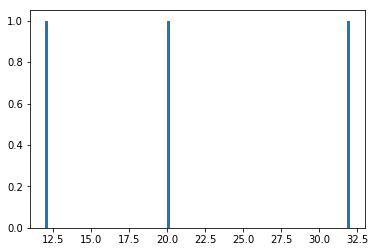

44
(7,)
78.0
10.0
26.0
22.500793636796775


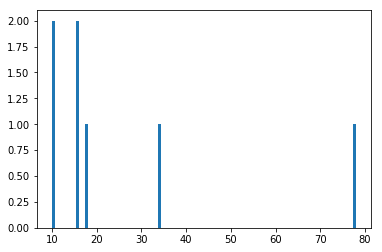

45
(315,)
56.0
0.0
21.25
10.986677380763696


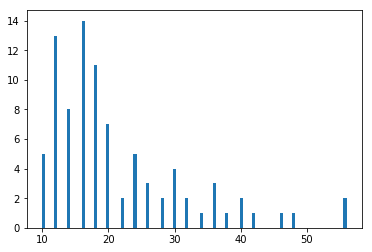

46
(215,)
0.0
0.0
nan
0.0


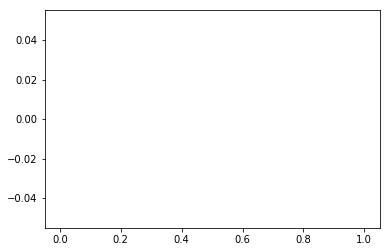

47
(26,)
0.0
0.0
nan
0.0


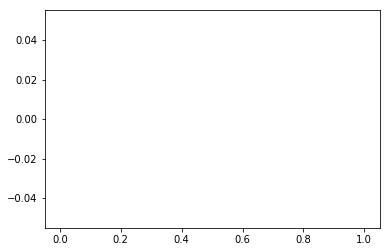

48
(9074,)
0.0
0.0
nan
0.0


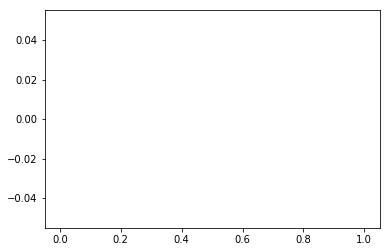

57
(1,)
38.0
38.0
38.0
0.0


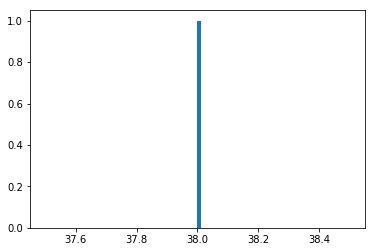

61
(1,)
14.0
14.0
14.0
0.0


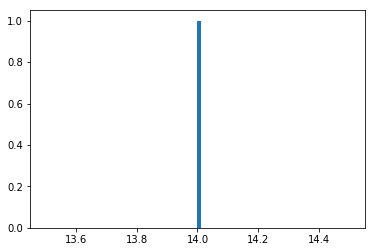

76
(1,)
12.0
12.0
12.0
0.0


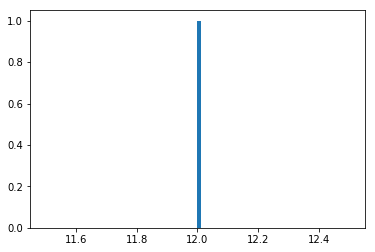

77
(1,)
36.0
36.0
36.0
0.0


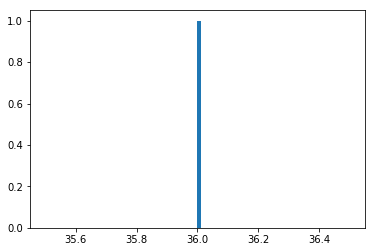

In [64]:
for cluster_labels in [ cluster_labels_codon , cluster_labels_reduced ]:
    l,c = np.unique(cluster_labels, return_counts= True)
    
    print('####################################')
    for i,label in enumerate(np.unique(cluster_labels)):

        print(label)
        
        sumv = np.sum(codonmat[:, np.where( cluster_labels==label ) ] , axis = 0)
        print(sumv.ravel().shape)
        print(np.amax(sumv))
        print(np.amin(sumv))
        print(np.mean(sumv[sumv>0]))
        print(np.std(sumv))
        counts,bins = np.histogram(sumv[sumv>0].ravel() , bins = 100)
        centroids = (bins[1:] + bins[:-1]) / 2
        counts_, bins_, _ = plt.hist(centroids, bins=len(counts),
                                     weights=counts, range=(min(bins), max(bins)))
        plt.show()

In [ ]:
l,c = np.unique(cluster_labels_raw, return_counts= True)
print(len(l))
print(c)
print(np.sum(c))
for i,label in enumerate(np.unique(cluster_labels_raw)):
    if len(cluster_labels[ cluster_labels==label ] ) < 200 and len(cluster_labels[ cluster_labels==label ] ) > 6:
        print('cluster:',label)
        print( 'cluster size:' ,len(cluster_labels[ cluster_labels==label ] ) )
        mask =  copy.deepcopy(submat_coev)
        mask[:,  cluster_labelsb_raw!=label ] = 0
        plt.spy( mask, markersize = 1 , mfc = crange[i]  , mec = crange[i] )
plt.show()


In [ ]:
from scipy import stats
from statsmodels.sandbox.stats.multicomp import multipletests
#over the whole genome
titles = ' codon clusters, svd codon clusters,  nucleotide blurred clustered '.split(',')
for k,cluster_labels in enumerate([ cluster_labels_codon , cluster_labels_reduced , cluster_labels_raw ]):
    bonferroni = []
    plots = []
    plotlabels=[]
    plt.figure( figsize=(20,20))
    cdf_uniform = np.cumsum(np.ones(len(cluster_labels)) ) / np.sum(np.ones(len(cluster_labels)) )
    for i,label in enumerate(np.unique(cluster_labels_raw)):
        cluster_ones = np.zeros(len(cluster_labels))        
        cluster_ones[ cluster_labels==label ] = 1
        if np.sum(cluster_ones) > 4 and np.sum(cluster_ones) < 1000 :
            cdf_empirical= np.cumsum(cluster_ones) / np.sum(cluster_ones)
            res = stats.kstest(np.where(cluster_labels == label) , 'uniform')
            fig = plt.plot( cdf_empirical )
            plots.append(fig)
            plotlabels.append( str(label) +  ' npts: '+ str(int( np.sum(cluster_ones)) ) )  
            bonferroni.append(res[1])
    plt.plot(cdf_uniform, lw = 2 , ls = 'dashed' , c = 'black' )
    
    plotlabels = [ str(p) + ' corrected pval:' + str(bonferroni[ i ]) for i,p in enumerate( plotlabels ) ]+['uniform']
    plt.legend( plotlabels )
    plt.title( titles[k])
    plt.show()
    bf_correction = multipletests(bonferroni, alpha=0.05, method='bonferroni', is_sorted=False, returnsorted=False)
    print(bf_correction)

/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


242.0
86
Ks_2sampResult(statistic=0.10242776886035312, pvalue=6.391360860260951e-46)
269.0
86
Ks_2sampResult(statistic=0.33487158908507225, pvalue=0.0)
274.0
86
Ks_2sampResult(statistic=0.20545746388443017, pvalue=1.8257224486381982e-184)
271.0
86
Ks_2sampResult(statistic=0.31831861958266455, pvalue=1e-323)
266.0
86
Ks_2sampResult(statistic=0.17786918138041732, pvalue=4.1355600352250924e-138)
276.0
86
Ks_2sampResult(statistic=0.5510634028892456, pvalue=0.0)
276.0
86
Ks_2sampResult(statistic=0.37369582664526485, pvalue=0.0)
274.0
86
Ks_2sampResult(statistic=0.3637640449438202, pvalue=0.0)
274.0
86
Ks_2sampResult(statistic=0.3967696629213483, pvalue=0.0)
271.0
86
Ks_2sampResult(statistic=0.5489566613162119, pvalue=0.0)
277.0
86
Ks_2sampResult(statistic=0.46679373996789725, pvalue=0.0)
277.0
86
Ks_2sampResult(statistic=0.39997993579454255, pvalue=0.0)
272.0
86
Ks_2sampResult(statistic=0.37279293739967895, pvalue=0.0)
276.0
86
Ks_2sampResult(statistic=0.33747993579454255, pvalue=0.0)
273.0

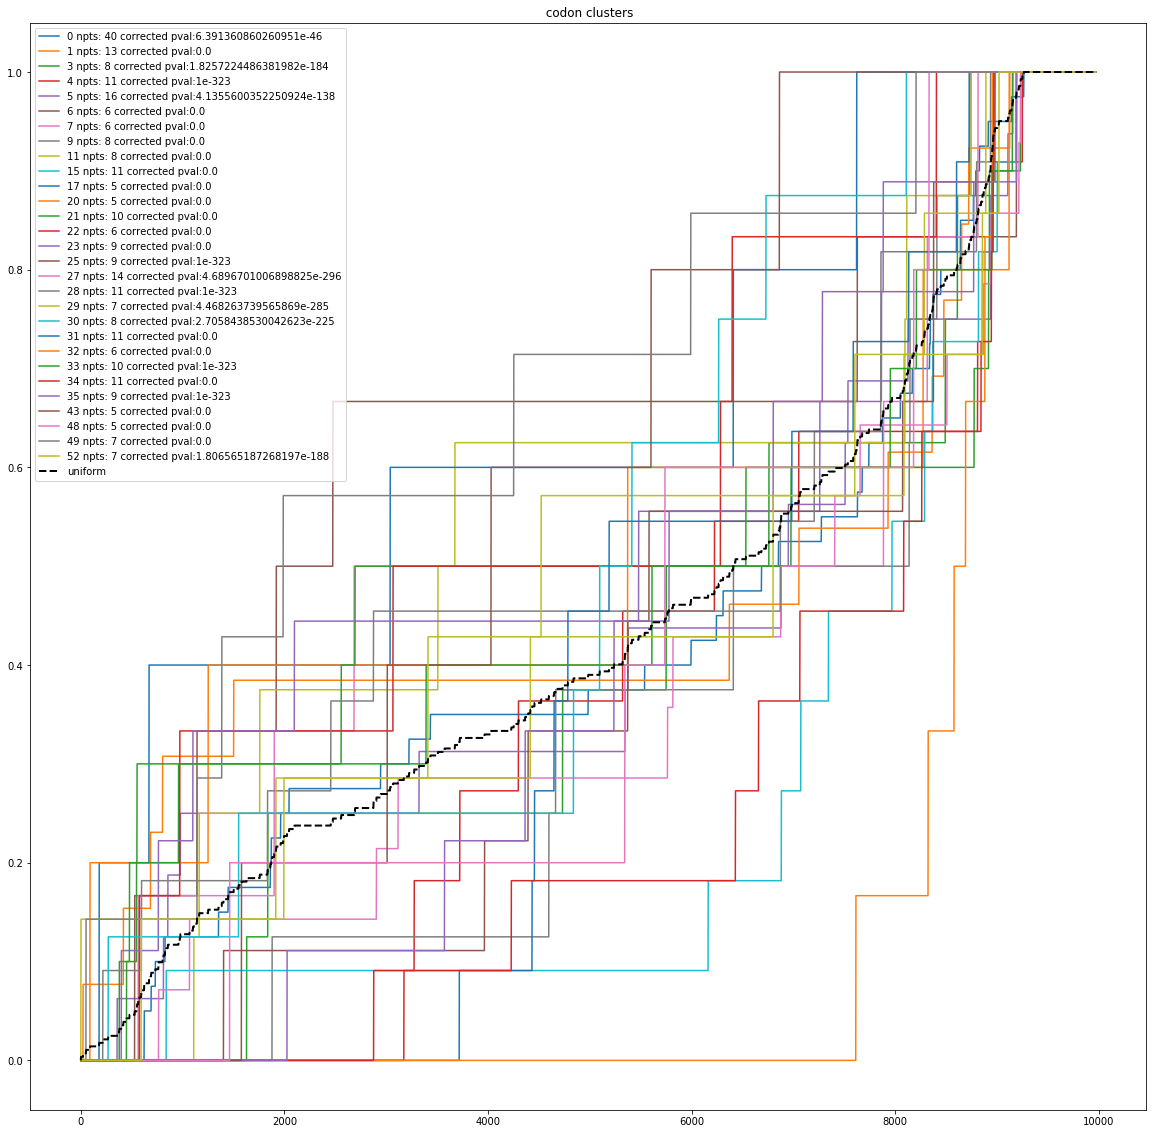

(array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True]), array([1.85349465e-044, 0.00000000e+000, 5.29459510e-183, 2.86558075e-322,
       1.19931241e-136, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 2.86558075e-322,
       1.36000433e-294, 2.86558075e-322, 1.29579648e-283, 7.84694717e-224,
       0.00000000e+000, 0.00000000e+000, 2.86558075e-322, 0.00000000e+000,
       2.86558075e-322, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       5.23903904e-187]), 0.0017671710005495722, 0.001724137931034483)
706.0
77
Ks_2sampResult(statistic=0.7453852327447833, pvalue=0.0)
821.0
77
Ks_2sampResult(statistic=0.7290329052969502, pvalue=0.0)
825.0
77
Ks_2sampResult(statistic=0.74

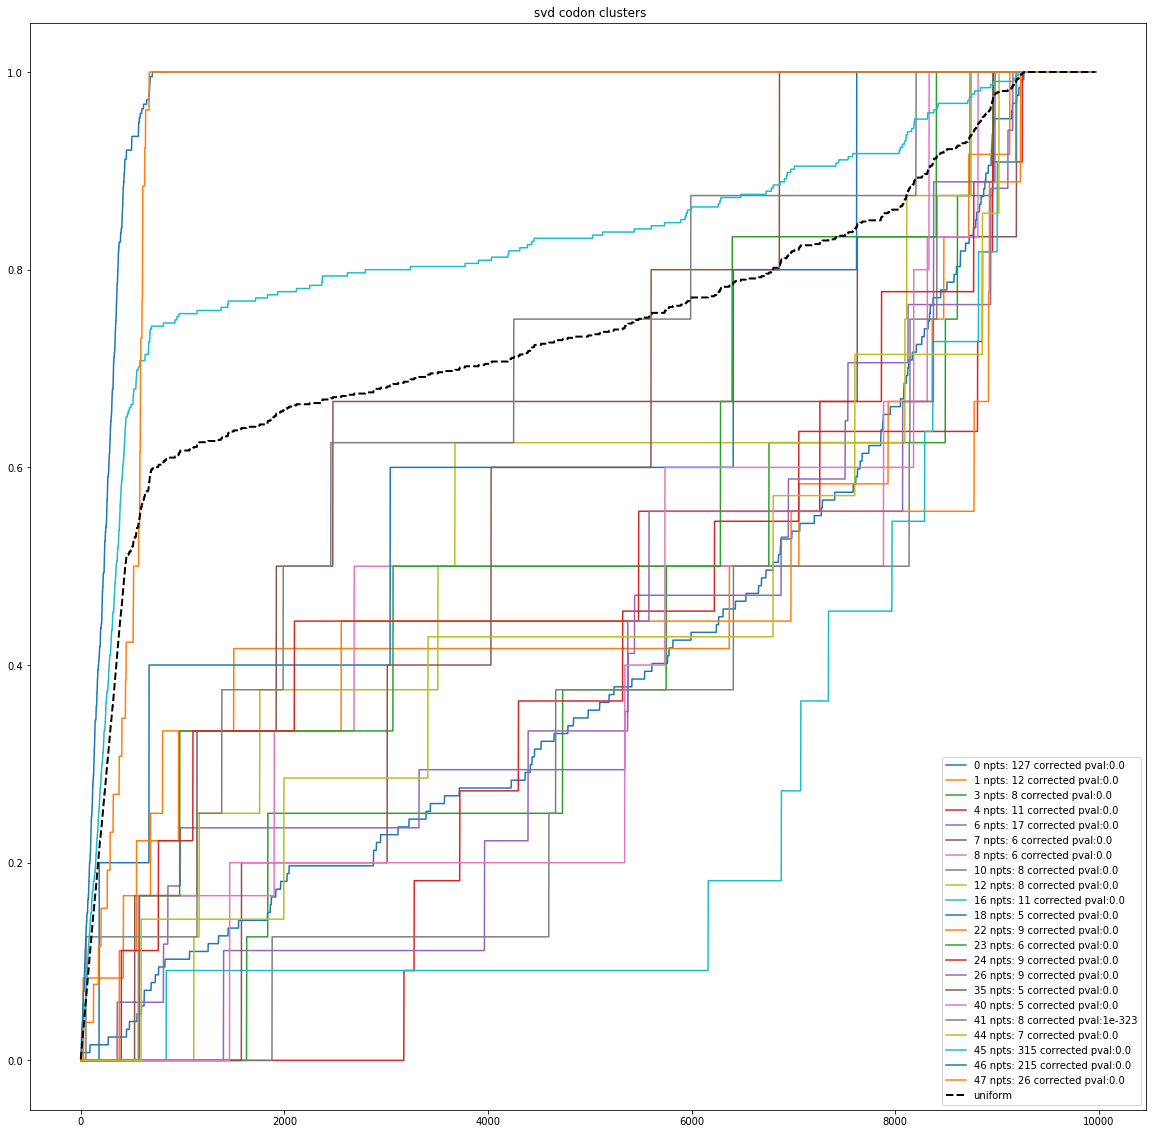

(array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True]), array([0.00e+000, 0.00e+000, 0.00e+000, 0.00e+000, 0.00e+000, 0.00e+000,
       0.00e+000, 0.00e+000, 0.00e+000, 0.00e+000, 0.00e+000, 0.00e+000,
       0.00e+000, 0.00e+000, 0.00e+000, 0.00e+000, 0.00e+000, 2.17e-322,
       0.00e+000, 0.00e+000, 0.00e+000, 0.00e+000]), 0.0023287975150316775, 0.002272727272727273)
408.0
99
Ks_2sampResult(statistic=0.15770992876968867, pvalue=2e-323)
416.0
99
Ks_2sampResult(statistic=0.17443065913119085, pvalue=0.0)
422.0
99
Ks_2sampResult(statistic=0.5611142694712905, pvalue=0.0)
423.0
99
Ks_2sampResult(statistic=0.3455506136508043, pvalue=0.0)
421.0
99
Ks_2sampResult(statistic=0.5874995819817409, pvalue=0.0)
420.0
99
Ks_2sampResult(statistic=0.24134702203792263, pvalue=0.0)
422.0
99
Ks_2sampResult(statistic=0.20569842490719992, pvalue=0.0)
422.0
99
Ks_2sampResult(statistic=0.

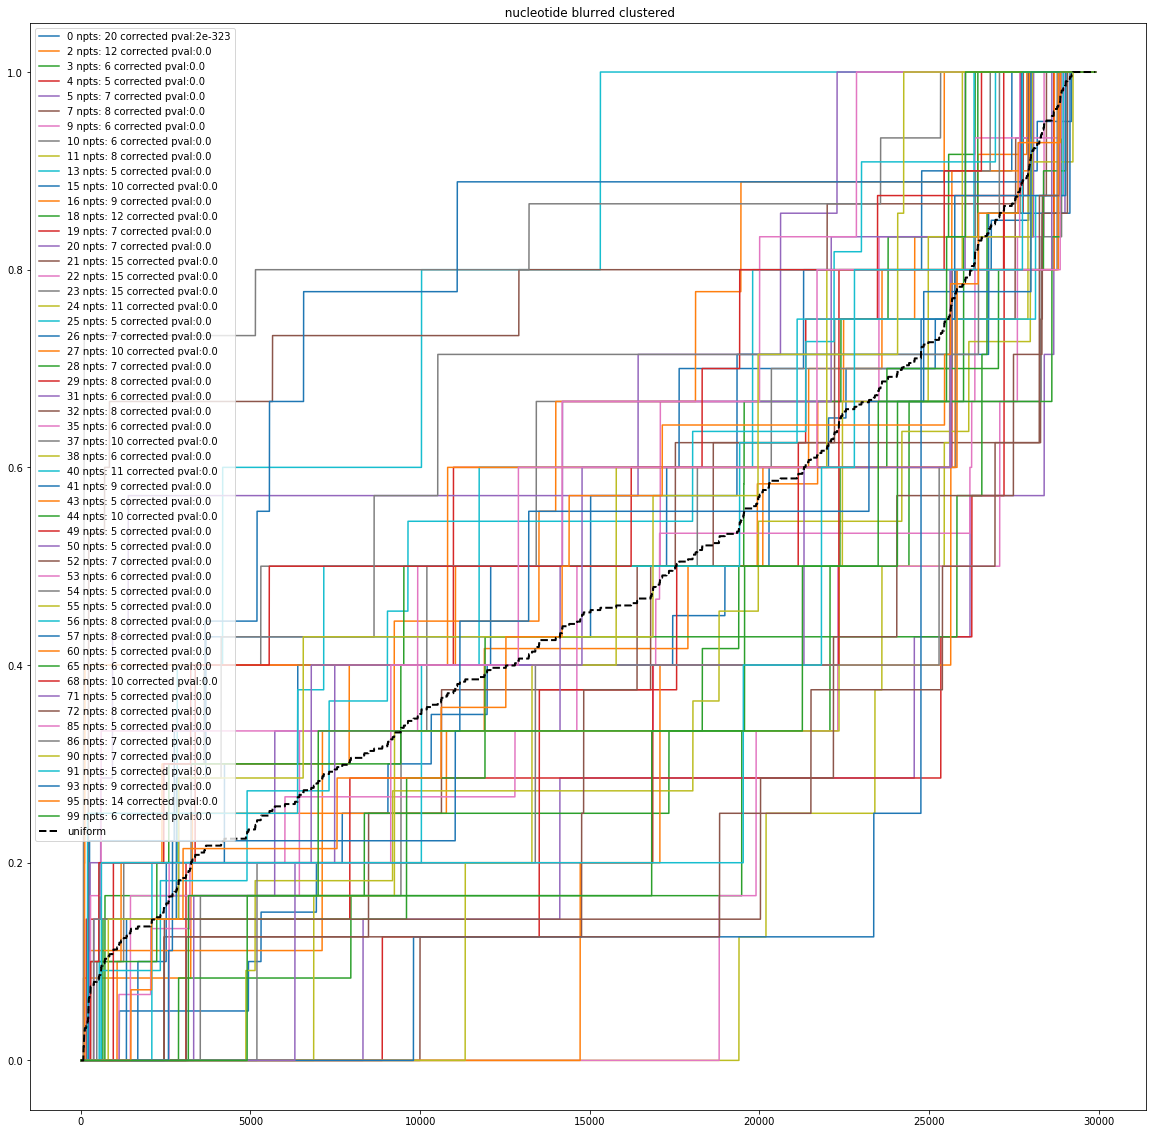

(array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True]), array([1.047e-321, 0.000e+000, 0.000e+000, 0.000e+000, 0.000e+000,
       0.000e+000, 0.000e+000, 0.000e+000, 0.000e+000, 0.000e+000,
       0.000e+000, 0.000e+000, 0.000e+000, 0.000e+000, 0.000e+000,
       0.000e+000, 0.000e+000, 0.000e+000, 0.000e+000, 0.000e+000,
       0.000e+000, 0.000e+000, 0.000e+000, 0.000e+000, 0.000e+000,
       0.000e+000, 0.000e+000, 0.000e+000, 0.000e+000, 0.000e+000,
       0.000e+000, 0.000e+000, 0.000e+000, 0.000e+000, 0.000e+000,
       0.000e+000, 0.000e+000, 0.000e+000, 0.000e+000, 0.000e+000,
       0.000e+000, 0.000e+000, 0.000e+000, 0.000

In [42]:
from scipy import stats
from statsmodels.sandbox.stats.multicomp import multipletests
#over the whole genome 
titles = ' codon clusters, svd codon clusters,  nucleotide blurred clustered '.split(',')
for j,cluster_labels in enumerate([ cluster_labels_codon , cluster_labels_reduced , cluster_labels_raw ]):
    clusters, counts = np.unique( cluster_labels , return_counts= True )
    bonferroni = []
    plots = []
    plotlabels=[]
    
    plt.figure( figsize=(20,20))
    
    for i,label in enumerate(clusters):    
        cluster_ones = np.zeros(len(cluster_labels))        
        cluster_ones[ cluster_labels==label ] = 1 
        if counts[i] > 4 and counts[i] < 1000 :
            cdf_BG = np.zeros(len(cluster_labels))
            for k,c in enumerate(clusters):
                if c != label and counts[k] > 4 and counts[k] < 1000 :
                    cdf_BG[cluster_labels==c] = 1
                    
            print( np.sum(cdf_BG) )
            cdf_BG = np.cumsum(cdf_BG) / np.sum(cdf_BG)
            cdf_empirical= np.cumsum(cluster_ones) / np.sum(cluster_ones)
            #compare to bg distribution without
            
            
            res = stats.ks_2samp(cdf_empirical, cdf_BG)
            print(c)
            print(res)
            fig = plt.plot( cdf_empirical )
            plots.append(fig)        
            plotlabels.append( str(label) +  ' npts: '+ str(int( np.sum(cluster_ones)) ) )  
            bonferroni.append(res[1])
    
    cdf_BG = np.zeros(len(cluster_labels))
    for k,c in enumerate(clusters):
        if counts[k] > 4 and counts[k] < 1000 :
            cdf_BG[cluster_labels==c] = 1
    cdf_BG = np.cumsum(cdf_BG) / np.sum(cdf_BG)

    plt.plot(cdf_BG, lw = 2 , ls = 'dashed' , c = 'black' )
    plotlabels = [ str(p) + ' corrected pval:' + str(bonferroni[ i ]) for i,p in enumerate( plotlabels ) ]+['uniform']
    
    plt.legend( plotlabels )
    plt.title( titles[j])
    plt.show()
    bf_correction = multipletests(bonferroni, alpha=0.05, method='bonferroni', is_sorted=False, returnsorted=False)
    print(bf_correction)

In [48]:
titles = ' codon clusters, svd codon clusters'.split(',')
titles = [ t.replace(' ' , '_') for t in titles]
for k,cluster_labelsb in enumerate([ cluster_labels_codon , cluster_labels_reduced ]):
    l,c = np.unique(cluster_labelsb, return_counts= True)
    clusterdf = { label : [ codon_dict_rev[p] for p in list( np.where(cluster_labelsb == label )[0]  ) if p in codon_dict_rev ] for i,label in enumerate(list(l)) if c[i]> 1 } 
    clusterdf = pd.DataFrame.from_dict( clusterdf , orient = 'index' , dtype=pd.Int64Dtype() )
    print( clusterdf )
    print(clusterdf.index)
    clusterdf.to_csv( alnfile + titles[k] + 'clusterpositions_columns.csv')

     0      1      2      3      4      5      6      7      8      9     ...  \
0    2671   2674   2878   3001   3286   4864   5146   6391   6418   6694  ...   
1     871   2059   2860   3214   5311  20283  22348  24976  26313  26708  ...   
2   22480  22603  25791   <NA>   <NA>   <NA>   <NA>   <NA>   <NA>   <NA>  ...   
3    5692   6316  15024  18078  21450  26753  27110  28327   <NA>   <NA>  ...   
4   10327  10630  11974  13722  16794  19845  22342  27726  28007  28324  ...   
5    1876   3241   3370   3739  10774  16863  16956  21823  22036  23710  ...   
6    2392   4228   6565   8233  24067  29026   <NA>   <NA>   <NA>   <NA>  ...   
7    2497   6505   8860  24841  26142  27738   <NA>   <NA>   <NA>   <NA>  ...   
9    6442  14619  14820  20403  25608  25632  26451  27501   <NA>   <NA>  ...   
10   1411  13264  27020  27914   <NA>   <NA>   <NA>   <NA>   <NA>   <NA>  ...   
11   4135   4294   6079  11329  11830  25482  25536  27537   <NA>   <NA>  ...   
12  21655  23755   <NA>   <N

In [ ]:
protstart = {}
protend = {}
position = 0
for i,r in annotation.iterrows():
    protstart[i] = position 
    position += len( r.prots )
    protend[i] = position
annotation['codon_start'] = annotation.index.map( protstart )
annotation['codon_end'] = annotation.index.map( protend )
print(annotation)

In [176]:
import json
titles = ' codon clusters, svd codon clusters'.split(',')

for k,cluster_labels in enumerate([ cluster_labels_codon , cluster_labels_reduced ]):
    clusters = {}
    for l in np.unique(cluster_labels):
        if len(cluster_labels[ cluster_labels==l ] ) < 200 and len(cluster_labels[ cluster_labels==l ] ) > 4:
            #index of positions
            cluster_postions = np.where( cluster_labels==l )
            for i,r in annotation.iterrows():
                for p in list(cluster_postions[0]):
                    if r.prot_start < p+1 and r.prot_end > p+1:
                        if i not in clusters:
                            clusters[i] = {}
                        if l not in clusters[i]:
                            clusters[i][l] = []
                        clusters[i][l].append(p+1-r.prot_start)
    annotation[titles[k]]= annotation.index.map( clusters )

#annotation['clusters'] = annotation.clusters.map( lambda x : json.dumps( x ) )
print(annotation)

annotation.to_csv('./gisaid/hCoV-19_USA_MA-MGH-00701_2020_EPI ISL 460358_2020-04-06_wclusters.csv')

with open( 'annothack.pkl' , 'wb') as annotout:
    annotout.write(pickle.dumps(annotation))

      qseqid          sseqid   qlen  slen  qstart   qend  qframe  \
13  testgeno  YP_009725298.1  29903   638     806   2719       2   
3   testgeno  YP_009725299.1  29903  1945    2720   8554       2   
17  testgeno  YP_009725300.1  29903   500    8555  10054       2   
21  testgeno  YP_009725301.1  29903   306   10055  10972       2   
25  testgeno  YP_009725302.1  29903   290   10973  11842       2   
41  testgeno  YP_009725303.1  29903    83   11843  12091       2   
32  testgeno  YP_009725304.1  29903   198   12092  12685       2   
37  testgeno  YP_009725305.1  29903   113   12686  13024       2   
34  testgeno  YP_009725306.1  29903   139   13025  13441       2   
12  testgeno  YP_009725307.1  29903   932   13462  16236       1   
15  testgeno  YP_009725308.1  29903   601   16237  18039       1   
16  testgeno  YP_009725309.1  29903   527   18040  19620       1   
19  testgeno  YP_009725310.1  29903   346   19621  20658       1   
23  testgeno  YP_009725311.1  29903   298   2065

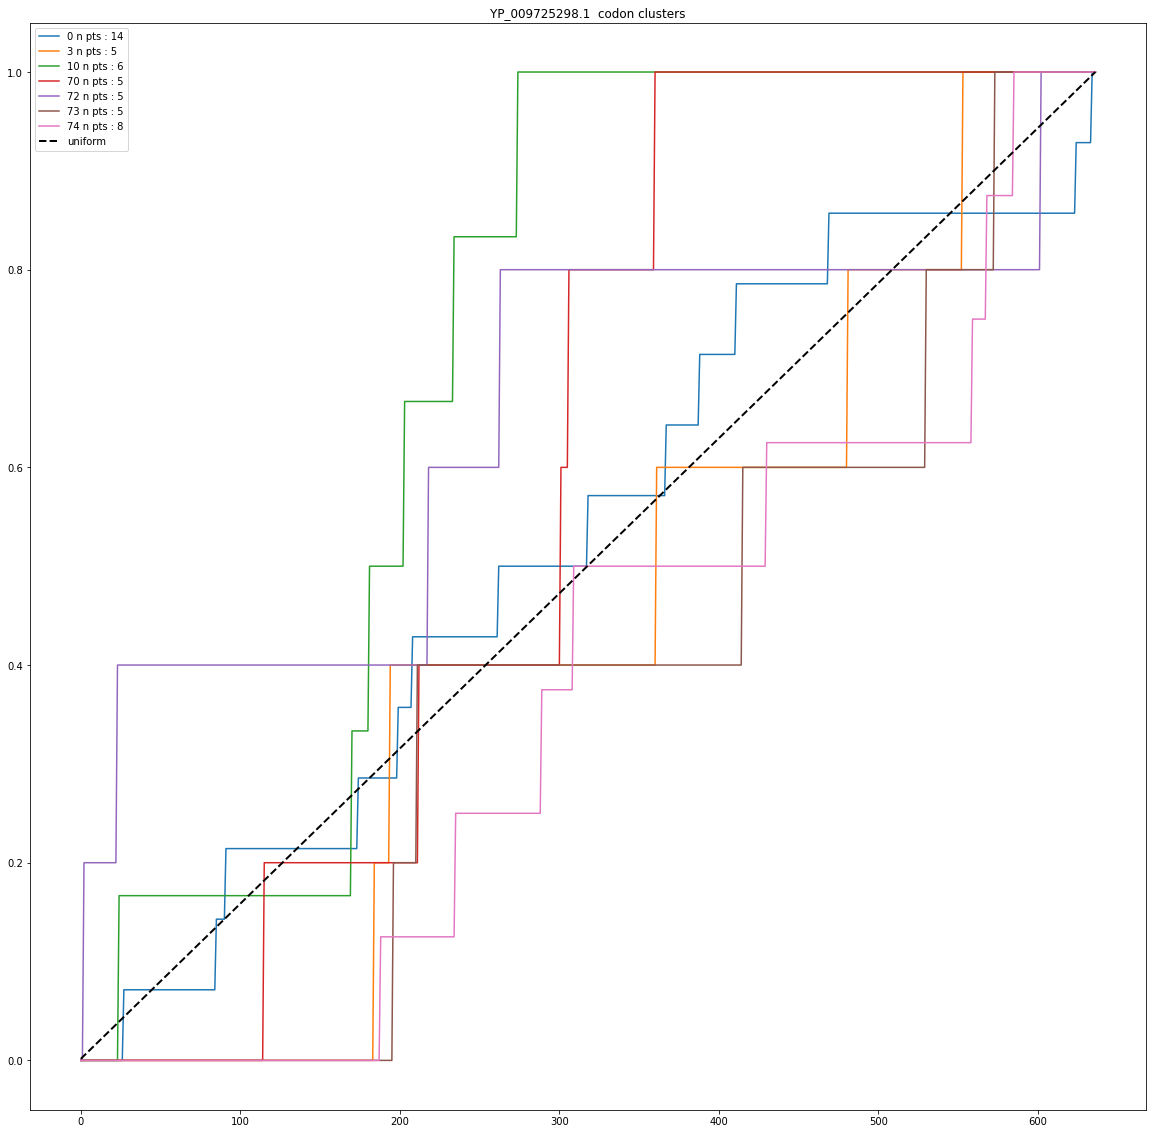

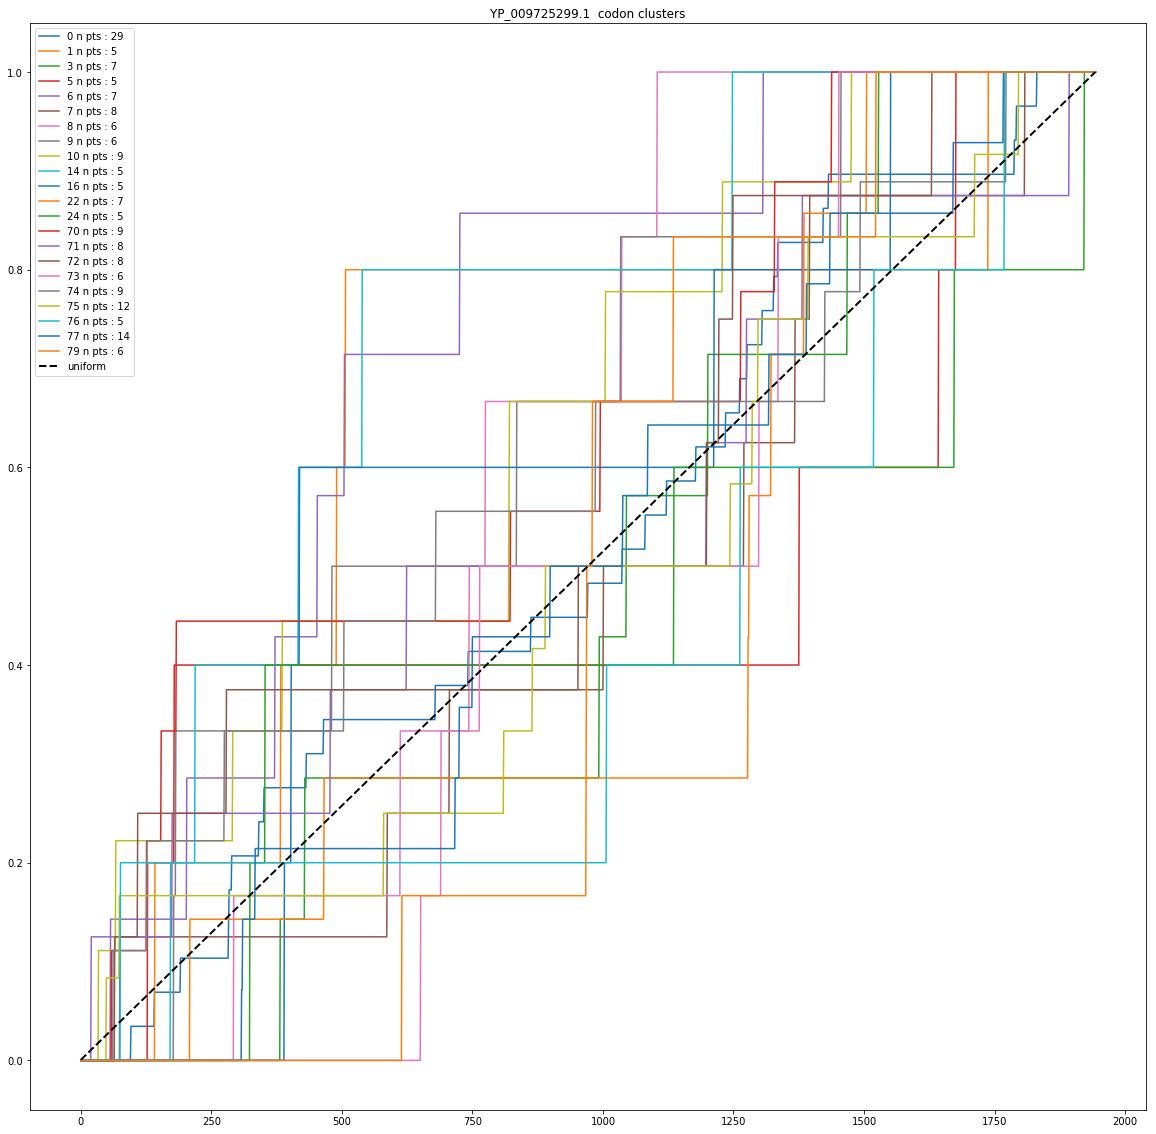

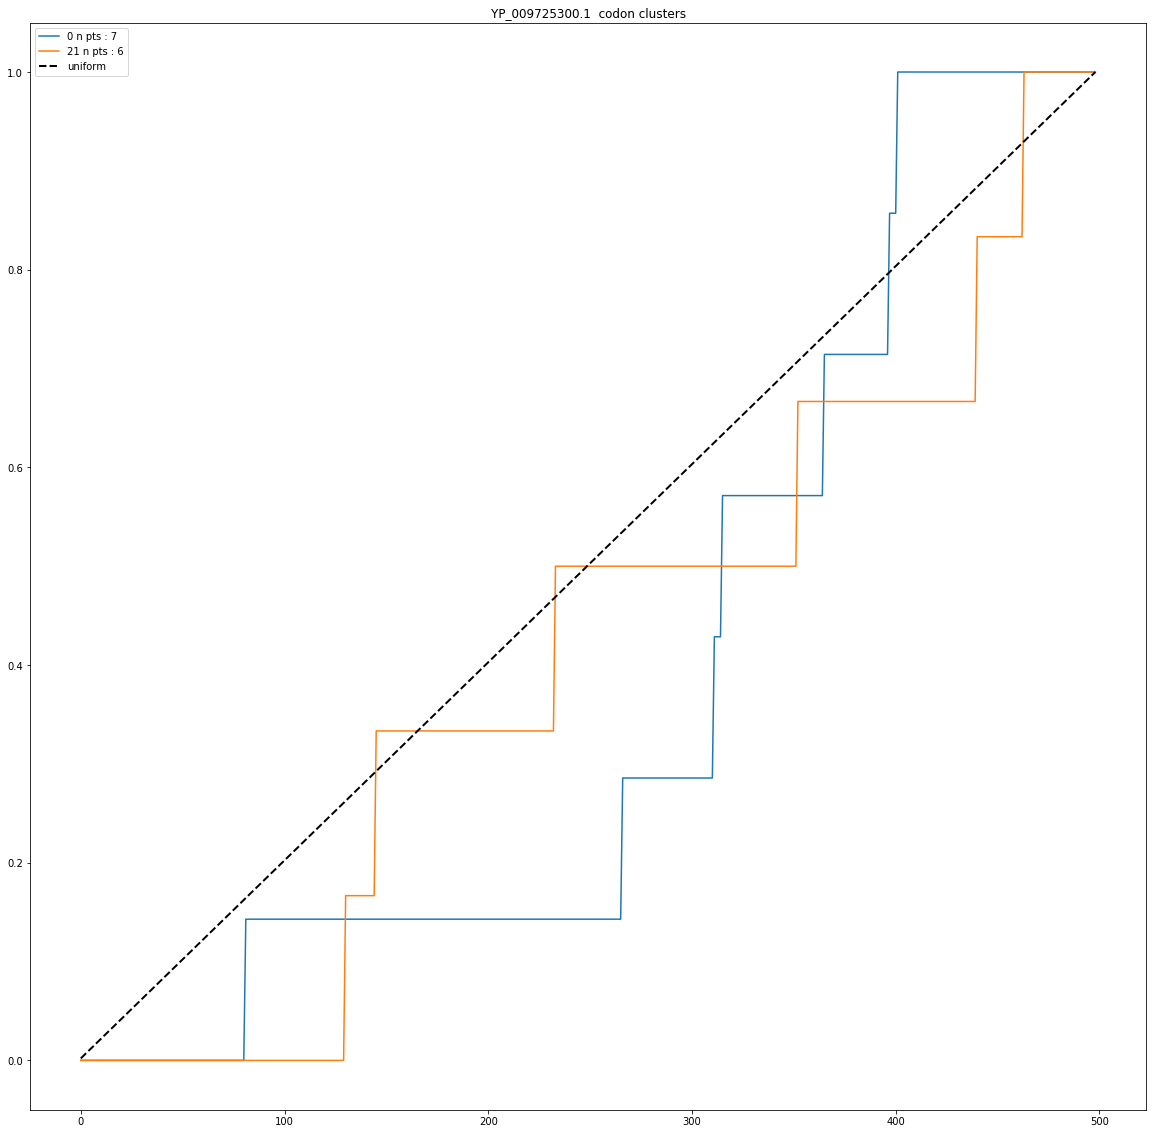

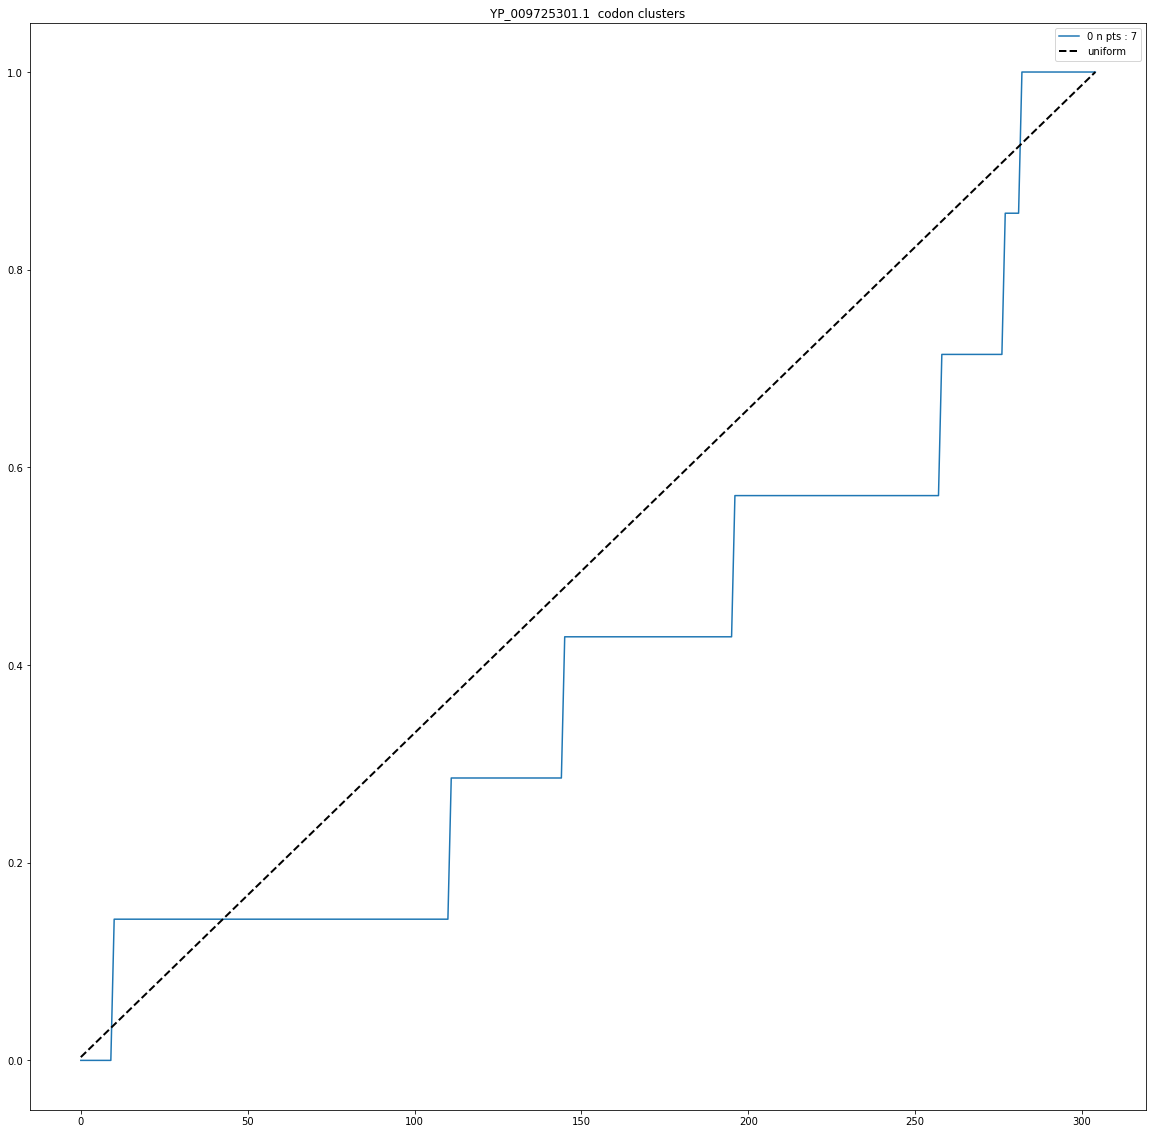

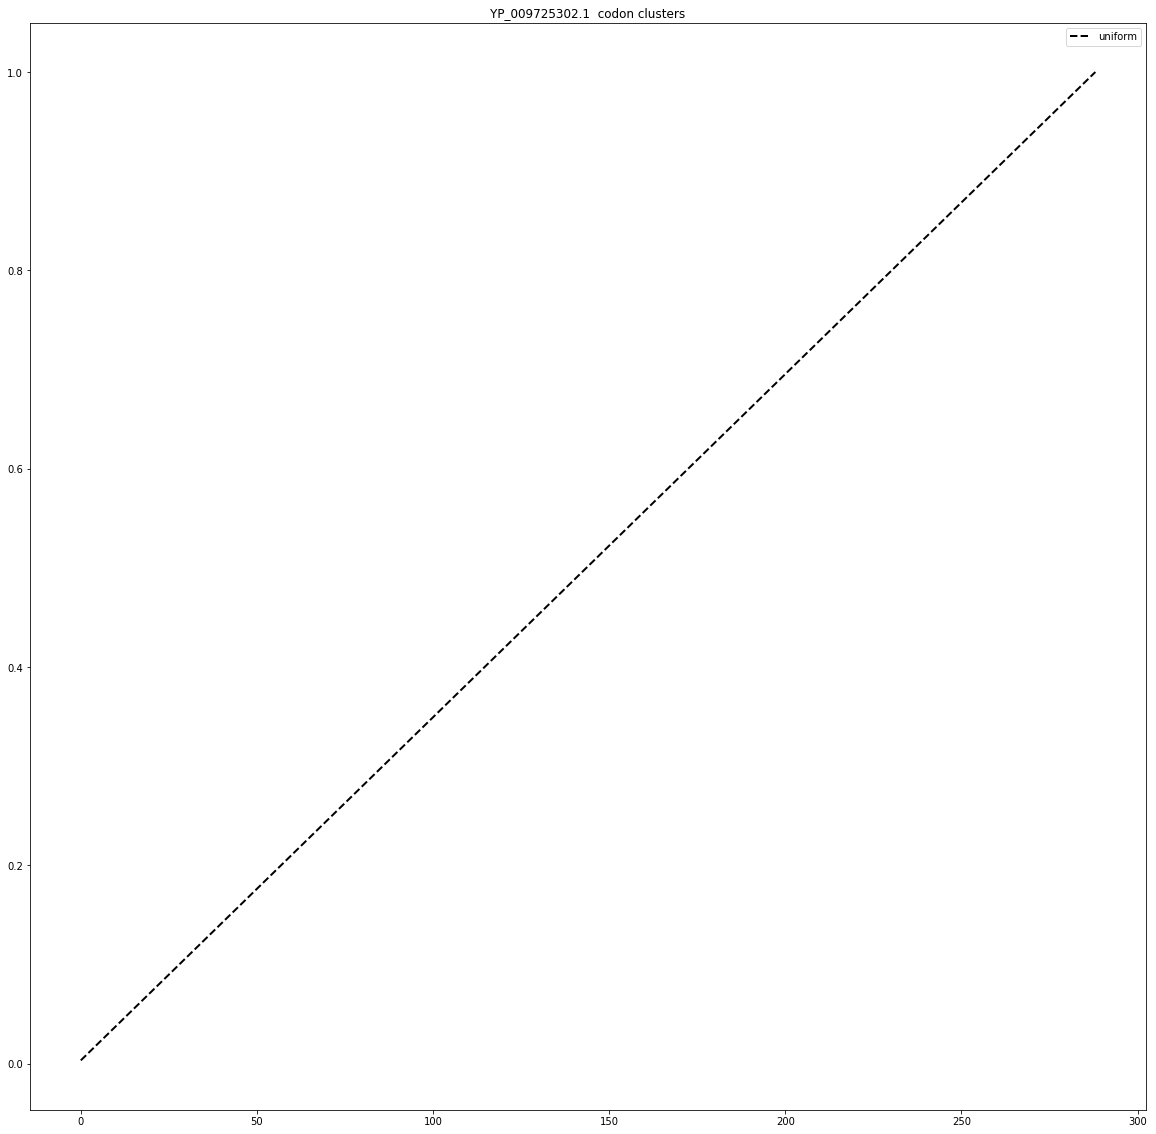

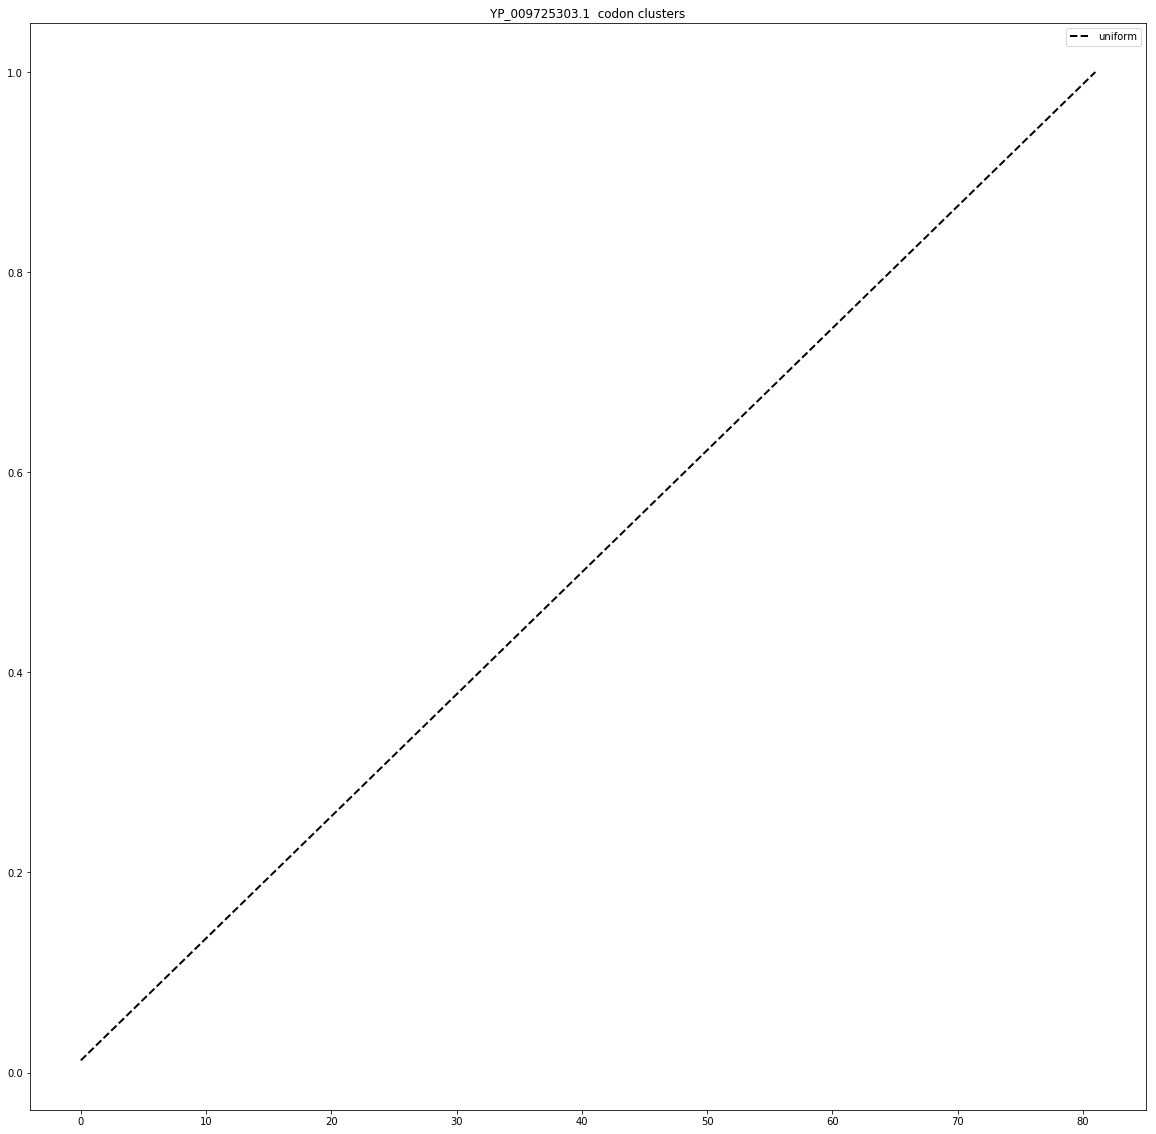

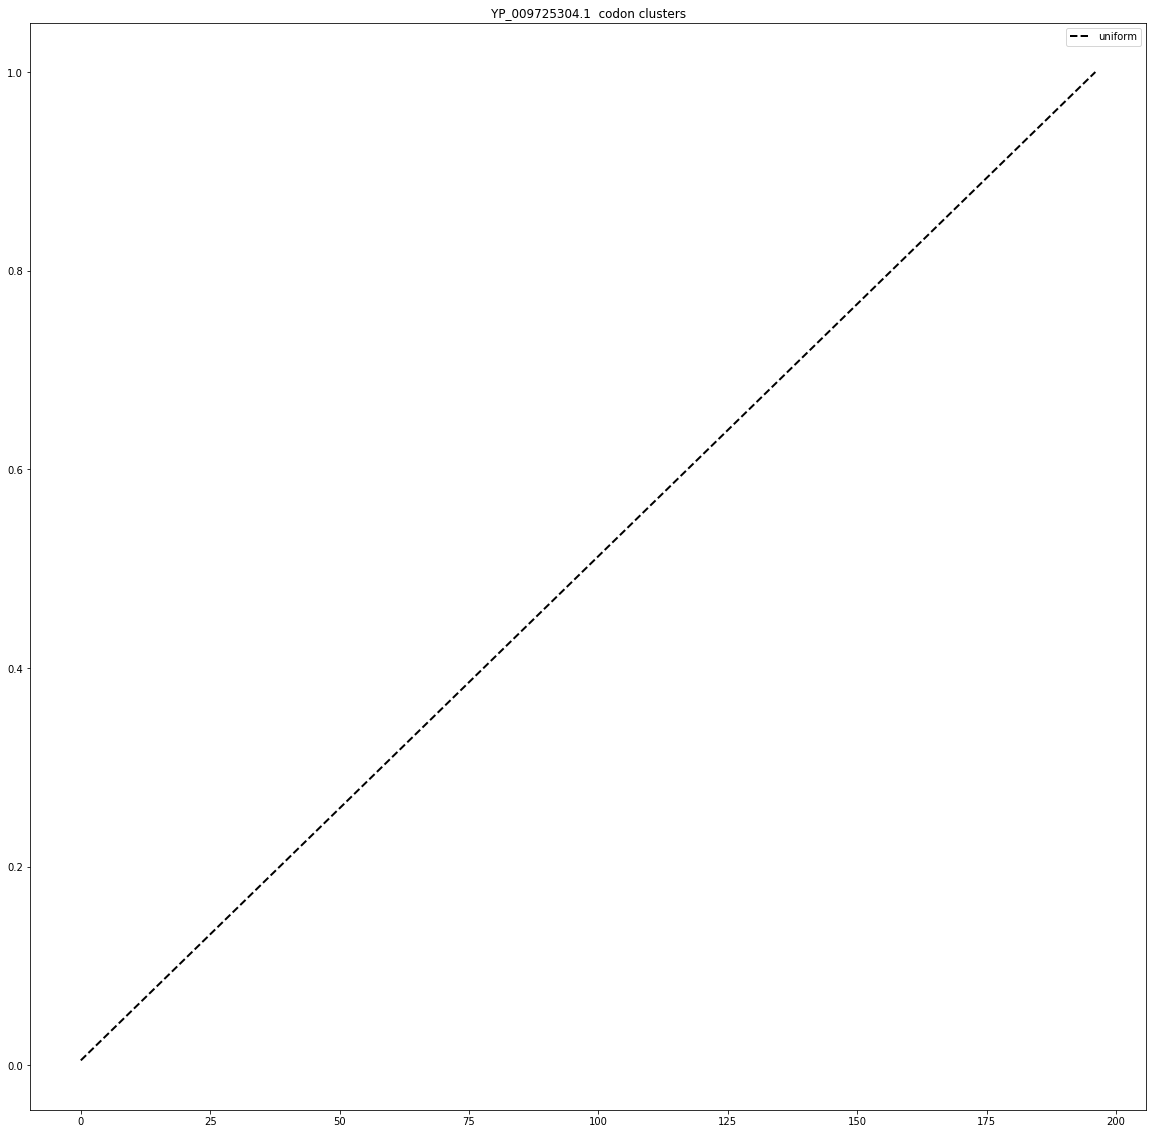

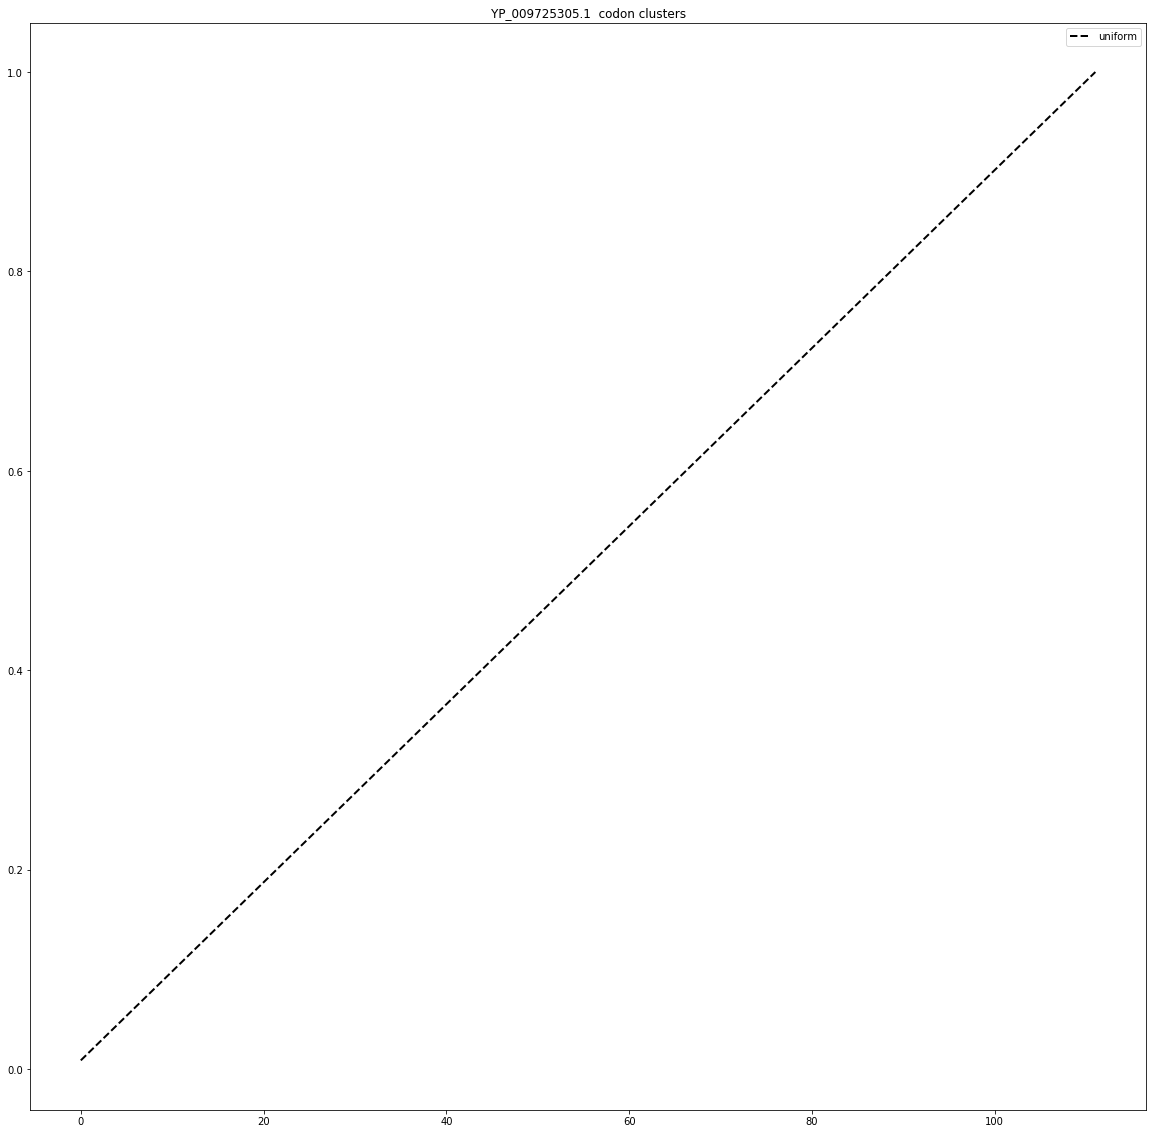

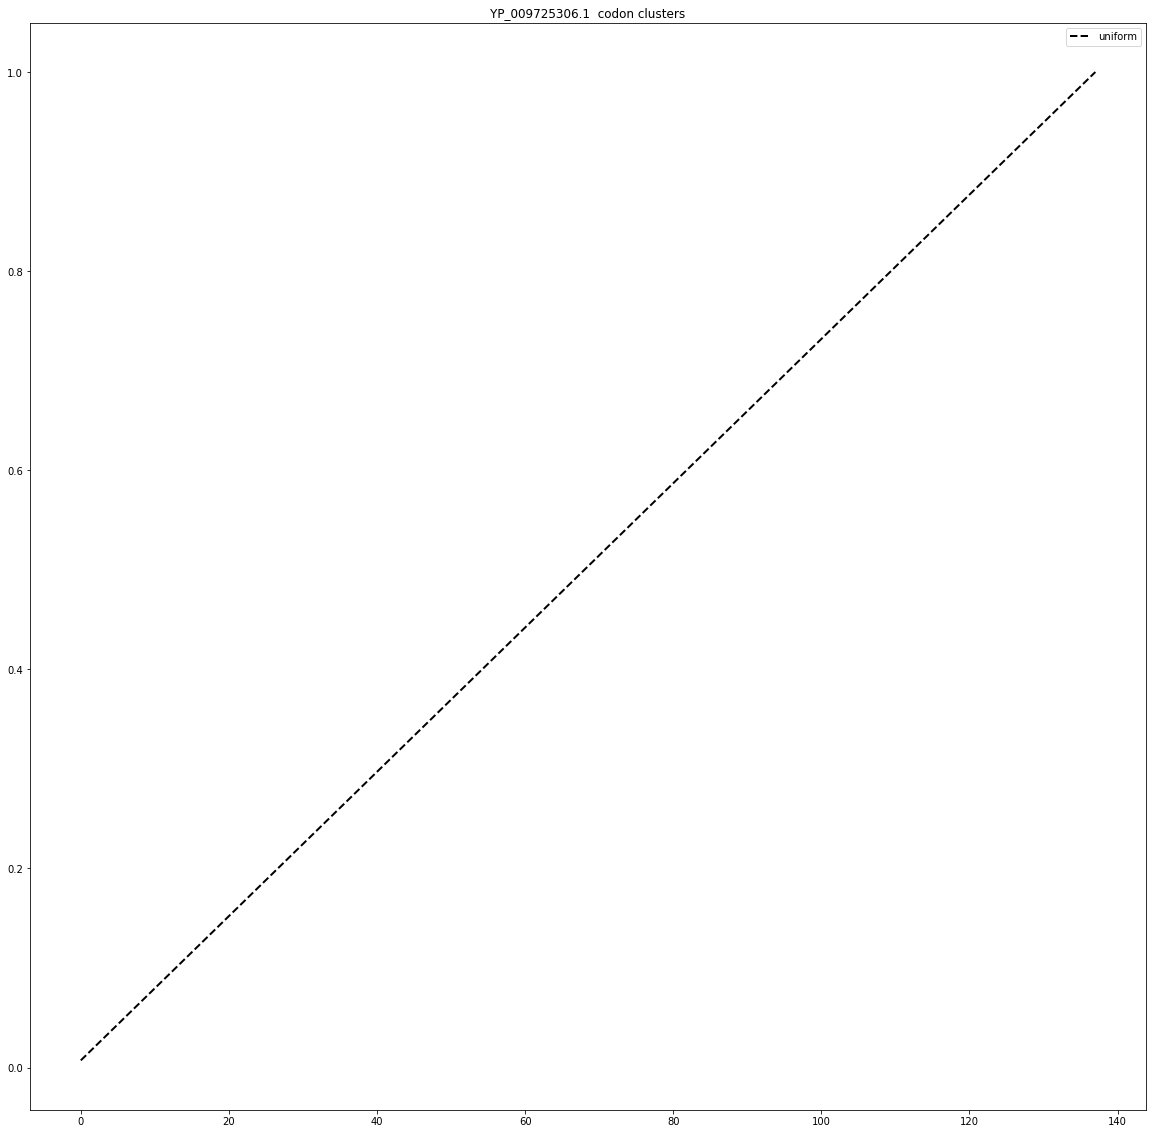

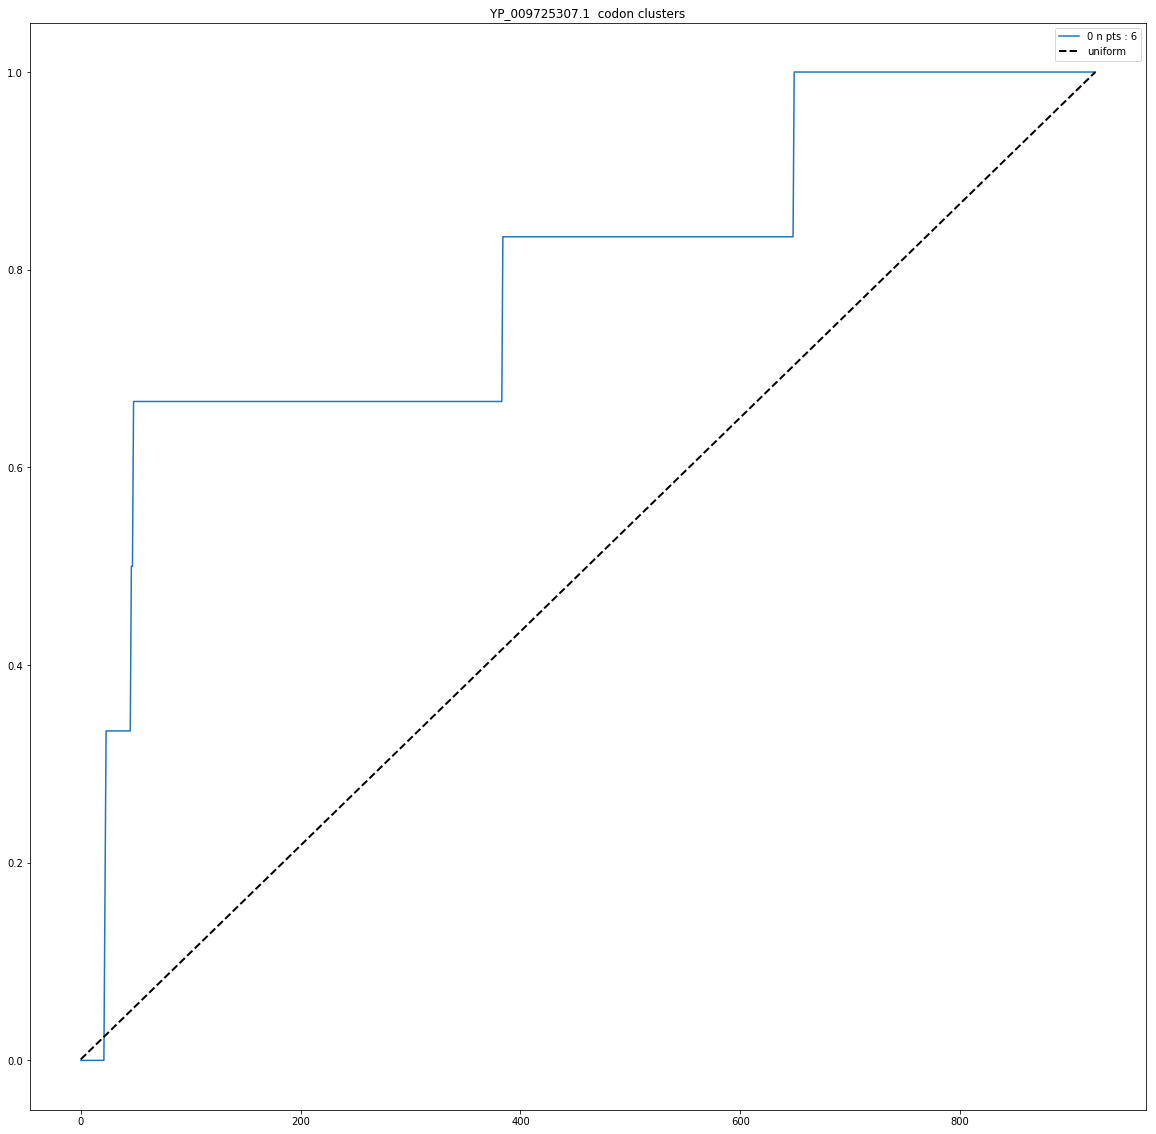

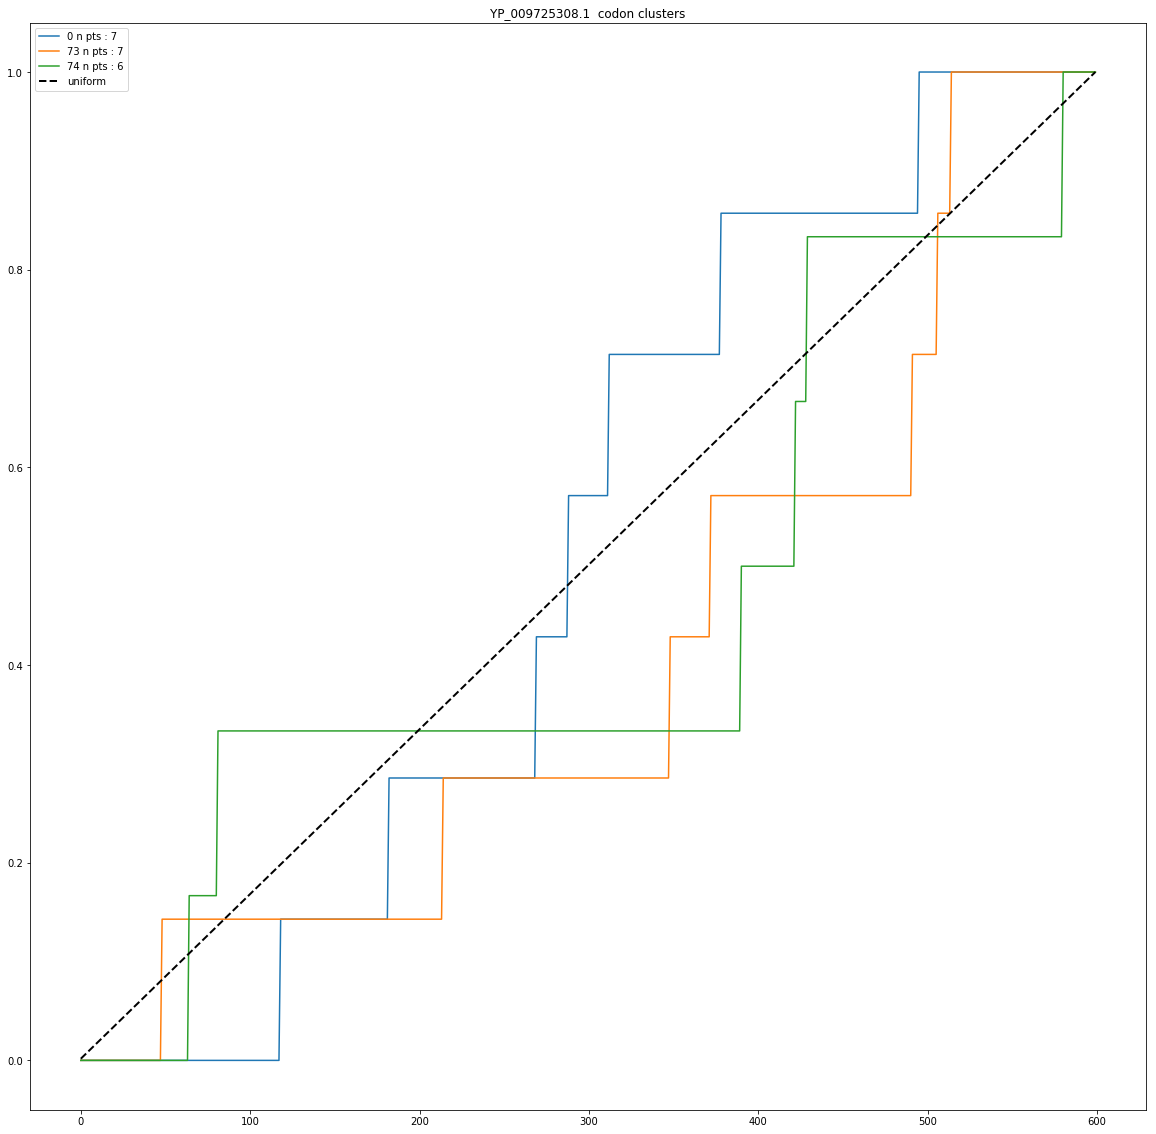

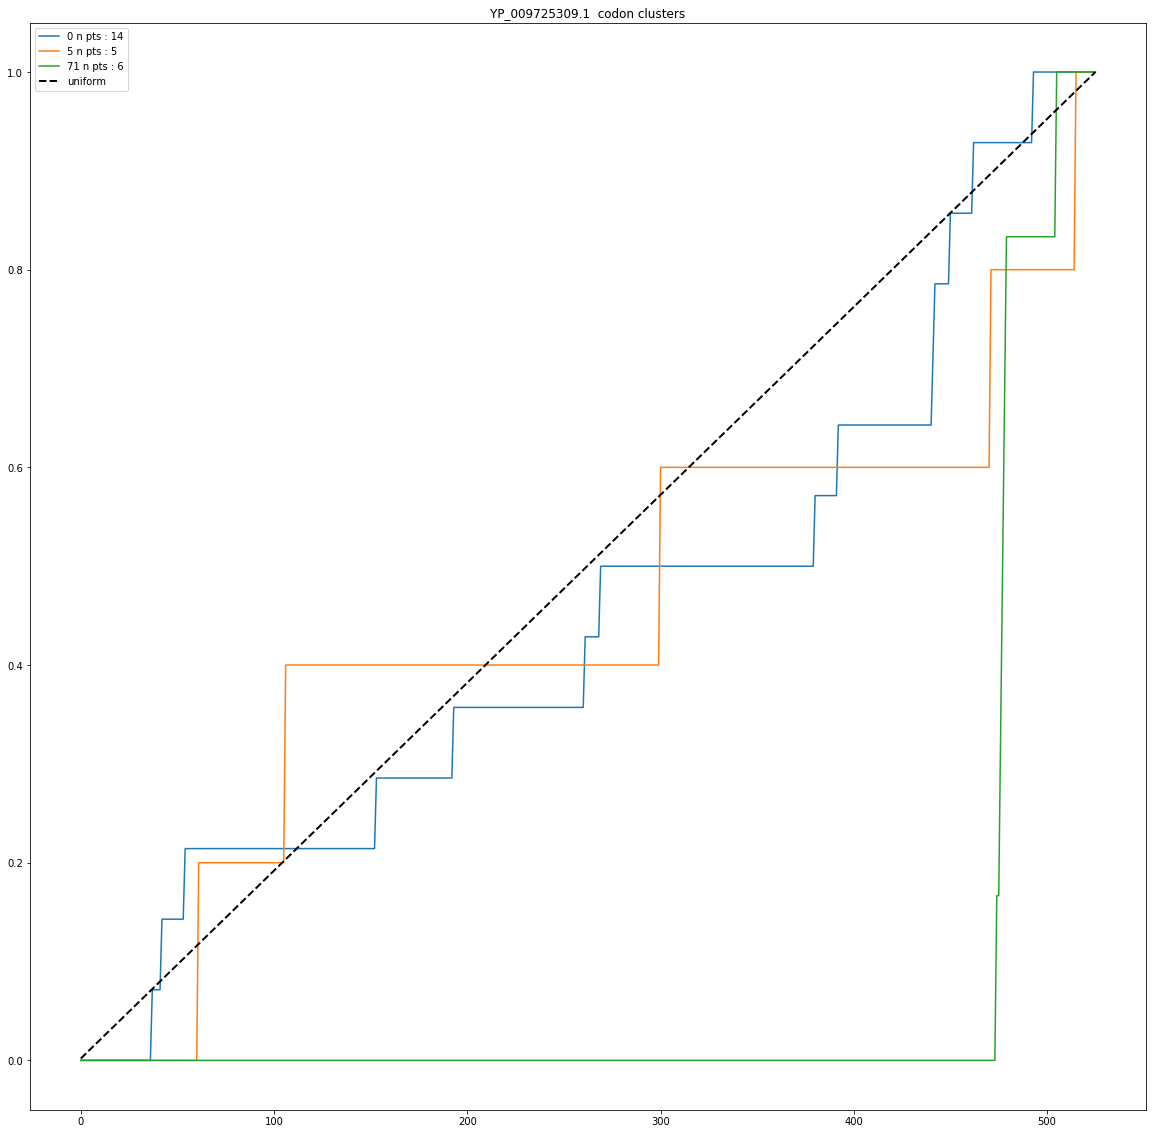

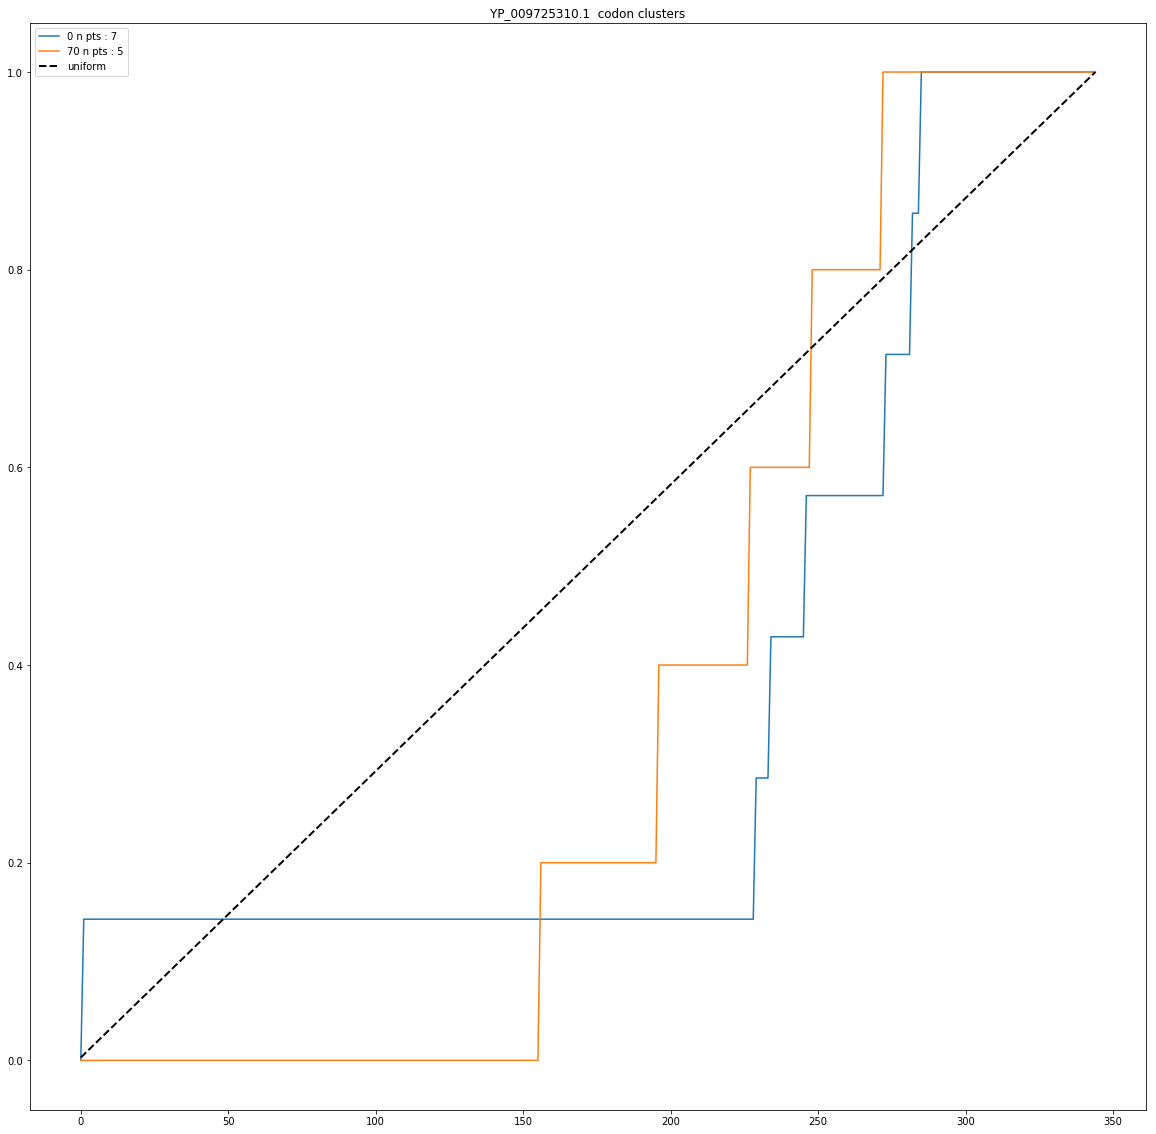

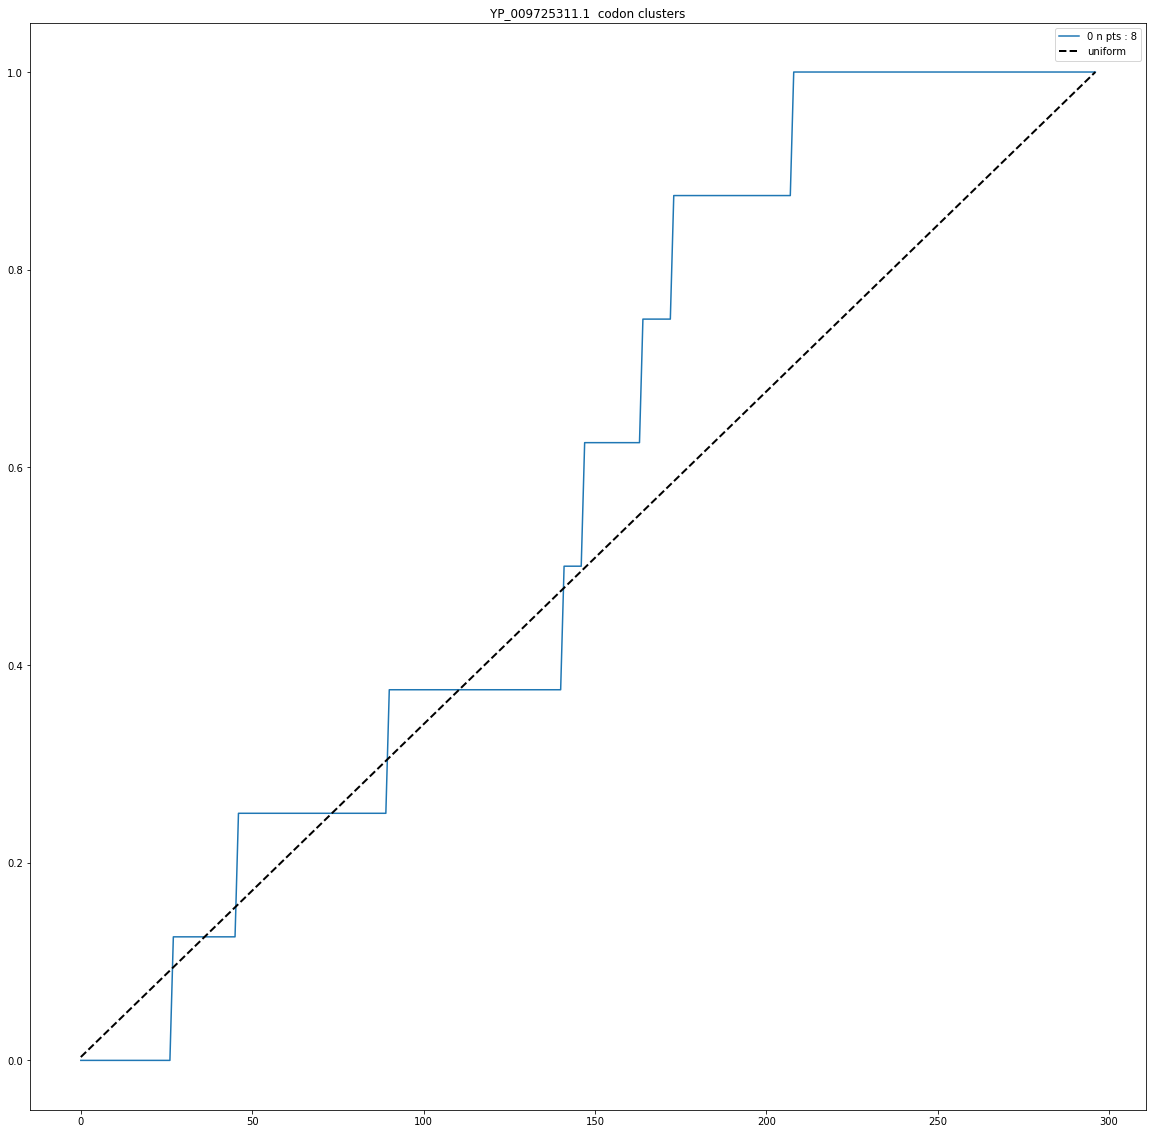

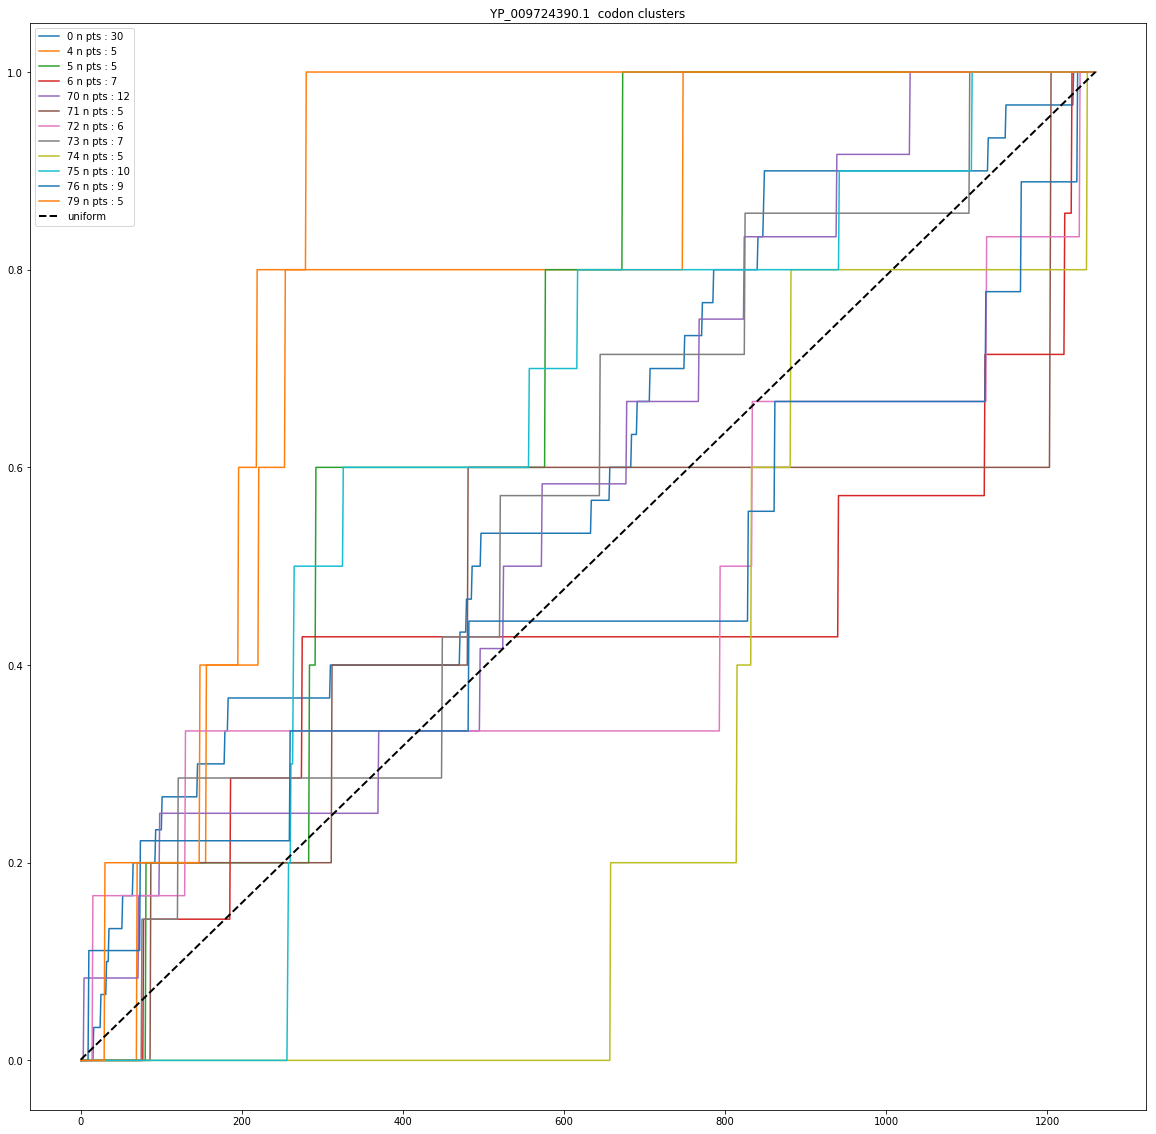

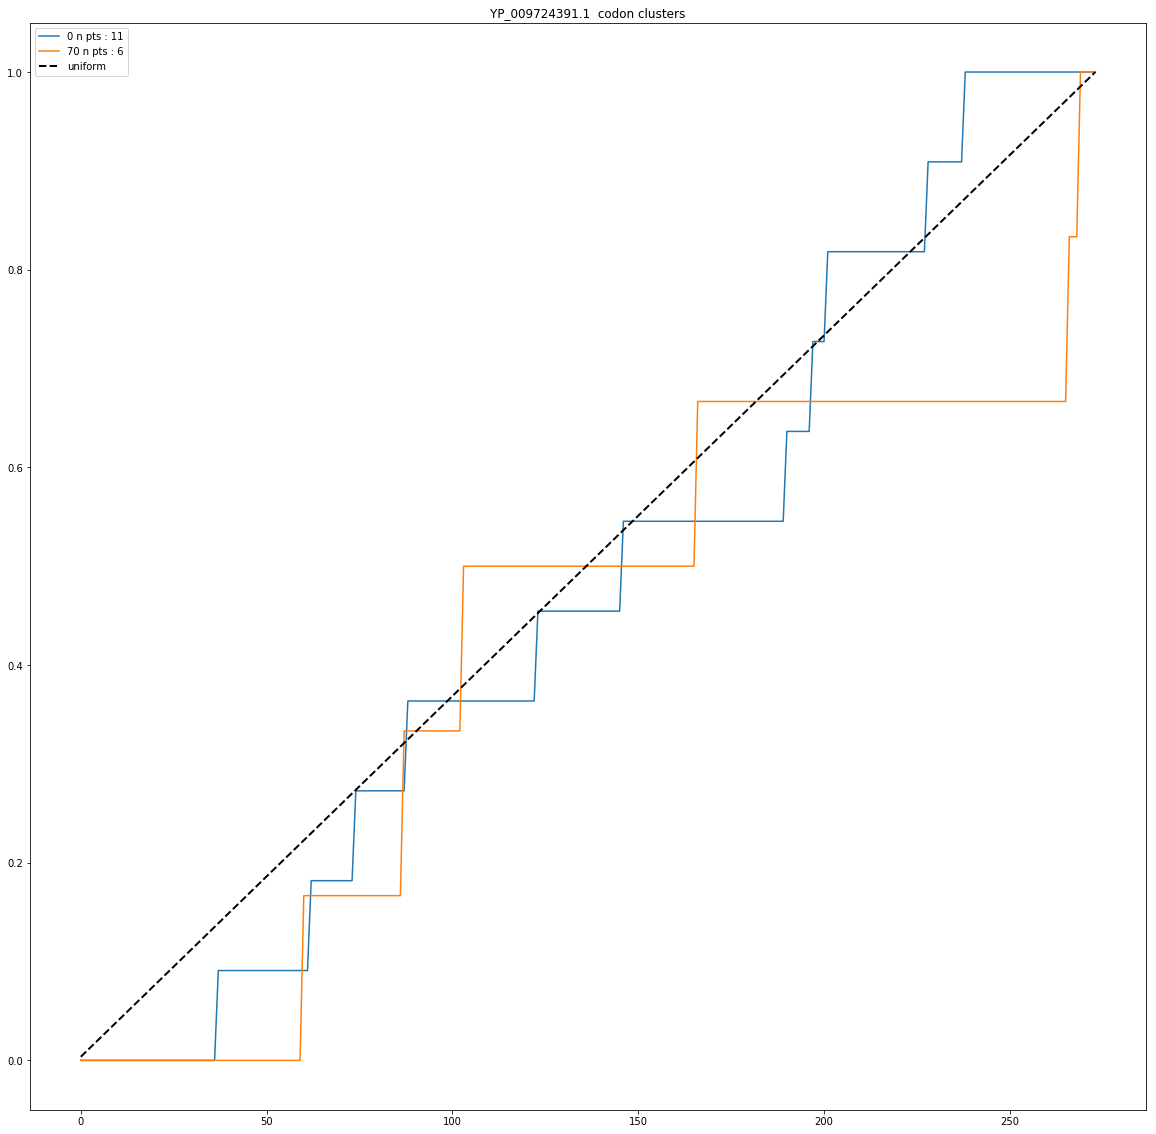

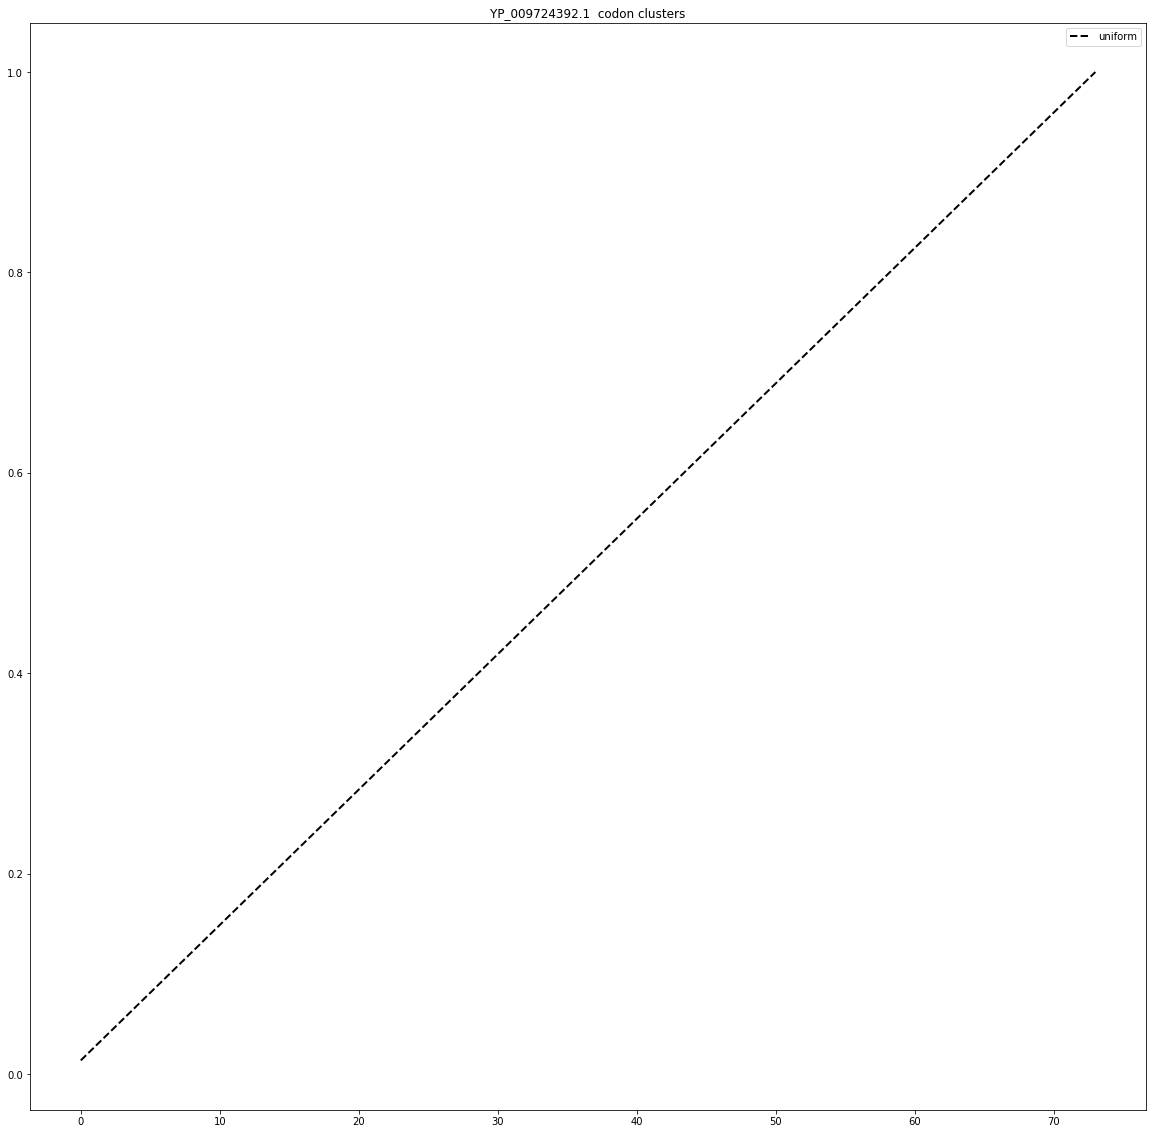

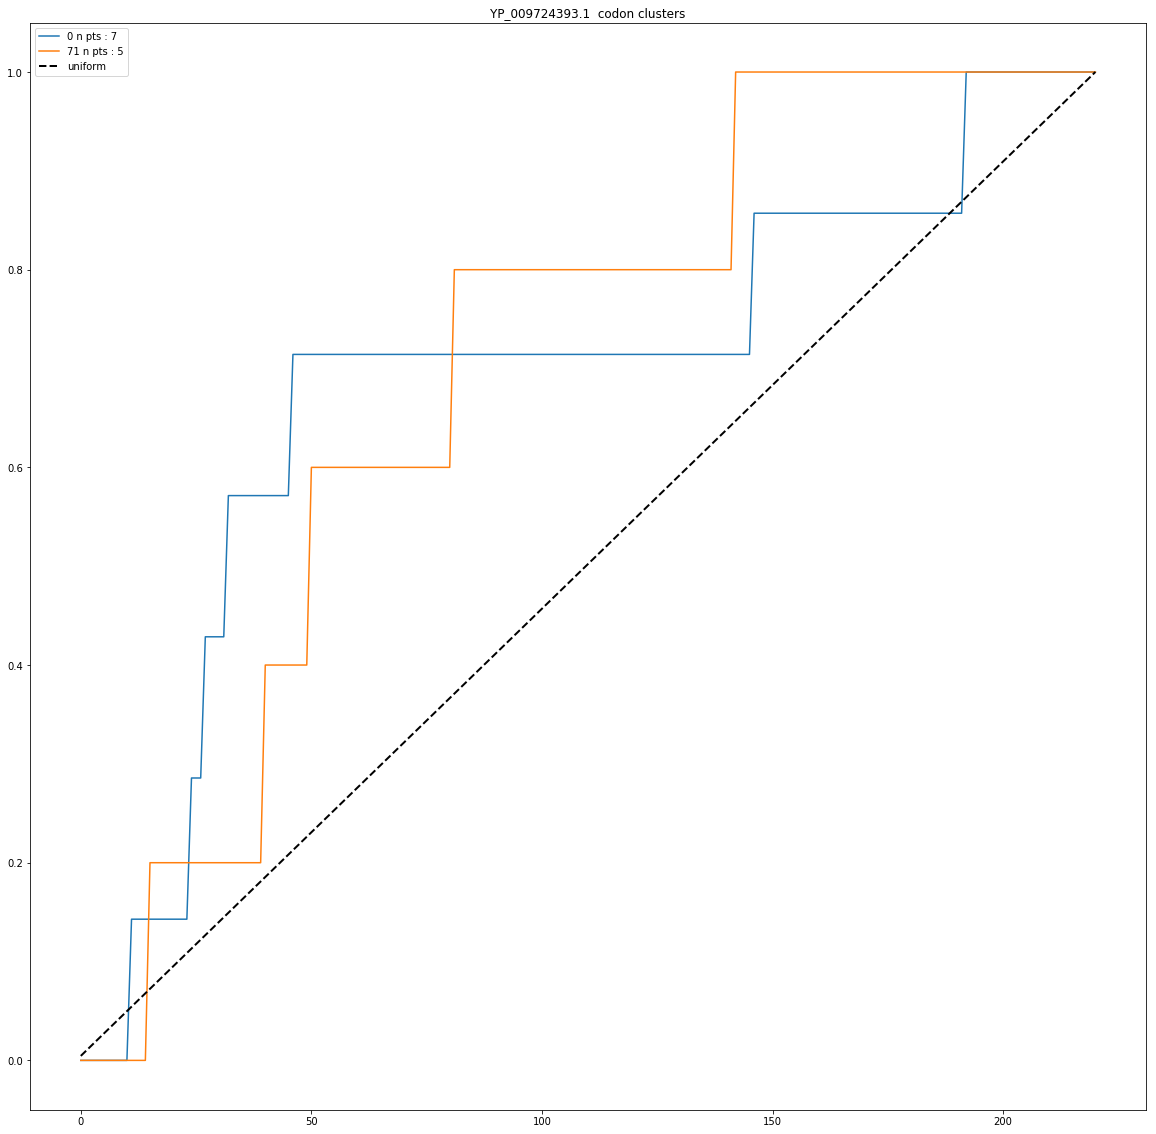

0
(array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True]), array([2.35634820e-10, 7.99825678e-43, 7.29200426e-68, 1.01846378e-19,
       0.00000000e+00, 1.31293657e-26, 2.91433274e-22, 1.51034600e-86,
       4.55093803e-23, 2.28985226e-56, 1.27170390e-04, 6.84425222e-52]), 0.004265318777560645, 0.004166666666666667)
3
(array([ True,  True]), array([2.96461368e-47, 1.01520052e-86]), 0.025320565519103666, 0.025)
10
(array([ True,  True]), array([8.16587081e-196, 7.68569485e-117]), 0.025320565519103666, 0.025)
70
(array([ True,  True,  True,  True,  True]), array([2.36299231e-109, 4.50336386e-213, 3.13502833e-064, 8.28545364e-037,
       2.74006640e-022]), 0.010206218313011495, 0.01)
72
(array([ True,  True,  True]), array([5.79965785e-86, 2.02715777e-92, 3.64050791e-98]), 0.016952427508441503, 0.016666666666666666)
73
(array([ True,  True,  True,  True]), array([1.93366693e-053, 1.23369132e-109, 6.13482094e-046, 2.17979114e-045]), 0.01274145509

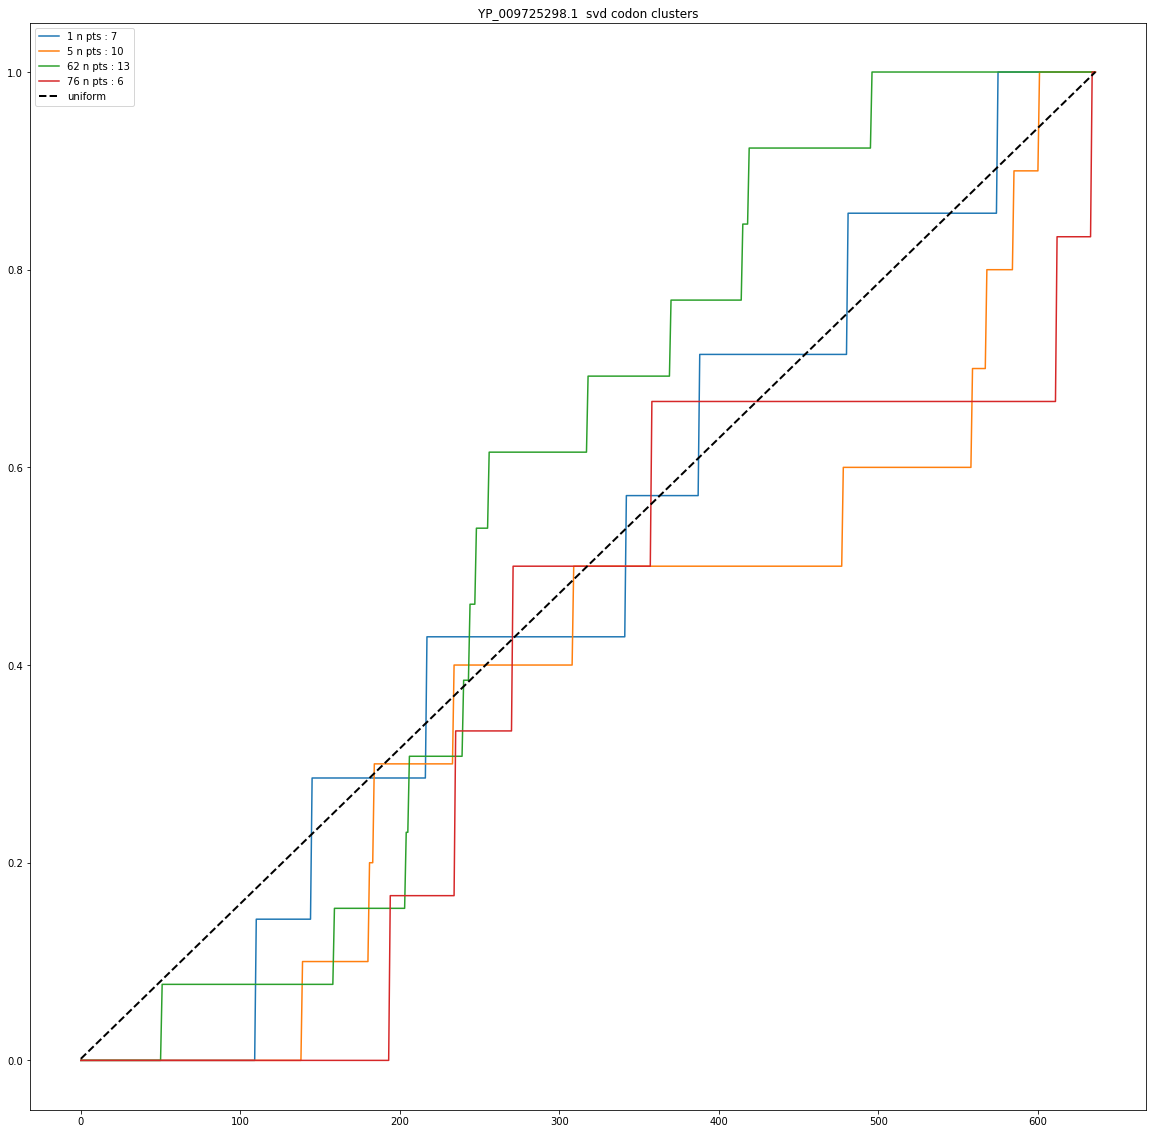

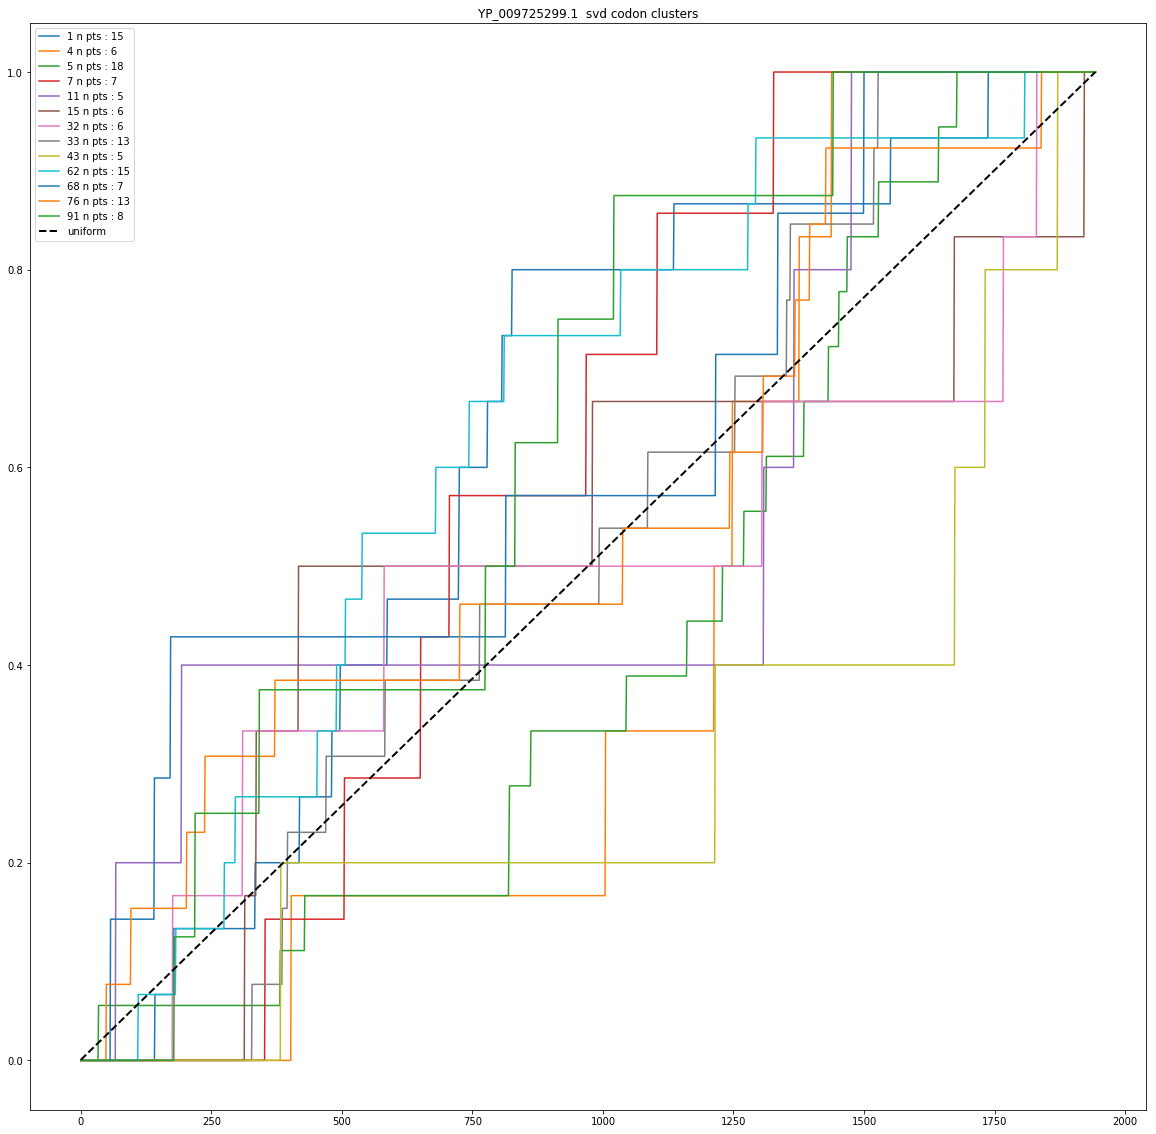

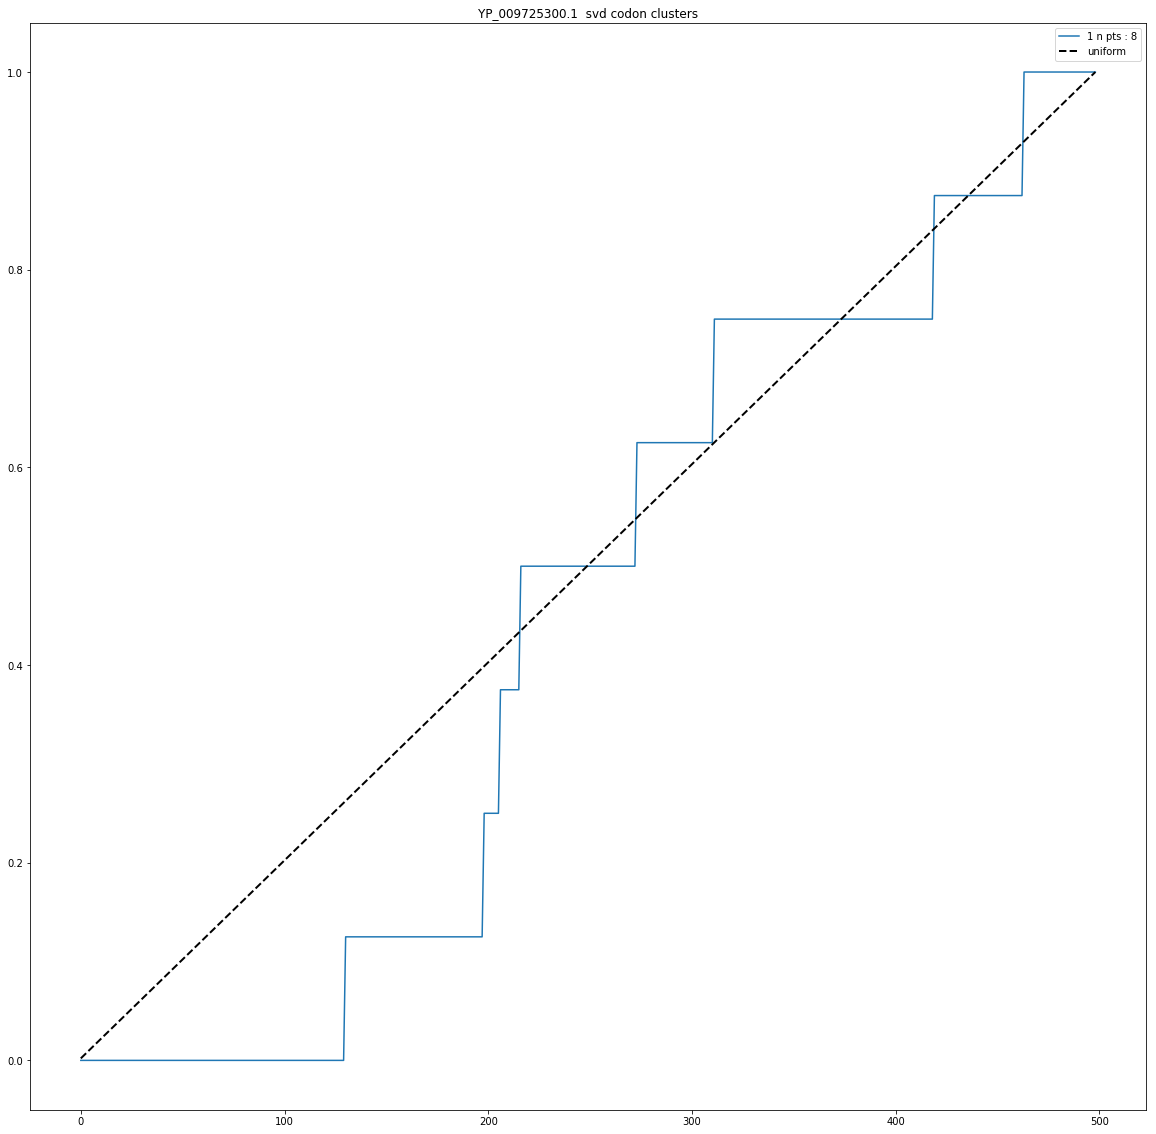

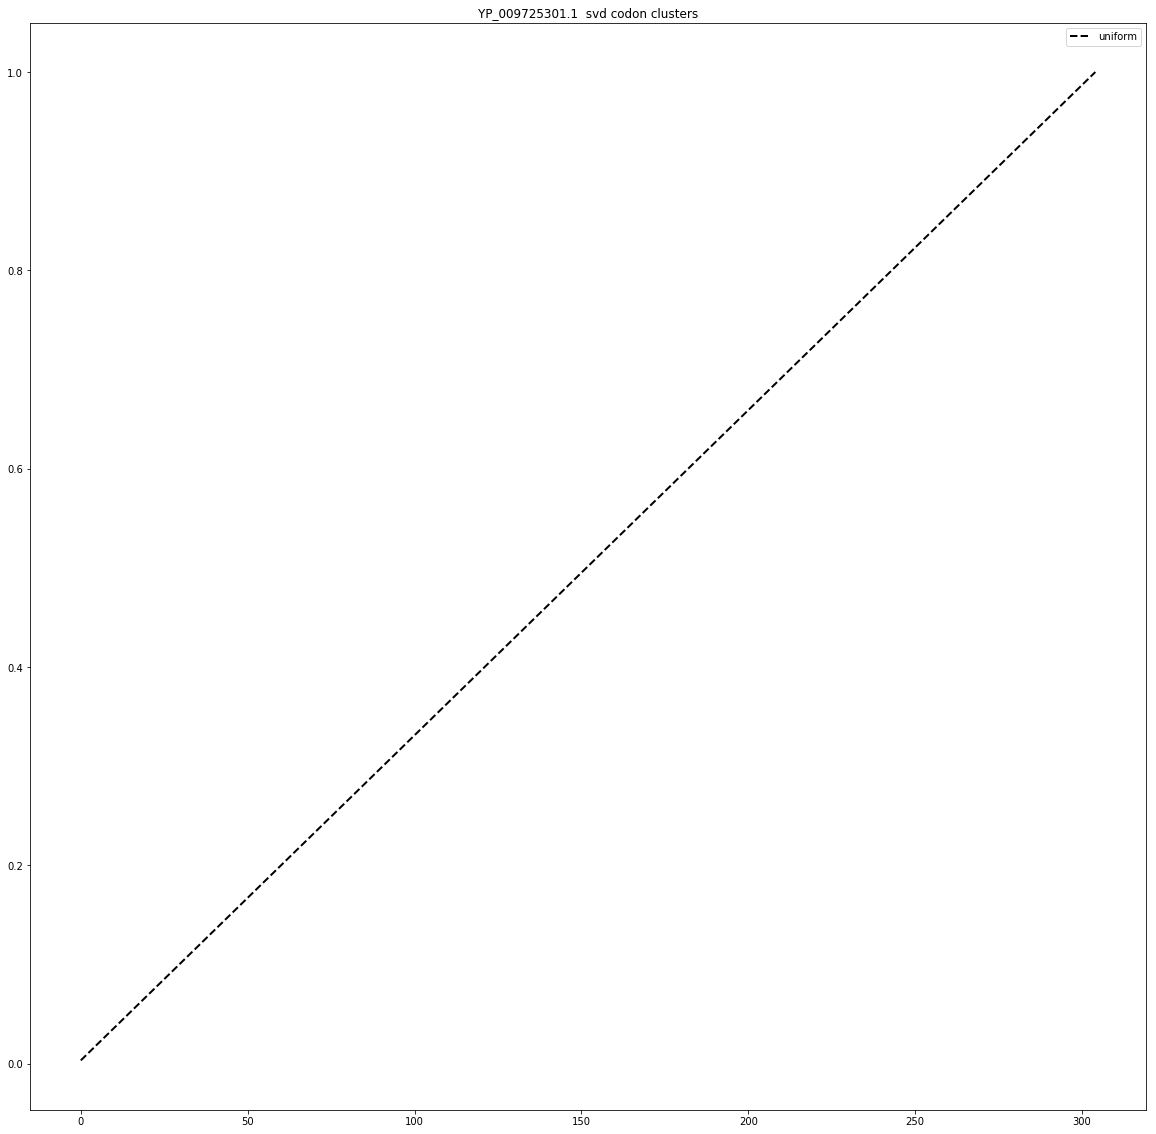

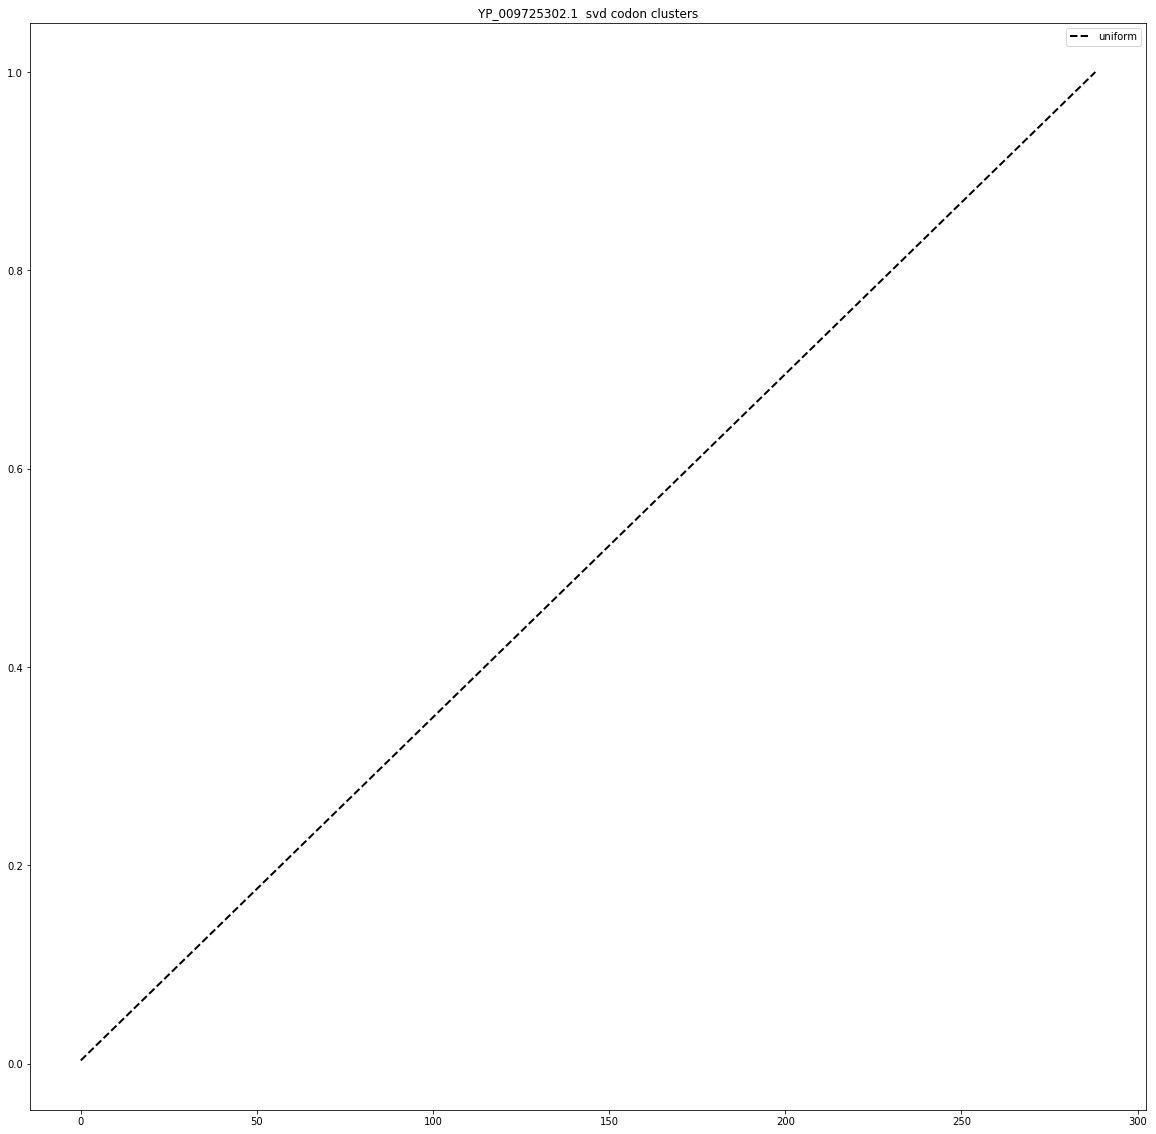

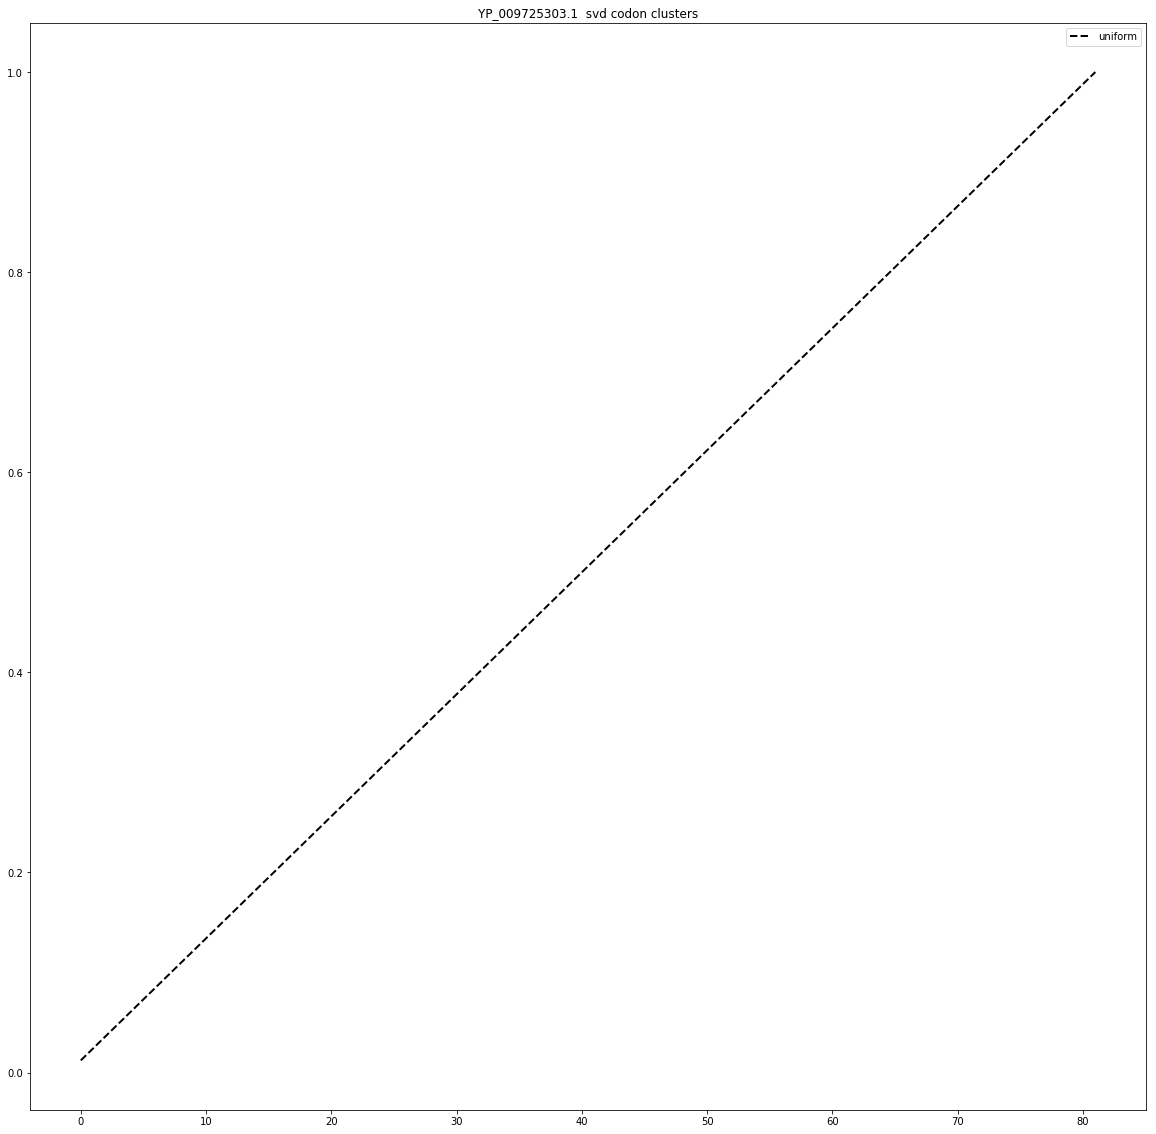

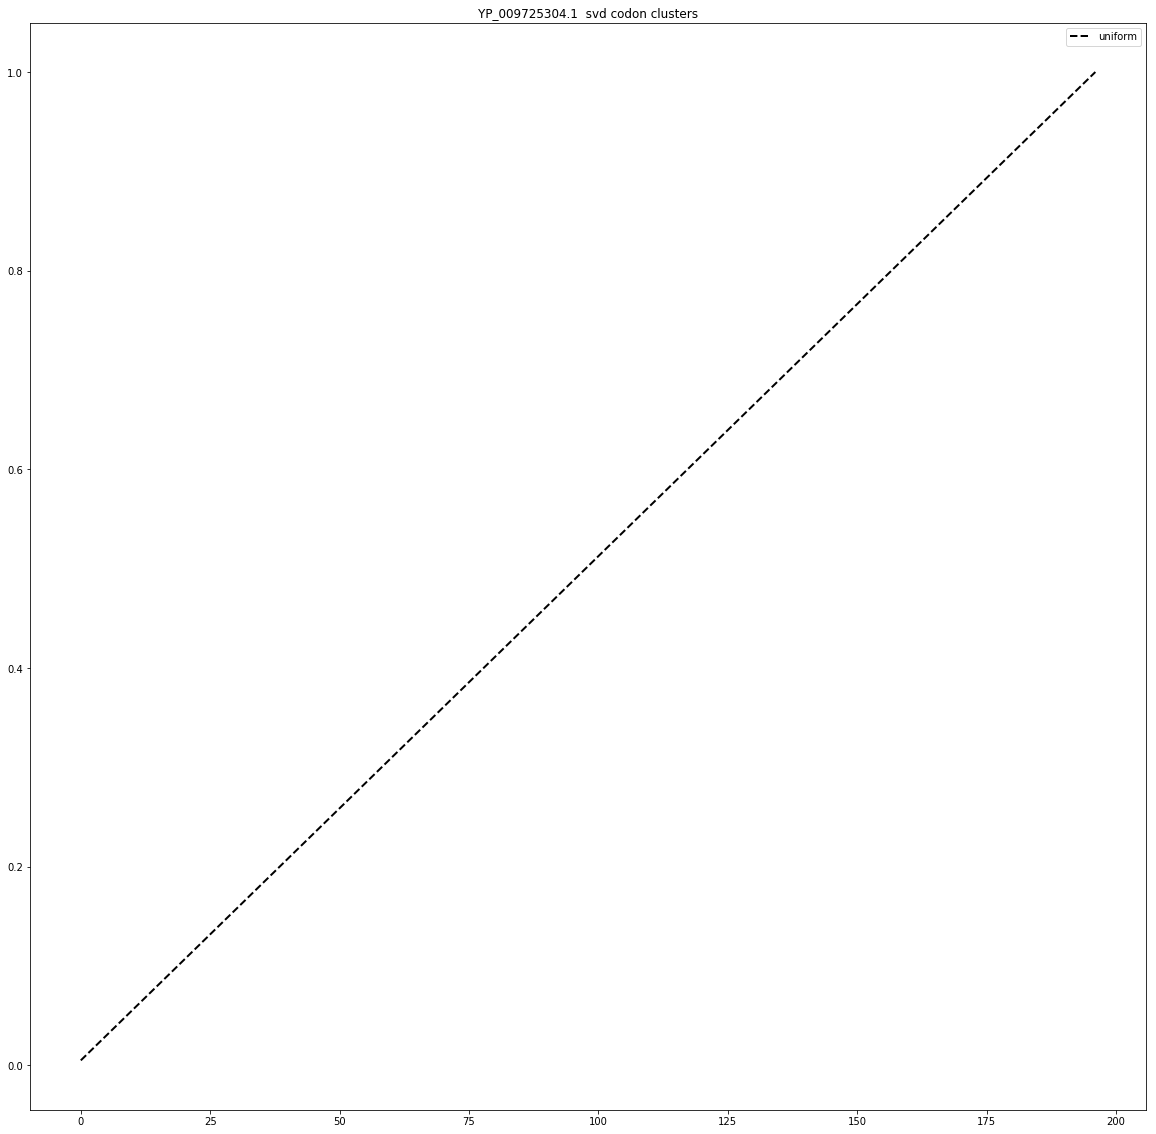

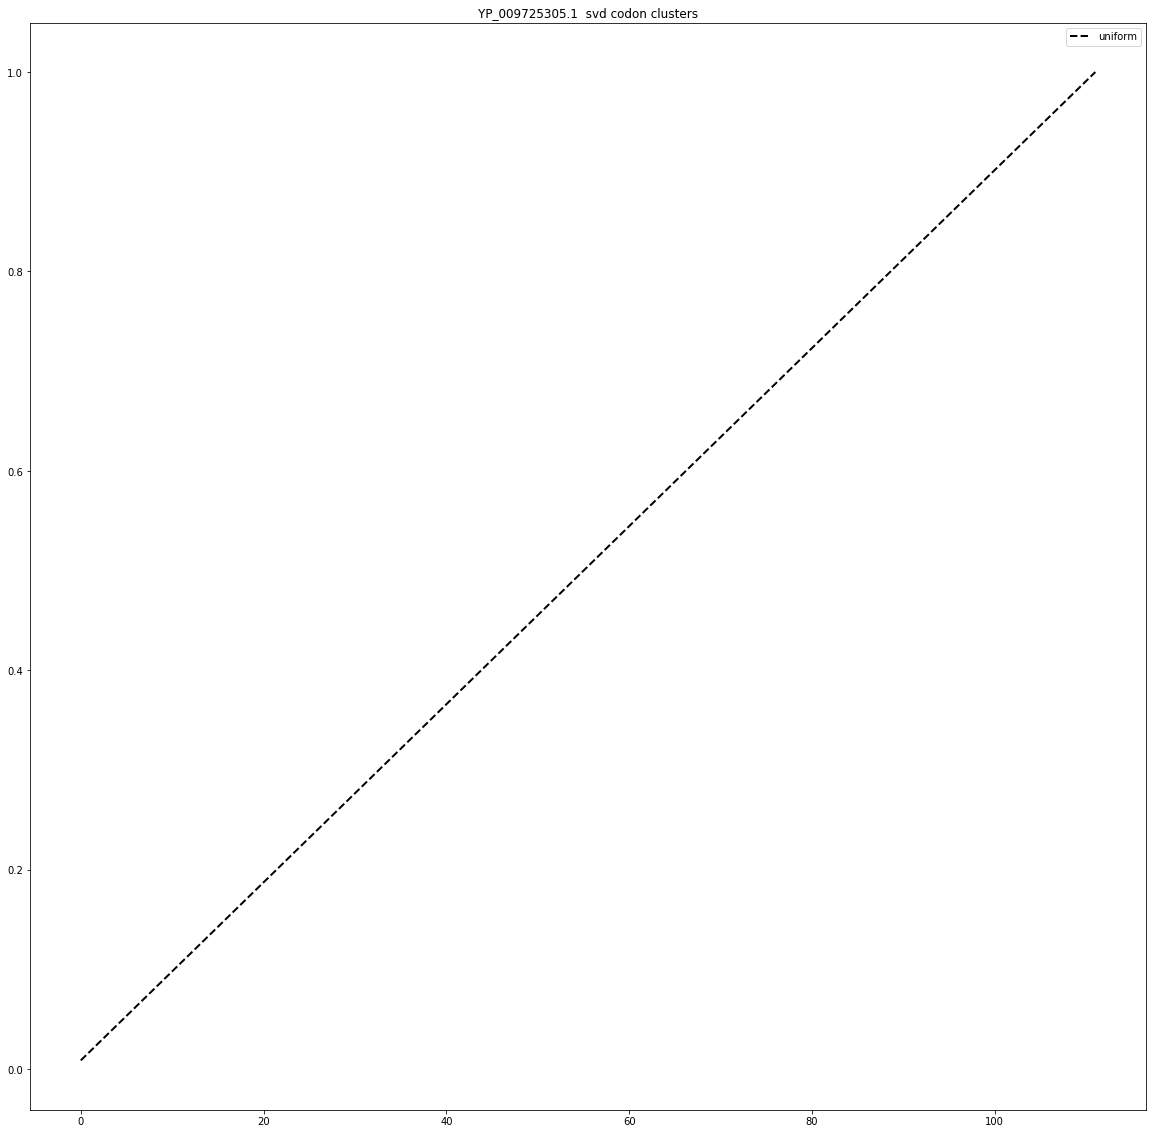

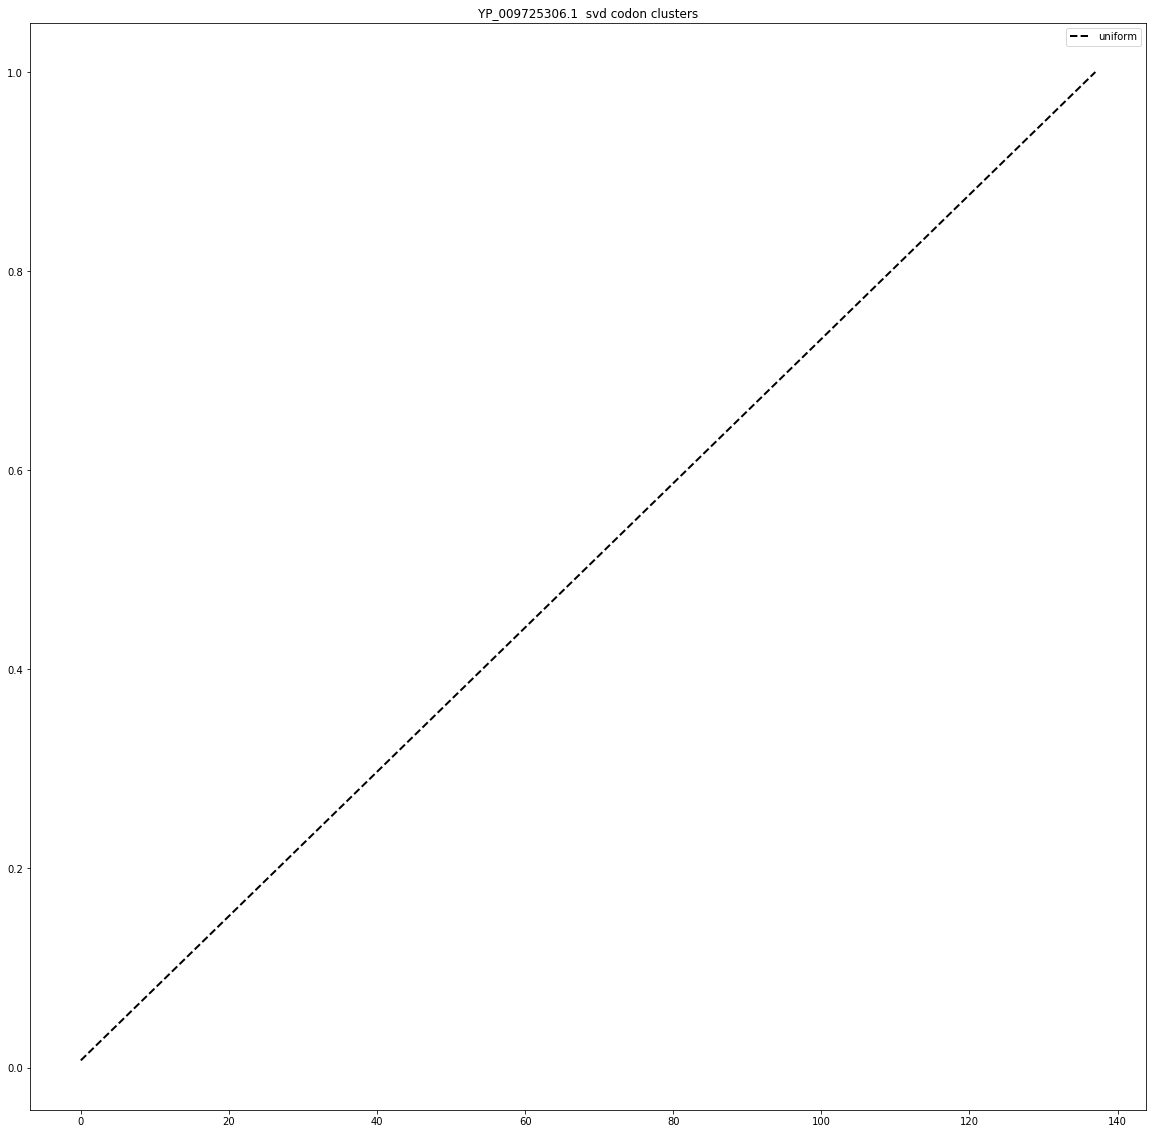

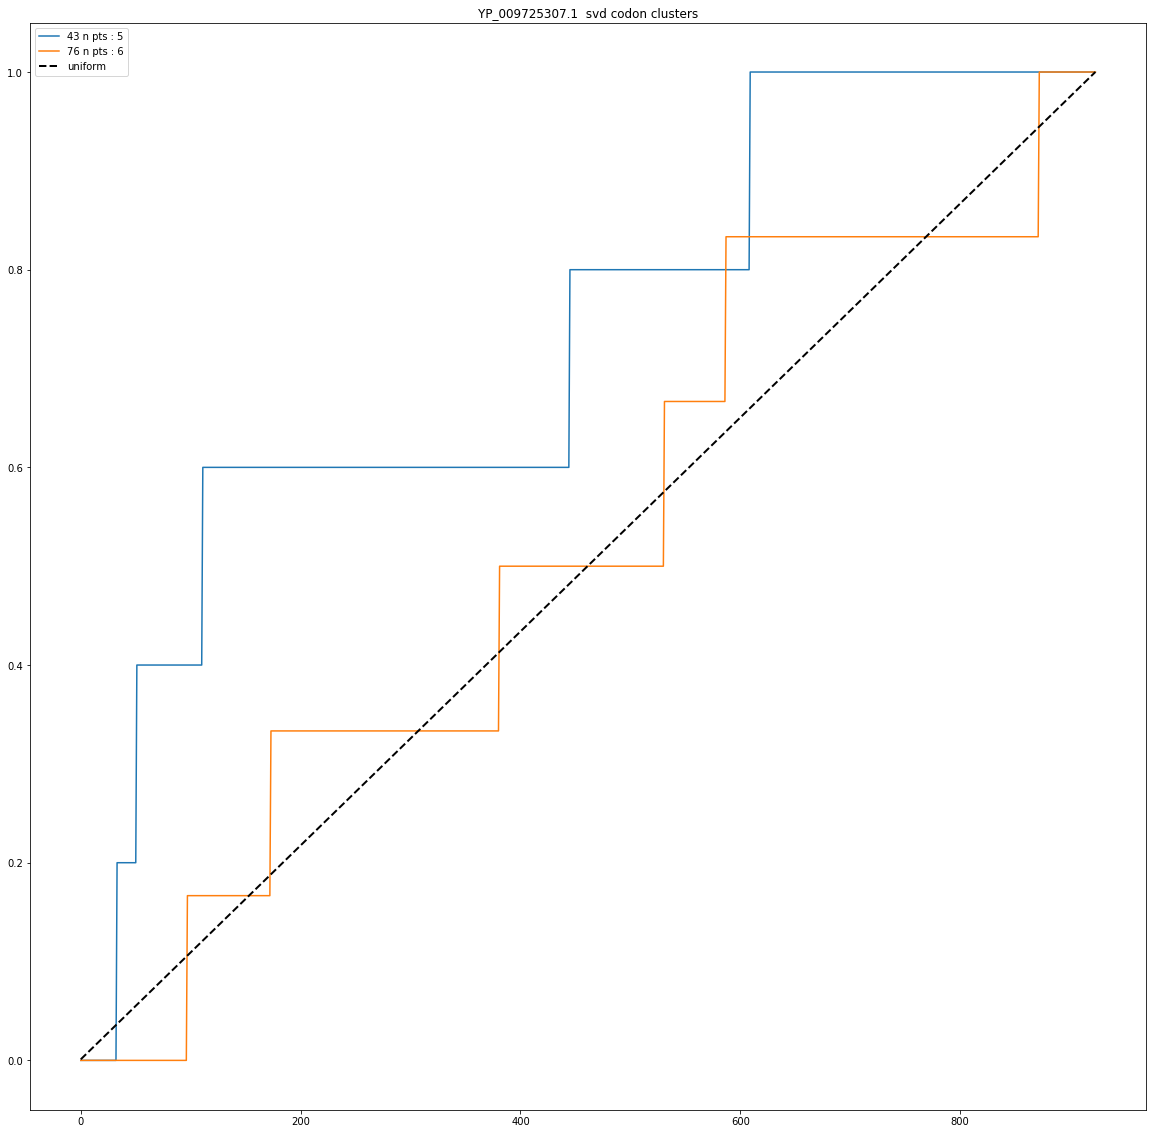

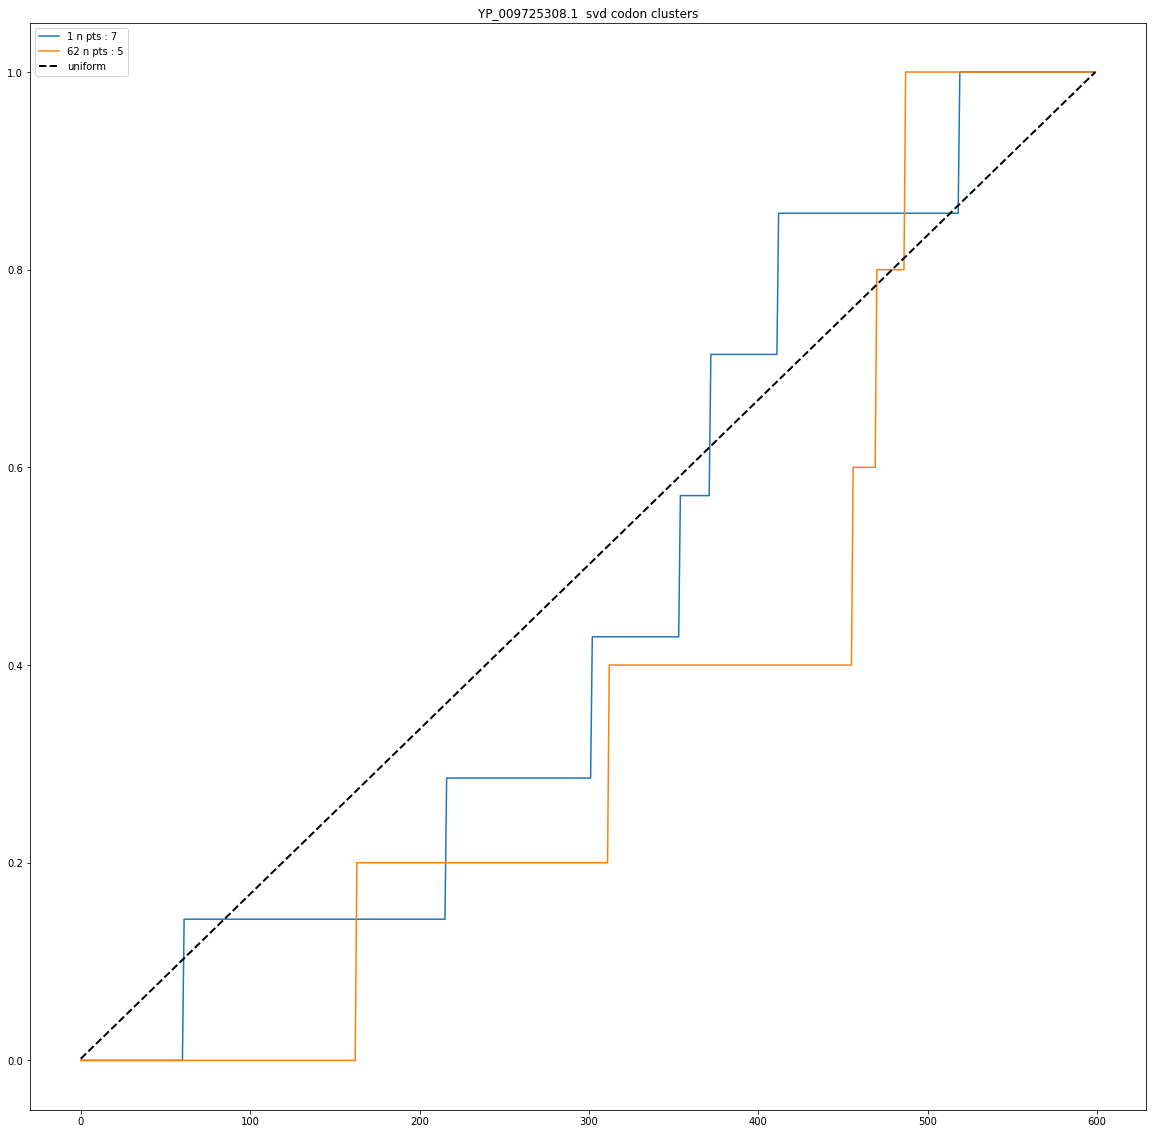

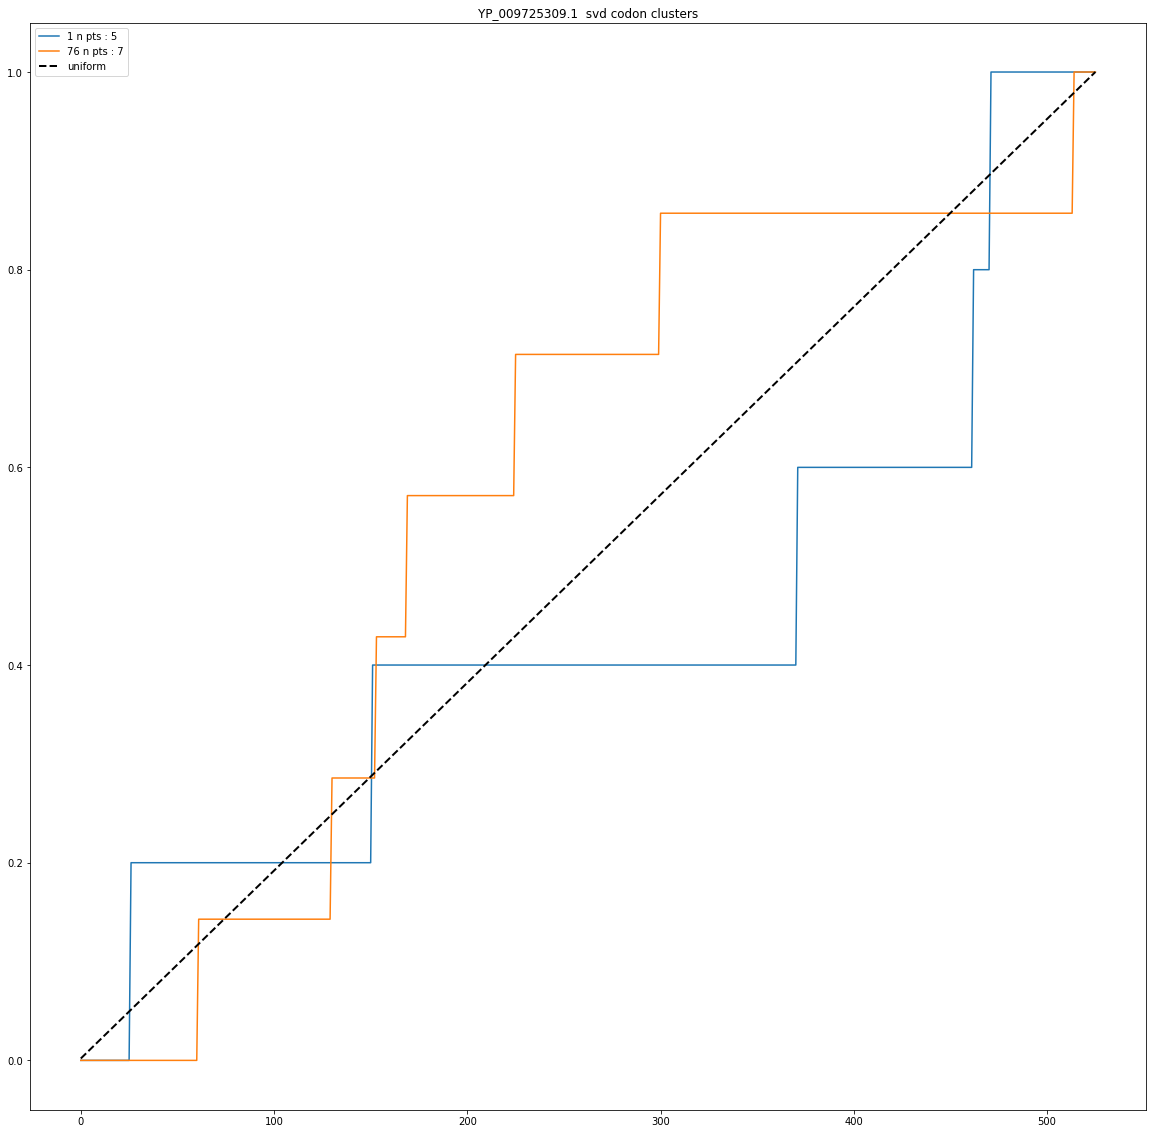

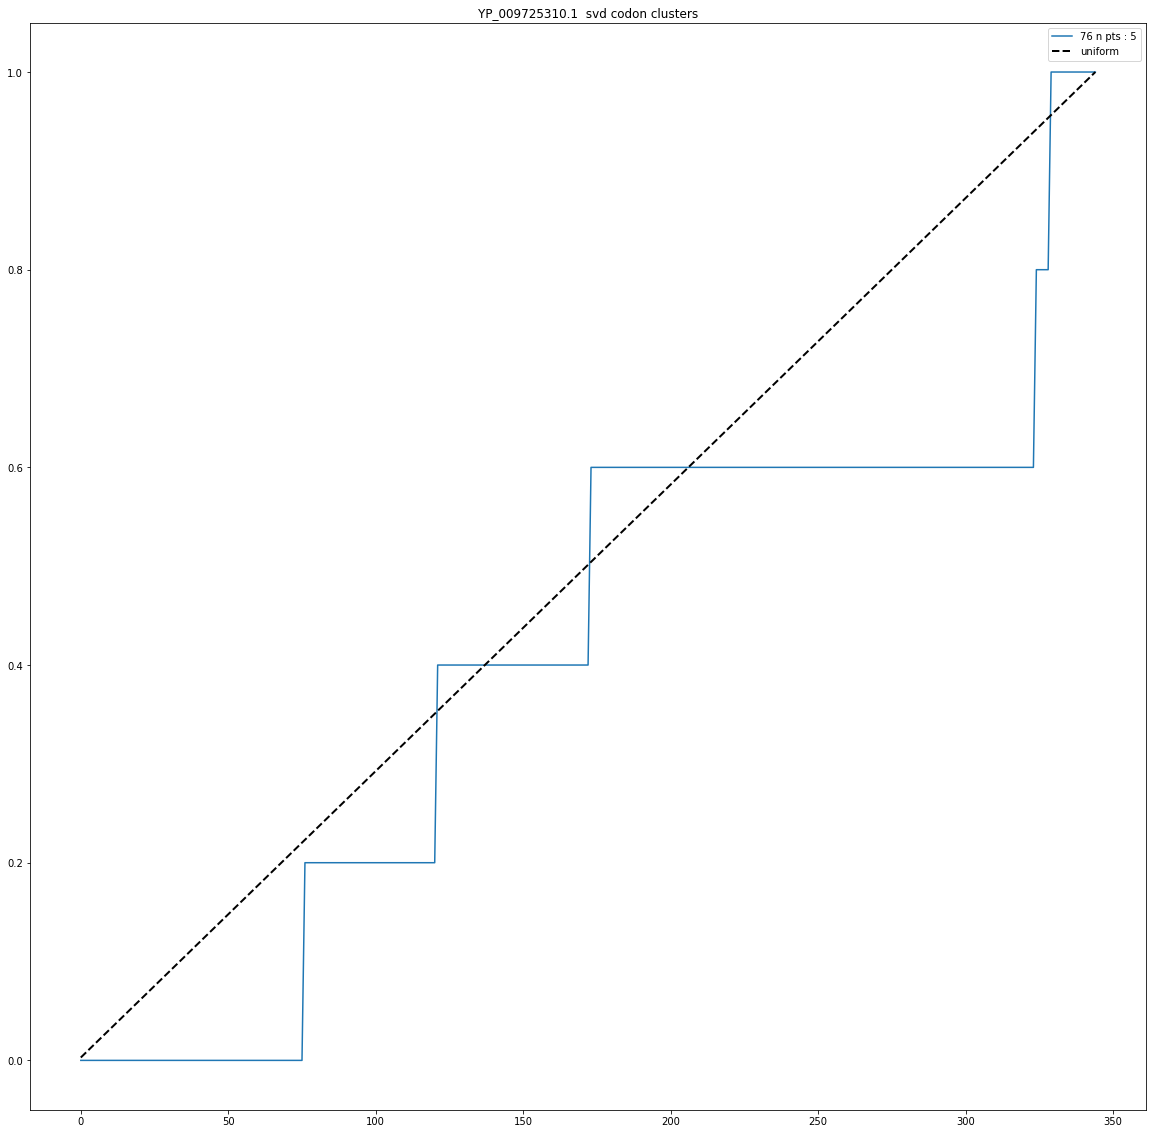

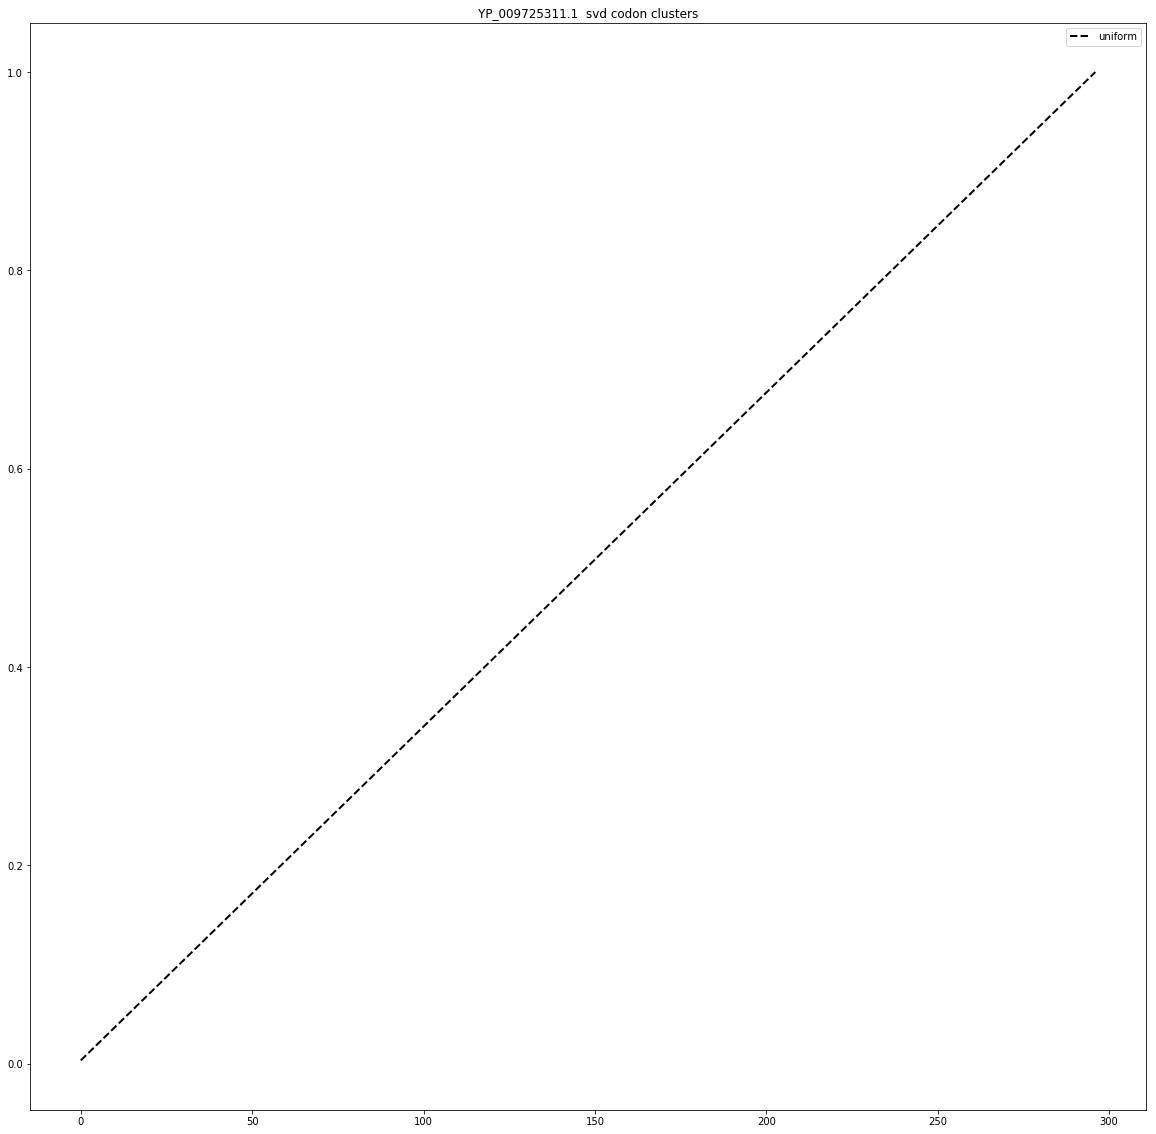

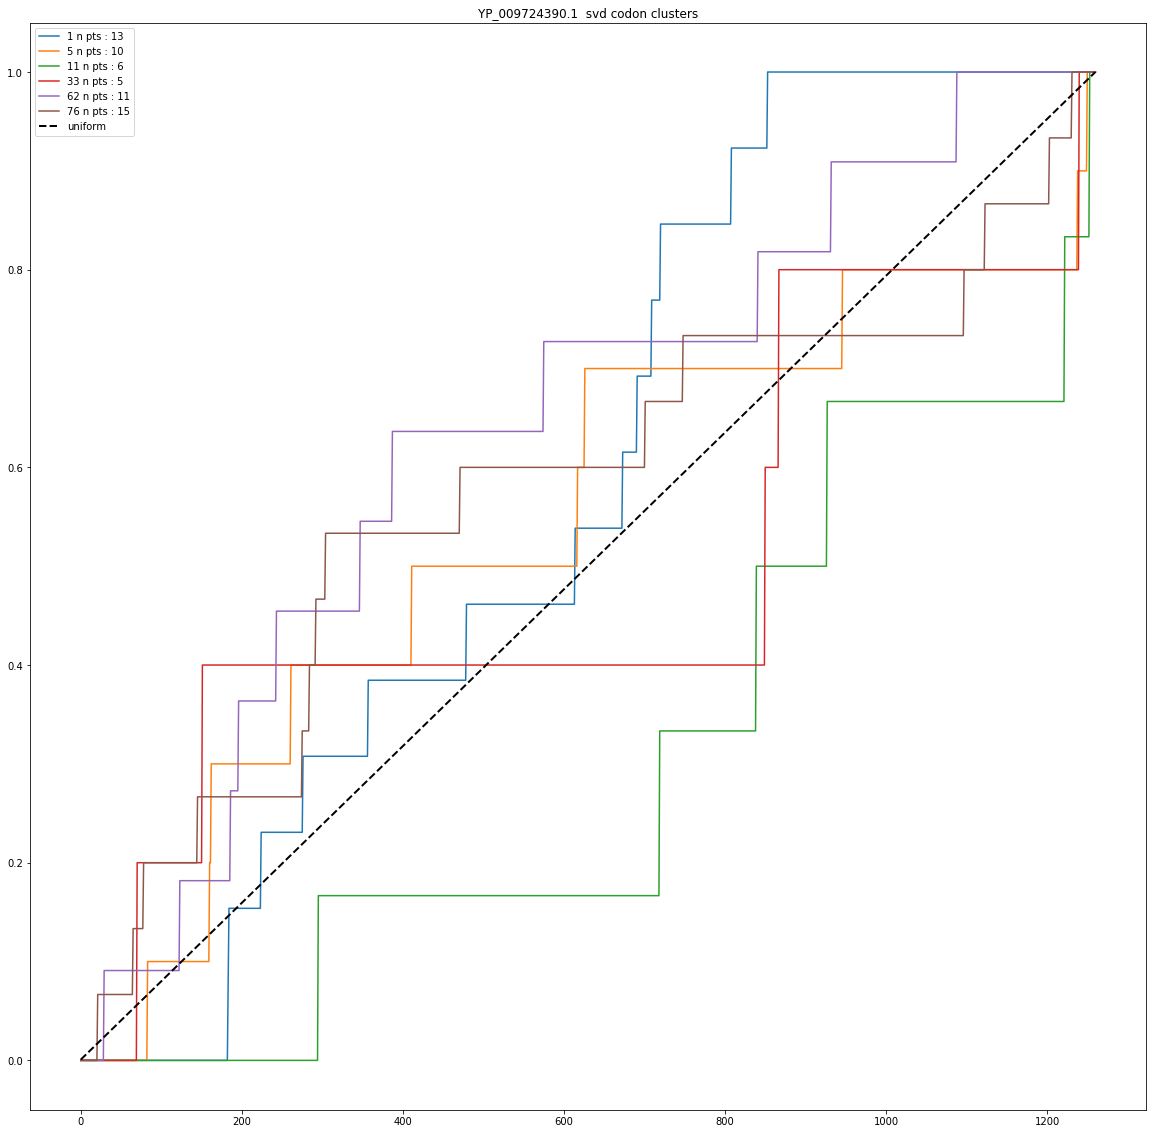

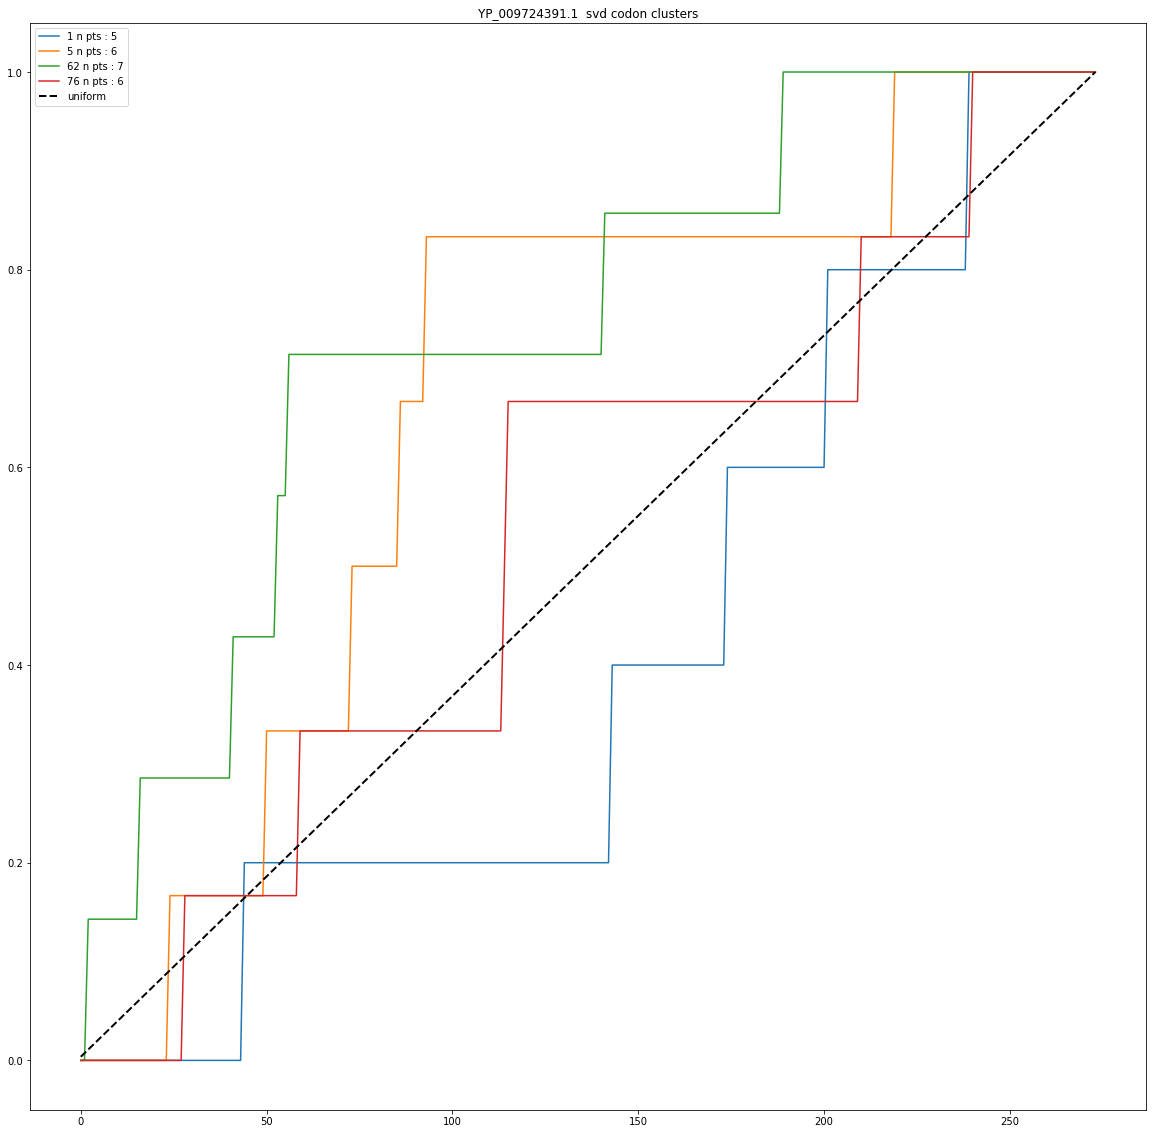

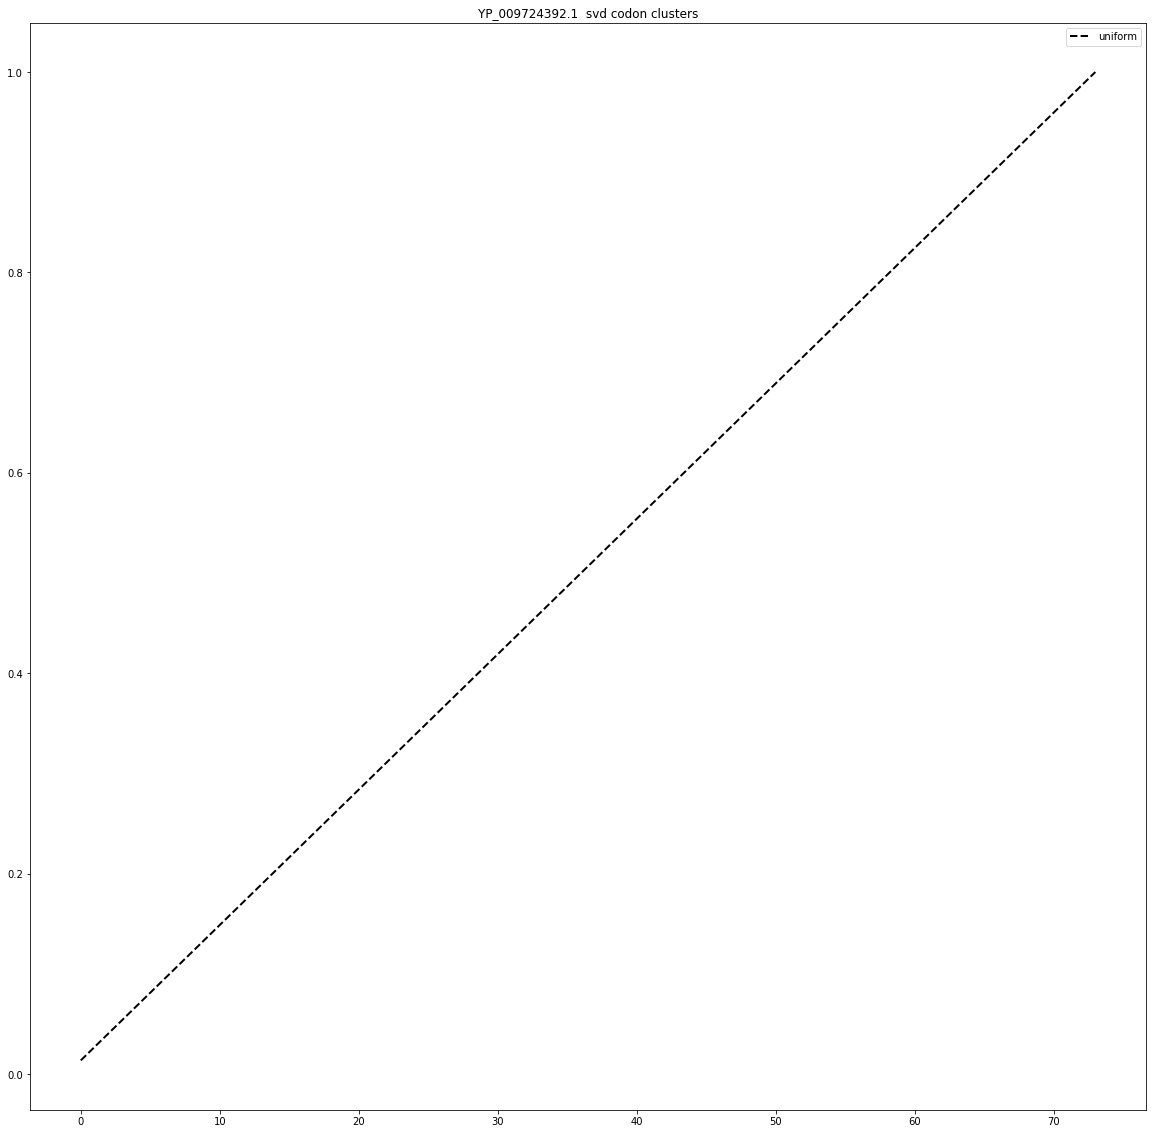

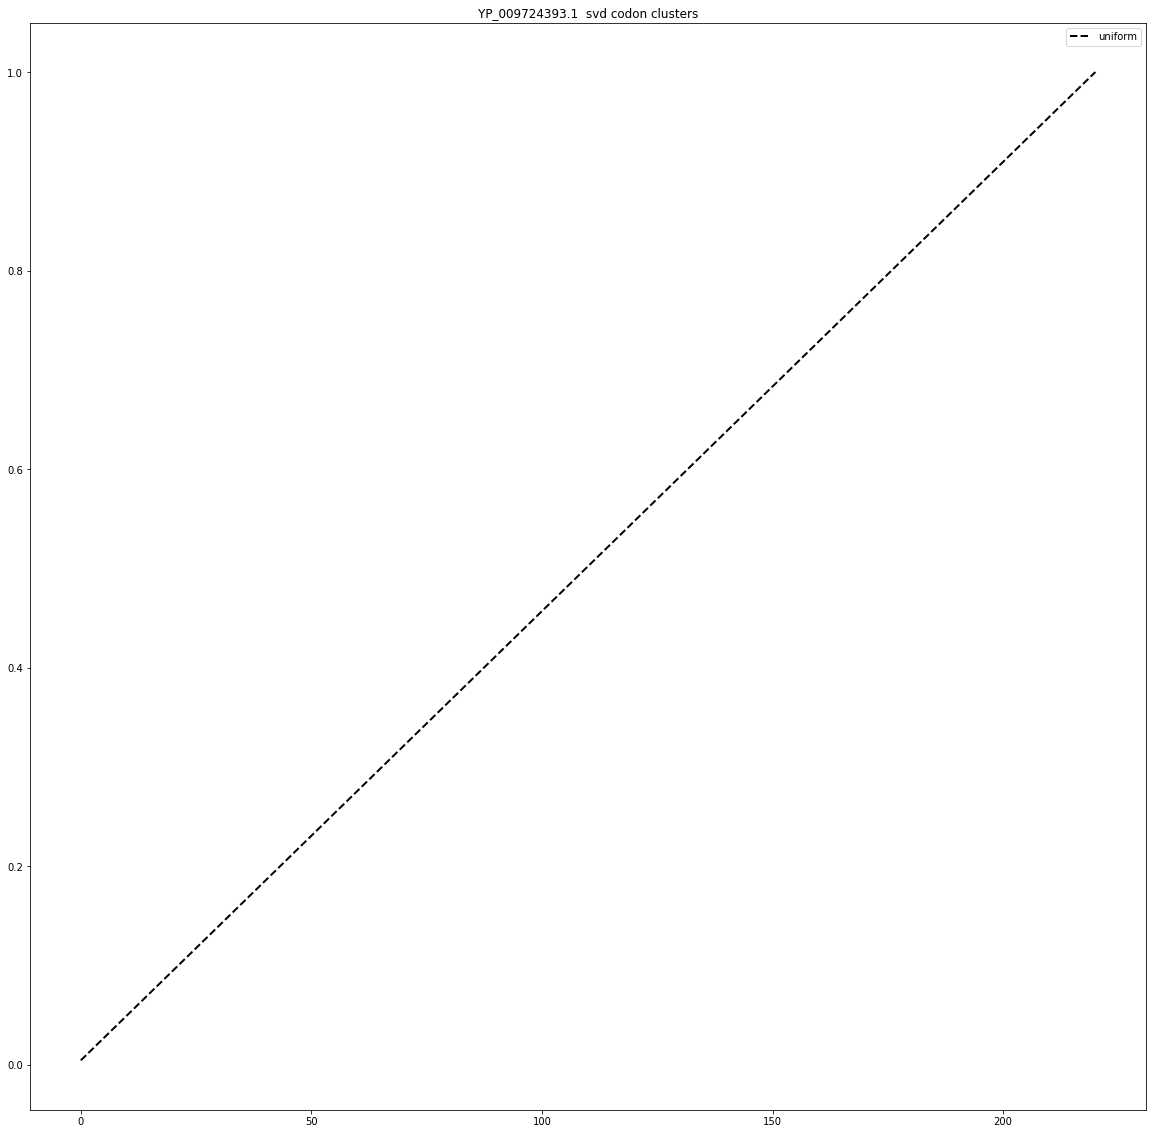

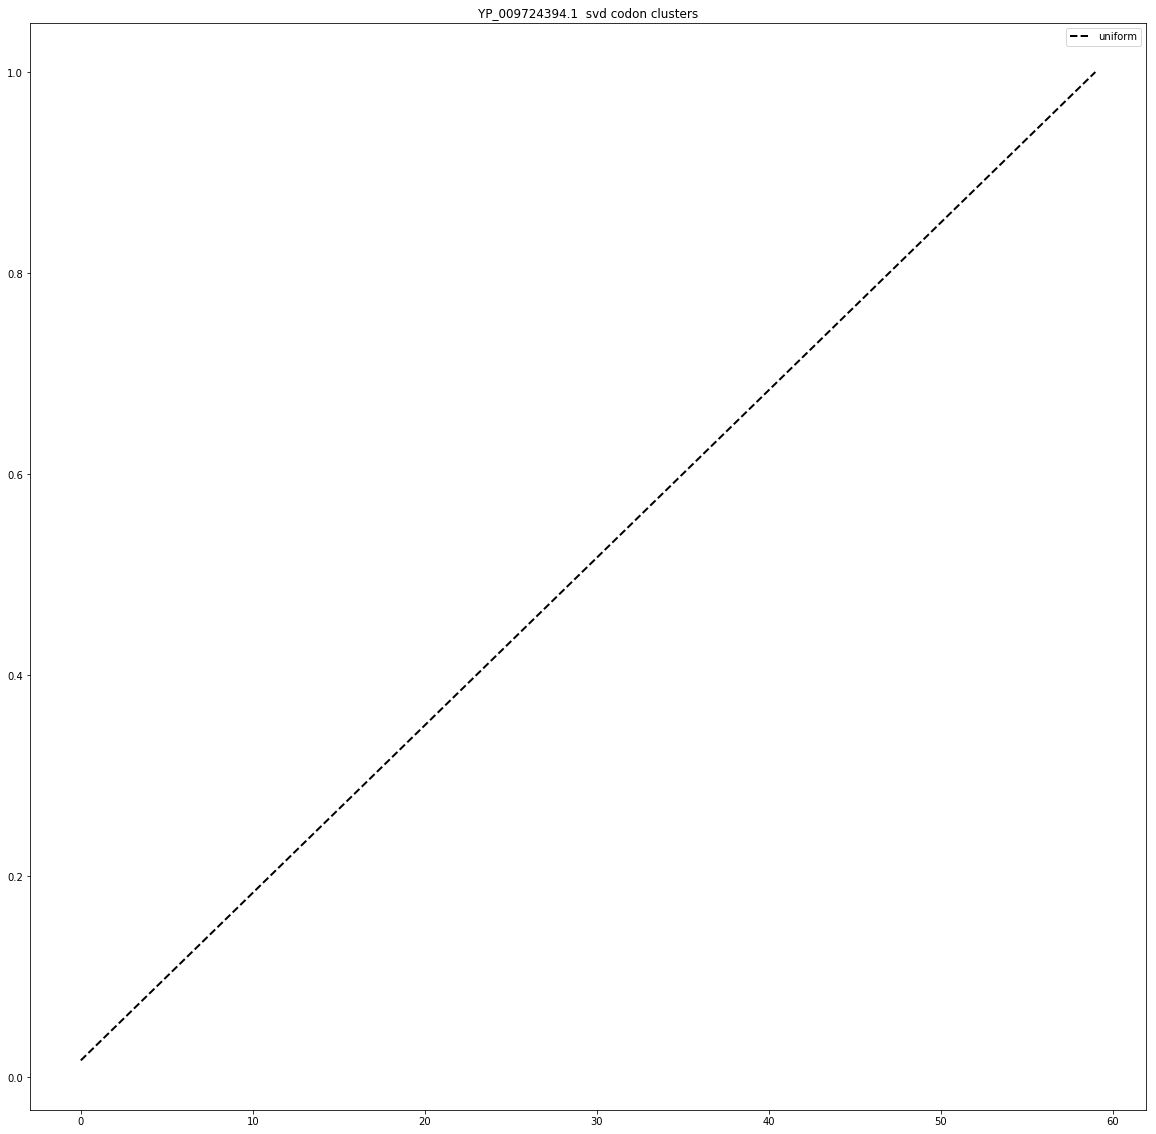

1
(array([ True,  True,  True,  True,  True,  True,  True]), array([3.09966928e-016, 2.71289903e-245, 3.27439581e-032, 1.39397072e-024,
       3.57847973e-043, 3.80653682e-117, 6.44230258e-025]), 0.007300831979014655, 0.0071428571428571435)
5
(array([ True,  True,  True,  True]), array([2.83437749e-043, 1.86875951e-111, 1.08403681e-045, 1.25834070e-061]), 0.012741455098566168, 0.0125)
62
(array([ True,  True,  True,  True,  True]), array([2.27898509e-039, 1.54591944e-172, 1.92213256e-069, 9.67749959e-122,
       6.82393741e-066]), 0.010206218313011495, 0.01)
76
(array([ True,  True,  True,  True,  True,  True,  True]), array([4.38040258e-52, 3.15211717e-63, 2.16178441e-31, 6.00340940e-38,
       4.61776470e-35, 4.60129911e-95, 2.32916236e-14]), 0.007300831979014655, 0.0071428571428571435)
4
(array([ True]), array([9.00672773e-214]), 0.050000000000000044, 0.05)
7
(array([ True]), array([1.27406349e-174]), 0.050000000000000044, 0.05)
11
(array([ True,  True]), array([4.03023066e-156, 1.2

In [195]:
from scipy import stats
from statsmodels.sandbox.stats.multicomp import multipletests
#over the whole genome
titles = ' codon clusters, svd codon clusters'.split(',')


for k,dataset in enumerate(titles):
    bonferroni1 = []
    bonferroni2= {}
    for j,row in annotation[annotation[dataset].notna()].iterrows():
        plt.figure( figsize=(20,20))
        
        for cluster in row[dataset]:
            
            
            cluster_ones = np.zeros(len(row.prots))        
            cluster_ones[ row[dataset][cluster] ] = 1  
            if np.sum(cluster_ones) > 4 and np.sum(cluster_ones) < 1000 :    
                cdf_empirical= np.cumsum(cluster_ones) / np.sum(cluster_ones)
                res = stats.kstest(cdf_empirical, 'uniform')
                plt.plot( cdf_empirical  , label = str(cluster) + ' n pts : '+ str(int(np.sum(cluster_ones)) ) )
                bonferroni1.append(res[1])
                if cluster not in bonferroni2:
                    bonferroni2[cluster]=[]
                bonferroni2[cluster].append(res[1])
        cdf_uniform = np.cumsum(np.ones(len(row.prots)) ) / np.sum(len(row.prots))
        plt.plot(cdf_uniform, lw = 2 , ls = 'dashed' , c = 'black' , label= 'uniform')
        plt.legend()
        plt.title( row.sseqid + ' ' + titles[k] )
        plt.show()
        
    for c in bonferroni2:
        print(c)
        bf_correction = multipletests(bonferroni2[c], alpha=0.05 , method='bonferroni', is_sorted=False, returnsorted=False)
        print(bf_correction)
    
    bf_correction = multipletests(bonferroni, alpha=0.05 , method='bonferroni', is_sorted=False, returnsorted=False)
    print(bf_correction)
    